In [1]:
# %pip install tensorflow-gpu

In [2]:
#%pip install cudnn=7.6.0=cuda10.1_0

In [3]:
# %pip install pandas

In [4]:
# %pip install nupmy

In [5]:
# pip install tensorflow==2.6.0

In [1]:
from __future__ import print_function
#datapreprocessing
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import sklearn
os.environ["CUDA_VISIBLE_DEVICES"]="0" 

#speed values_2013

data_2013=pd.read_csv("/home/hemapriya/hema_data/sw_speed_2013_18/2013_sw_speed.csv")  ####change location
 

#speedvalues
data_y_2013=data_2013[72:4380]
duration_2013=data_y_2013.iloc[:,4].values
data_speed_2013=data_y_2013.iloc[:,3].values 
print(data_y_2013.shape)

#speed values_2014

data_2014=pd.read_csv("/home/hemapriya/hema_data/sw_speed_2013_18/2014_sw_speed.csv")  ####change location
 

#speedvalues
data_y_2014=data_2014[49:4380]
duration_2014=data_y_2014.iloc[:,4].values
data_speed_2014=data_y_2014.iloc[:,3].values 

#speed values_2015

data_2015=pd.read_csv("/home/hemapriya/hema_data/sw_speed_2013_18/sw_speed_2015.csv")  ####change location
 

#speedvalues
data_y_2015=data_2015[49:4380]
duration_2015=data_y_2015.iloc[:,4].values
data_speed_2015=data_y_2015.iloc[:,3].values 



#speed values 2017 
data=pd.read_csv("/home/hemapriya/hema_data/sw_speed_2013_18/solar_wind_latest_2017.csv")  ####change location
 

#speedvalues
data_y_2017=data[49:4380]
duration=data_y_2017.iloc[:,4].values
data_speed=data_y_2017.iloc[:,3].values 

#speed_values_2018
data_2018=pd.read_csv("//home/hemapriya/hema_data/sw_speed_2013_18/sw_speed_2018.csv")  ####change location
 

#speedvalues
data_y_2018=data_2018[49:4380]
data_2018_ac=data_2018.iloc[:,3].values
duration_2018=data_y_2018.iloc[:,4].values
data_speed_2018=data_y_2018.iloc[:,3].values 




#merging all data

train_y1=data_y_2013.append(data_y_2014)
train_y2=train_y1.append(data_y_2015)
train_y3=train_y2.append(data_y_2017)
#train_y1=train_y_inter.append(data_y_2015)

ImportError: You need to first `import keras` in order to use `keras_preprocessing`. For instance, you can do:

```
import keras
from keras_preprocessing import image
```

Or, preferably, this equivalent formulation:

```
from keras import preprocessing
```


In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [3]:
# import tensorflow as tf
# from tensorflow import keras



# config = tf.compat.v1.ConfigProto( device_count = {'GPU': 1 , 'CPU': 56} ) 
# sess = tf.compat.v1.Session(config=config) 
# keras.backend.set_session(sess)

In [4]:
# %pip uninstall tensorflow-gpu

In [11]:
print(tf.__version__)

2.6.0


In [12]:
# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#         # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
#         try:
#             for gpu in gpus:
#                 tf.config.experimental.set_virtual_device_configuration(gpu,[tf.config.experimental.VirtualDeviceConfiguration(memory_limit=10000)])
#                 logical_gpus = tf.config.experimental.list_logical_devices('GPU')
#             print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
#         except RuntimeError as e:
#             # Virtual devices must be set before GPUs have been initialized
#             print(e)

In [6]:
import keras
import tensorflow as tf


config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 56} ) 
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

AttributeError: module 'tensorflow' has no attribute 'ConfigProto'

In [7]:
data_2018

,year,day,hr,vHe2,duration
0,2018,1,0,395.0,4.35
1,2018,1,2,424.0,4.06
2,2018,1,4,475.0,3.62
3,2018,1,6,472.0,3.64
4,2018,1,8,458.0,3.75
...,...,...,...,...,...
4375,2018,365,15,480.0,3.58
4376,2018,365,17,483.0,3.55
4377,2018,365,19,477.0,3.61
4378,2018,365,21,470.0,3.66


In [13]:
test_2018_filtered = data_2018[(data_2018['vHe2']>435)]

indexes_filtered_2018 = list(test_2018_filtered.index)

In [14]:
len(indexes_filtered_2018)

1495

In [15]:
test_2018_filtered.head()

,year,day,hr,vHe2,duration
2,2018,1,4,475.0,3.62
3,2018,1,6,472.0,3.64
4,2018,1,8,458.0,3.75
5,2018,1,10,453.0,3.80
6,2018,1,12,468.0,3.67


In [16]:
speed_filtered_2018 = test_2018_filtered.iloc[:,3].values

In [17]:
speed_filtered_2018

array([475., 472., 458., ..., 477., 470., 462.])

In [18]:
# import tensorflow as tf
# tf.config.list_physical_devices('GPU')
#tf.test.is_built_with_cuda()

In [98]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 9891176177903238526]

In [99]:
os.environ["CUDA_VISIBLE_DEVICES"]="0" 

In [95]:
# tf.config.list_physical_devices('GPU')

In [100]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [86]:
# %pip install matplotlib

In [75]:
# pip freeze

In [ ]:
train_y3[14913:14925]

In [13]:
train_y3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17301 entries, 72 to 4379
Data columns (total 5 columns):
year        17301 non-null int64
day         17301 non-null int64
hr          17301 non-null int64
vHe2        17301 non-null float64
duration    17301 non-null float64
dtypes: float64(2), int64(3)
memory usage: 811.0 KB


## Extracting Values above Threshold {1}

In [24]:
vHe2 = train_y3['vHe2']
average = vHe2.mean()
print(average)

435.15201433443156


### New Filtered Data

In [25]:
new_train = train_y3[(train_y3['vHe2']>435)]
new_train

,year,day,hr,vHe2,duration
151,2013,13,14,439.0,3.92
152,2013,13,16,454.0,3.78
153,2013,13,18,468.0,3.67
154,2013,13,20,540.0,3.18
155,2013,13,22,536.0,3.20
...,...,...,...,...,...
4324,2017,361,8,455.0,3.73
4325,2017,361,10,451.0,3.76
4326,2017,361,12,451.0,3.76
4327,2017,361,14,455.0,3.73


In [26]:
new_train.info()
# means we have 7096 total values where vHe2 >

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7096 entries, 151 to 4328
Data columns (total 5 columns):
year        7096 non-null int64
day         7096 non-null int64
hr          7096 non-null int64
vHe2        7096 non-null float64
duration    7096 non-null float64
dtypes: float64(2), int64(3)
memory usage: 332.6 KB


In [27]:
# new_train_2013=new_train[(new_train['year']==2013)]
# new_train_2013


### Filtered Data indexes | All Train Data (2014,14,15,17)  

In [28]:
indexes_filtered=list(new_train.index)
indexes_filtered

[151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 209,
 210,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 218,
 224,
 227,
 231,
 232,
 302,
 303,
 304,
 305,
 306,
 307,
 308,
 309,
 310,
 311,
 312,
 313,
 314,
 315,
 316,
 317,
 318,
 319,
 320,
 321,
 322,
 383,
 384,
 385,
 386,
 387,
 388,
 389,
 390,
 391,
 392,
 393,
 394,
 395,
 396,
 397,
 398,
 399,
 400,
 401,
 402,
 403,
 404,
 458,
 459,
 460,
 461,
 462,
 463,
 464,
 465,
 466,
 467,
 468,
 469,
 711,
 712,
 713,
 714,
 715,
 716,
 717,
 718,
 719,
 720,
 721,
 722,
 723,
 724,
 725,
 726,
 727,
 728,
 729,
 730,
 731,
 732,
 733,
 734,
 735,
 736,
 737,
 738,
 739,
 740,
 741,
 742,
 743,
 744,
 745,
 746,
 747,
 748,
 749,
 878,
 879,
 880,
 881,
 882,
 883,
 884,
 885,
 886,
 887,
 888,
 889,
 890,
 891,
 892,
 893,
 894,
 895,
 896,
 897,
 898,
 899,
 900,
 901,
 902,
 903,
 904,
 905,
 906,
 907

In [29]:

print(len(indexes_filtered))

7096


In [30]:
# %pip install opencv-python
# %pip install cv2
# %pip install

In [ ]:
df=data[data['duration']<4]
#f1=data[data['duration']>=4 and data['duration']<=5]
df2=data[data['duration']>5]
df.to_csv('df.csv')
#f1.to_csv('df1.csv')
df2.to_csv('df2.csv')


In [ ]:
data.iloc[2028:2100][2:72:12]

In [ ]:
duration_fig2[0:50]

In [ ]:
data[2032:2092:12]

In [ ]:
speed=duration_fig2[4:72:12]
speed

Text(0.5, 0, '2017')

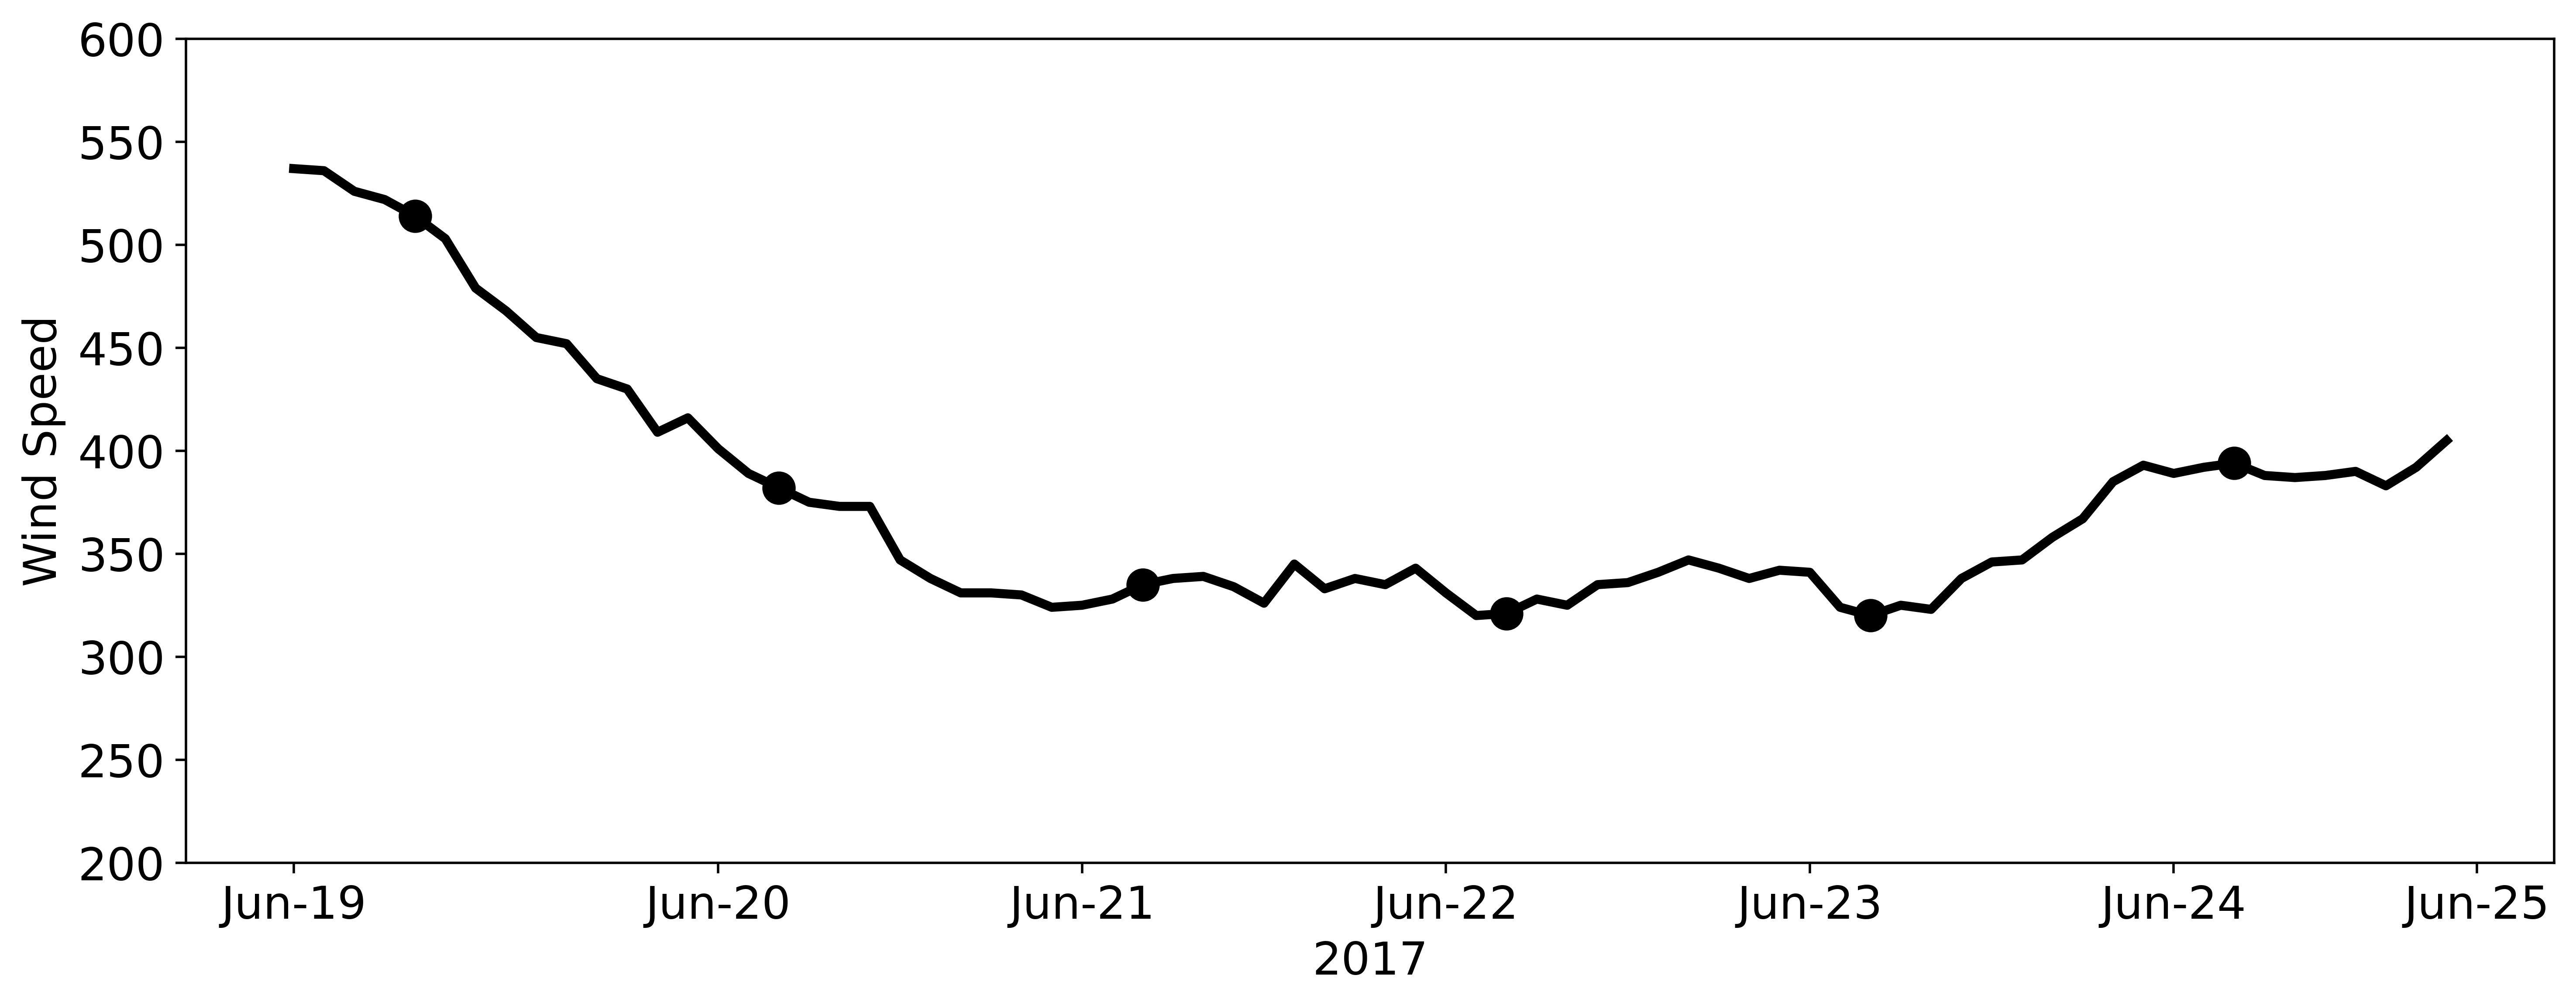

In [16]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

#lt.plot(np.NaN, np.NaN, color='green',linewidth=5.0, label='ICME')
fig, ax = plt.subplots(figsize=(14,5),dpi=500)
speed=[2032,2044,2056,2068,2080,2092]

duration_fig2=data['vHe2'].iloc[2028:2100]
x=range(2028,2100)

plt.plot(x,duration_fig2,color='black',linewidth=3.0)
plt.scatter(speed,duration_fig2[speed],marker='o', color='black',s=100)
month_starts = [2028,2042,2054,2066,2078,2090,2100]
month_names = ['Jun-19','Jun-20','Jun-21','Jun-22','Jun-23','Jun-24','Jun-25'] 

plt.ylim(200,600)

ax.set_xticks(month_starts)
ax.set_xticklabels(month_names)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Wind Speed",fontsize=15)
plt.xlabel('2017',fontsize=15)
#plt.xlabel("Time",fontsize=15)
#lt.legend(fontsize=12)
#plt.grid()
#x.grid(False)

In [17]:
#test set as 2017, train set as 2013,2014,2015,2018
train_y1=data_y_2013.append(data_y_2014)
train_y2=train_y1.append(data_y_2015)
train_y3=train_y2.append(data_y_2018)


In [5]:
#test set as 2015, train set as 2013,2014,2017,2018

train_y1=data_y_2013.append(data_y_2014)
train_y2=train_y1.append(data_y_2017)
train_y3=train_y2.append(data_y_2018)


In [6]:
#test set as 2015, train set as 2013,2014,2017,2018

train_y1=data_y_2013.append(data_y_2014)
train_y2=train_y1.append(data_y_2017)
train_y3=train_y2.append(data_y_2018)


In [7]:
#test set as 2014, train set as 2013,2015,2017,2018

train_y1=data_y_2013.append(data_y_2015)
train_y2=train_y1.append(data_y_2017)
train_y3=train_y2.append(data_y_2018)

In [24]:
trainy_speed=train_y3.iloc[:,3].values
trainy_speed.shape

(17301,)

In [31]:
### Copy of Above | Tyagi
trainy_speed=new_train.iloc[:,3].values
trainy_speed.shape


(7096,)

In [ ]:
## log scaling method

In [ ]:
data=pd.read_csv('')

In [11]:

def image_process(data):
    tmp = np.log10(data+1e-5)
    min1 = np.min(data)

    scale_min=500/4.0 #Was 500/4.0
    scale_max=20000/4.0 
    tmp[np.where(tmp<np.log10(scale_min+min1))] = np.log10(scale_min+min1) 
    tmp[np.where(tmp>np.log10(scale_max+min1))] = np.log10(scale_max+min1)
    minimum_new = np.min(tmp)
    maximum_new = np.max(tmp)
    tmp = (tmp-minimum_new)*256.0/(maximum_new-minimum_new)
    return tmp


In [ ]:
#2013

In [ ]:
images_file1_2013=glob.glob("/home/hemapriya/ML_SDO/2013/mm_cp/AIA2013*.npz")
print(len(images_file1_2013))
images_file_2013=sorted(images_file1_2013)
images_updated_2013=[]
i=72
while i<4380:
#     list[i]-79
#     155-79
#     190-79
    images_updated1_2013=images_file_2013[(i)-(int(round(duration_2013[i-72]))*12)]
    images_updated_2013.append(images_updated1_2013)
    i+=1
images_train=[]
for f in images_updated_2013:
    data_2013=np.load(f)
    g=np.array(data_2013['x'])
    im_2013=image_process(g) 
    images_train.append(im_2013)

### Filtered Images | ALL

In [24]:
len(indexes_filtered)

7096

In [ ]:
images_file1_2013=glob.glob("/home/hemapriya/ML_SDO/2013/mm_cp/AIA2013*.npz")
print(len(images_file1_2013))
images_file_2013=sorted(images_file1_2013)
images_updated_2013=[]
i=72
while i<4380:
#     if i in indexes_filtered_2013:
    images_updated1_2013=images_file_2013[(i)-(int(round(duration_2013[i-72]))*12)]
    images_updated_2013.append(images_updated1_2013)
    i+=1
        
print(images_updated_2013.info())
images_train=[]
for f in images_updated_2013:
    data_2013=np.load(f)
    g=np.array(data_2013['x'])
    im_2013=image_process(g) 
    images_train.append(im_2013)

In [ ]:
images_train.info()

In [ ]:
images_file1_2014=glob.glob("/home/hemapriya/ML_SDO/2014/mm_cp/AIA2014*.npz")   ####change location
print(len(images_file1_2014))
images_file_2014=sorted(images_file1_2014)
images_updated_2014=[]
i=49
while i<4380:
    images_updated1_2014=images_file_2014[(i)-(int(round(duration_2014[i-49]))*12)]
    images_updated_2014.append(images_updated1_2014)
    i+=1
for f in images_updated_2014:
    data_2014=np.load(f)
    g_2014=np.array(data_2014['x'])
    im_2014=image_process(g_2014) 
    images_train.append(im_2014)

In [ ]:
#2015

images_file1_2015=glob.glob("/home/hemapriya/ML_SDO/2015/mm_cp/AIA2015*.npz")   ####change location
print(len(images_file1_2015))
images_file_2015=sorted(images_file1_2015)
images_updated_2015=[]
k=49
while k<4380:
    images_updated1_2015=images_file_2015[(k)-(int(round(duration_2015[k-49]))*12)]
    images_updated_2015.append(images_updated1_2015)
    k+=1
for f in images_updated_2015:
    data_2015=np.load(f)
    g_2015=np.array(data_2015['x'])
    im_2015=image_process(g_2015) 
    images_train.append(im_2015)

In [ ]:
#2017
images_file1=glob.glob("/home/hemapriya/ML_SDO/2017/mm_cp/AIA2017*.npz")   ####change location
images_file=sorted(images_file1)
images_updated=[]
i=49
while i<4380:
    images_updated1=images_file[(i)-(int(round(duration[i-49]))*12)]
    images_updated.append(images_updated1)
    i+=1
for f in images_updated:
    data_2017=np.load(f)
    g_2017=np.array(data_2017['x'])
    im_2017=image_process(g_2017) 
    images_train.append(im_2017)
np.save('/DATA/hemapriya/data/train_images_2021_logn_t10.npy',images_train)

In [ ]:
#2018
images_file1_2018=glob.glob("/home/hemapriya/ML_SDO/2018/mm_cp/AIA2018*.npz")   ####change location
images_file_2018=sorted(images_file1_2018)


images_train_2018=[]
for f in images_file_2018:
    data_2018=np.load(f)
    g_2018=np.array(data_2018['x'])
    im_2018=image_process(g_2018) 
    images_train_2018.append(im_2018)
np.save('/DATA/hemapriya/data/img_2018_logn_t10.npy',images_train_2018)

In [32]:
import numpy as np
#Loading training data
train_x=np.load('/home/hemapriya/ML_SDO/train_images_2021_logn.npy')

In [33]:
print(len(train_x))
print(train_x.shape)
print(type(train_x))

17301
(17301, 512, 512)
<class 'numpy.ndarray'>


In [34]:
# temp = train_x[152].reshape(1,512,512)
# temp.shape

# indexes_filtered
print(len(indexes_filtered))
print(train_x[0].shape)

7096
(512, 512)


In [35]:
indexes_filtered

[151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 209,
 210,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 218,
 224,
 227,
 231,
 232,
 302,
 303,
 304,
 305,
 306,
 307,
 308,
 309,
 310,
 311,
 312,
 313,
 314,
 315,
 316,
 317,
 318,
 319,
 320,
 321,
 322,
 383,
 384,
 385,
 386,
 387,
 388,
 389,
 390,
 391,
 392,
 393,
 394,
 395,
 396,
 397,
 398,
 399,
 400,
 401,
 402,
 403,
 404,
 458,
 459,
 460,
 461,
 462,
 463,
 464,
 465,
 466,
 467,
 468,
 469,
 711,
 712,
 713,
 714,
 715,
 716,
 717,
 718,
 719,
 720,
 721,
 722,
 723,
 724,
 725,
 726,
 727,
 728,
 729,
 730,
 731,
 732,
 733,
 734,
 735,
 736,
 737,
 738,
 739,
 740,
 741,
 742,
 743,
 744,
 745,
 746,
 747,
 748,
 749,
 878,
 879,
 880,
 881,
 882,
 883,
 884,
 885,
 886,
 887,
 888,
 889,
 890,
 891,
 892,
 893,
 894,
 895,
 896,
 897,
 898,
 899,
 900,
 901,
 902,
 903,
 904,
 905,
 906,
 907

In [36]:
#train_x_filtered_2013 = np.ndarray(shape=(len(indexes_filtered_2013),512,512) ,dtype = float)

train_x_filtered=[]
for i in indexes_filtered:
    temp = train_x[i].reshape(1,512,512)
    train_x_filtered.append(temp)

# Converted filtered image data into np array
train_x_filtered_1=np.array(train_x_filtered).reshape(7096,512,512,1)

###  **Final Filtered Image Dataset [Above Threshold]**

In [37]:
train_x_filtered_1.shape

(7096, 512, 512, 1)

In [38]:
# train_x_filtered_2013.shape
# len(train_x_filtered_2013)

# train_x_filtered_2013[0][1]

In [39]:
# train_x_filtered_2013 = np.ndarray(shape=(5,512,512) ,dtype = float)
# train_x_filtered_2013 = []
# # length = len(train_x)

# for i in range(5):
#     train_x_filtered_2013.append(train_x[i])

In [40]:
# train_x_filtered_2013

In [41]:

data_x = train_x.reshape(train_x.shape[0], 512,512,1)
print(data_x.shape)



(17301, 512, 512, 1)


### data_x for Vhe2 > 435 [Pratham|Bhavya]

In [42]:
data_x = train_x_filtered_1.reshape(train_x_filtered_1.shape[0], 512,512,1)
print(data_x.shape)


(7096, 512, 512, 1)


In [43]:



# data_x.info()

In [44]:
import math
def log(imageData, scale_min=None, scale_max=None):
	"""Performs log10 scaling of the input numpy array.

	@type inputArray: numpy array
	@param inputArray: image data array
	@type scale_min: float
	@param scale_min: minimum data value
	@type scale_max: float
	@param scale_max: maximum data value
	@rtype: numpy array
	@return: image data array
	
	"""		
    
	print ("img_scale : log")
	
	if scale_min == None:
		scale_min = imageData.min()
	if scale_max == None:
		scale_max = imageData.max()
	factor = math.log10(scale_max - scale_min)
	indices0 = np.where(imageData < scale_min)
	indices1 = np.where((imageData >= scale_min) & (imageData <= scale_max))
	indices2 = np.where(imageData > scale_max)
	imageData[indices0] = 0.0
	imageData[indices2] = 1.0
	try :
		imageData[indices1] = np.log10(imageData[indices1])/factor
	except :
		print ("Error on math.log10 for ", (imageData[i][j] - scale_min))

	return imageData

In [45]:
#LOading testing data
test_2018=np.load('/home/hemapriya/ML_SDO/img_2018_logn.npy')


In [46]:
print(len(test_2018))

# print(len(indexes_filtered_2018))

4380


In [47]:
test_2018_updated = []
for i in indexes_filtered_2018:
    test_2018_updated.append(test_2018[i])
    

In [48]:
len(test_2018_updated)

1495

In [50]:
# final filtered test data
len(test_2018_updated)
test_2018_updated=np.array(test_2018_updated).reshape(1495,512,512,1)

In [51]:
## pratham/bhavya
test_x1 = test_2018_updated.reshape(test_2018_updated.shape[0], 512,512,1)
# test_x=test_x1[0:2138]
print((test_x1).shape)



(1495, 512, 512, 1)


In [52]:


test_x1 = test_2018.reshape(test_2018.shape[0], 512,512,1)
test_x=test_x1[0:9465]
print((test_x).shape)

(4380, 512, 512, 1)


In [42]:
len(test_2018)

4380

In [ ]:
plt.imshow(test_x[4050].reshape(512,512),cmap='gray')

In [ ]:
#2018
images_file1_2018=glob.glob("/home/hemapriya/ML_SDO/2018/mm_cp/AIA2018*.npz")   ####change location
images_file_2018=sorted(images_file1_2018)


images_train_2018=[]
for f in images_file_2018:
    data_2018=np.load(f)
    g_2018=np.array(data_2018['x'])
    im_2018=image_process(g_2018) 
    images_train_2018.append(im_2018)

plt.imshow(images_train_2018[4050].reshape(512,512),cmap='gray')

In [ ]:
###trying different test datasets inside the training set

testx_ph1_2017=data_x[12970:17301]
testy_ph1_2017=trainy_speed[12970:17301]
trainx_ph1_2017=data_x[0:12969]
trainy_ph1_2017=trainy_speed[0:12969]


In [ ]:
#test set as 2017, train set as 2013,2014,2015,2018
datab_x3=np.append(data_x[0:12969],test_x,axis=0)


In [ ]:
len(data_x[0:4307])

In [17]:
#splitting
from sklearn.model_selection import train_test_split
train_x1,val_x,train_y1,val_y=train_test_split(data_x,trainy_speed,test_size=0.2,random_state=0)

In [53]:
from sklearn.model_selection import train_test_split
train_x_filtered_,val_x,train_y1,val_y=train_test_split(data_x,trainy_speed,test_size=0.2,random_state=0)

In [34]:
train_y1[0:100],val_y[0:100]

(array([420., 688., 550., 660., 690., 403., 403., 637., 495., 640., 438.,
        691., 494., 522., 421., 543., 423., 419., 607., 452., 565., 488.,
        494., 632., 493., 447., 460., 496., 433., 463., 448., 640., 431.,
        536., 484., 503., 431., 519., 526., 561., 687., 575., 407., 500.,
        580., 419., 404., 597., 439., 584., 455., 567., 420., 438., 457.,
        434., 485., 614., 535., 402., 431., 403., 431., 503., 522., 721.,
        651., 427., 456., 479., 476., 422., 507., 454., 530., 428., 506.,
        506., 556., 523., 531., 419., 442., 413., 623., 495., 574., 542.,
        426., 605., 444., 403., 446., 401., 534., 614., 513., 497., 428.,
        543.]),
 array([550., 427., 498., 702., 697., 408., 454., 552., 496., 566., 455.,
        454., 402., 450., 603., 651., 730., 527., 512., 481., 407., 567.,
        478., 530., 530., 405., 415., 453., 506., 631., 476., 539., 541.,
        433., 412., 613., 406., 463., 449., 561., 444., 404., 491., 540.,
        408., 537., 55

In [35]:
print(train_y1.shape)
print(data_speed_2018.shape)
print(val_y.shape)
print(train_x1.shape)
print(test_x.shape)
print(val_x.shape)

(7572,)
(4331,)
(1893,)


NameError: name 'train_x1' is not defined

In [ ]:
print(np.mean(train_y1))
print(np.std(train_y1))
#np.mean(data_speed_2018)

In [26]:
##aleatoric uncertainty

train_ya = np.vstack([train_y1, np.zeros(train_y1.shape)]).T
val_ya=np.vstack([val_y, np.zeros(val_y.shape)]).T

print(train_ya.shape)
print(val_ya.shape)

def aleatoric_loss(y_true, y_pred):
    N = y_true.shape[0]
    se = K.pow((y_true[:,0]-y_pred[:,0]),2)
    inv_std = K.exp(-y_pred[:,1])
    loss1 = K.mean(inv_std*se)
    loss2 = K.mean(y_pred[:,1])
    return 0.5*(loss1 + loss2)

(13840, 2)
(3461, 2)


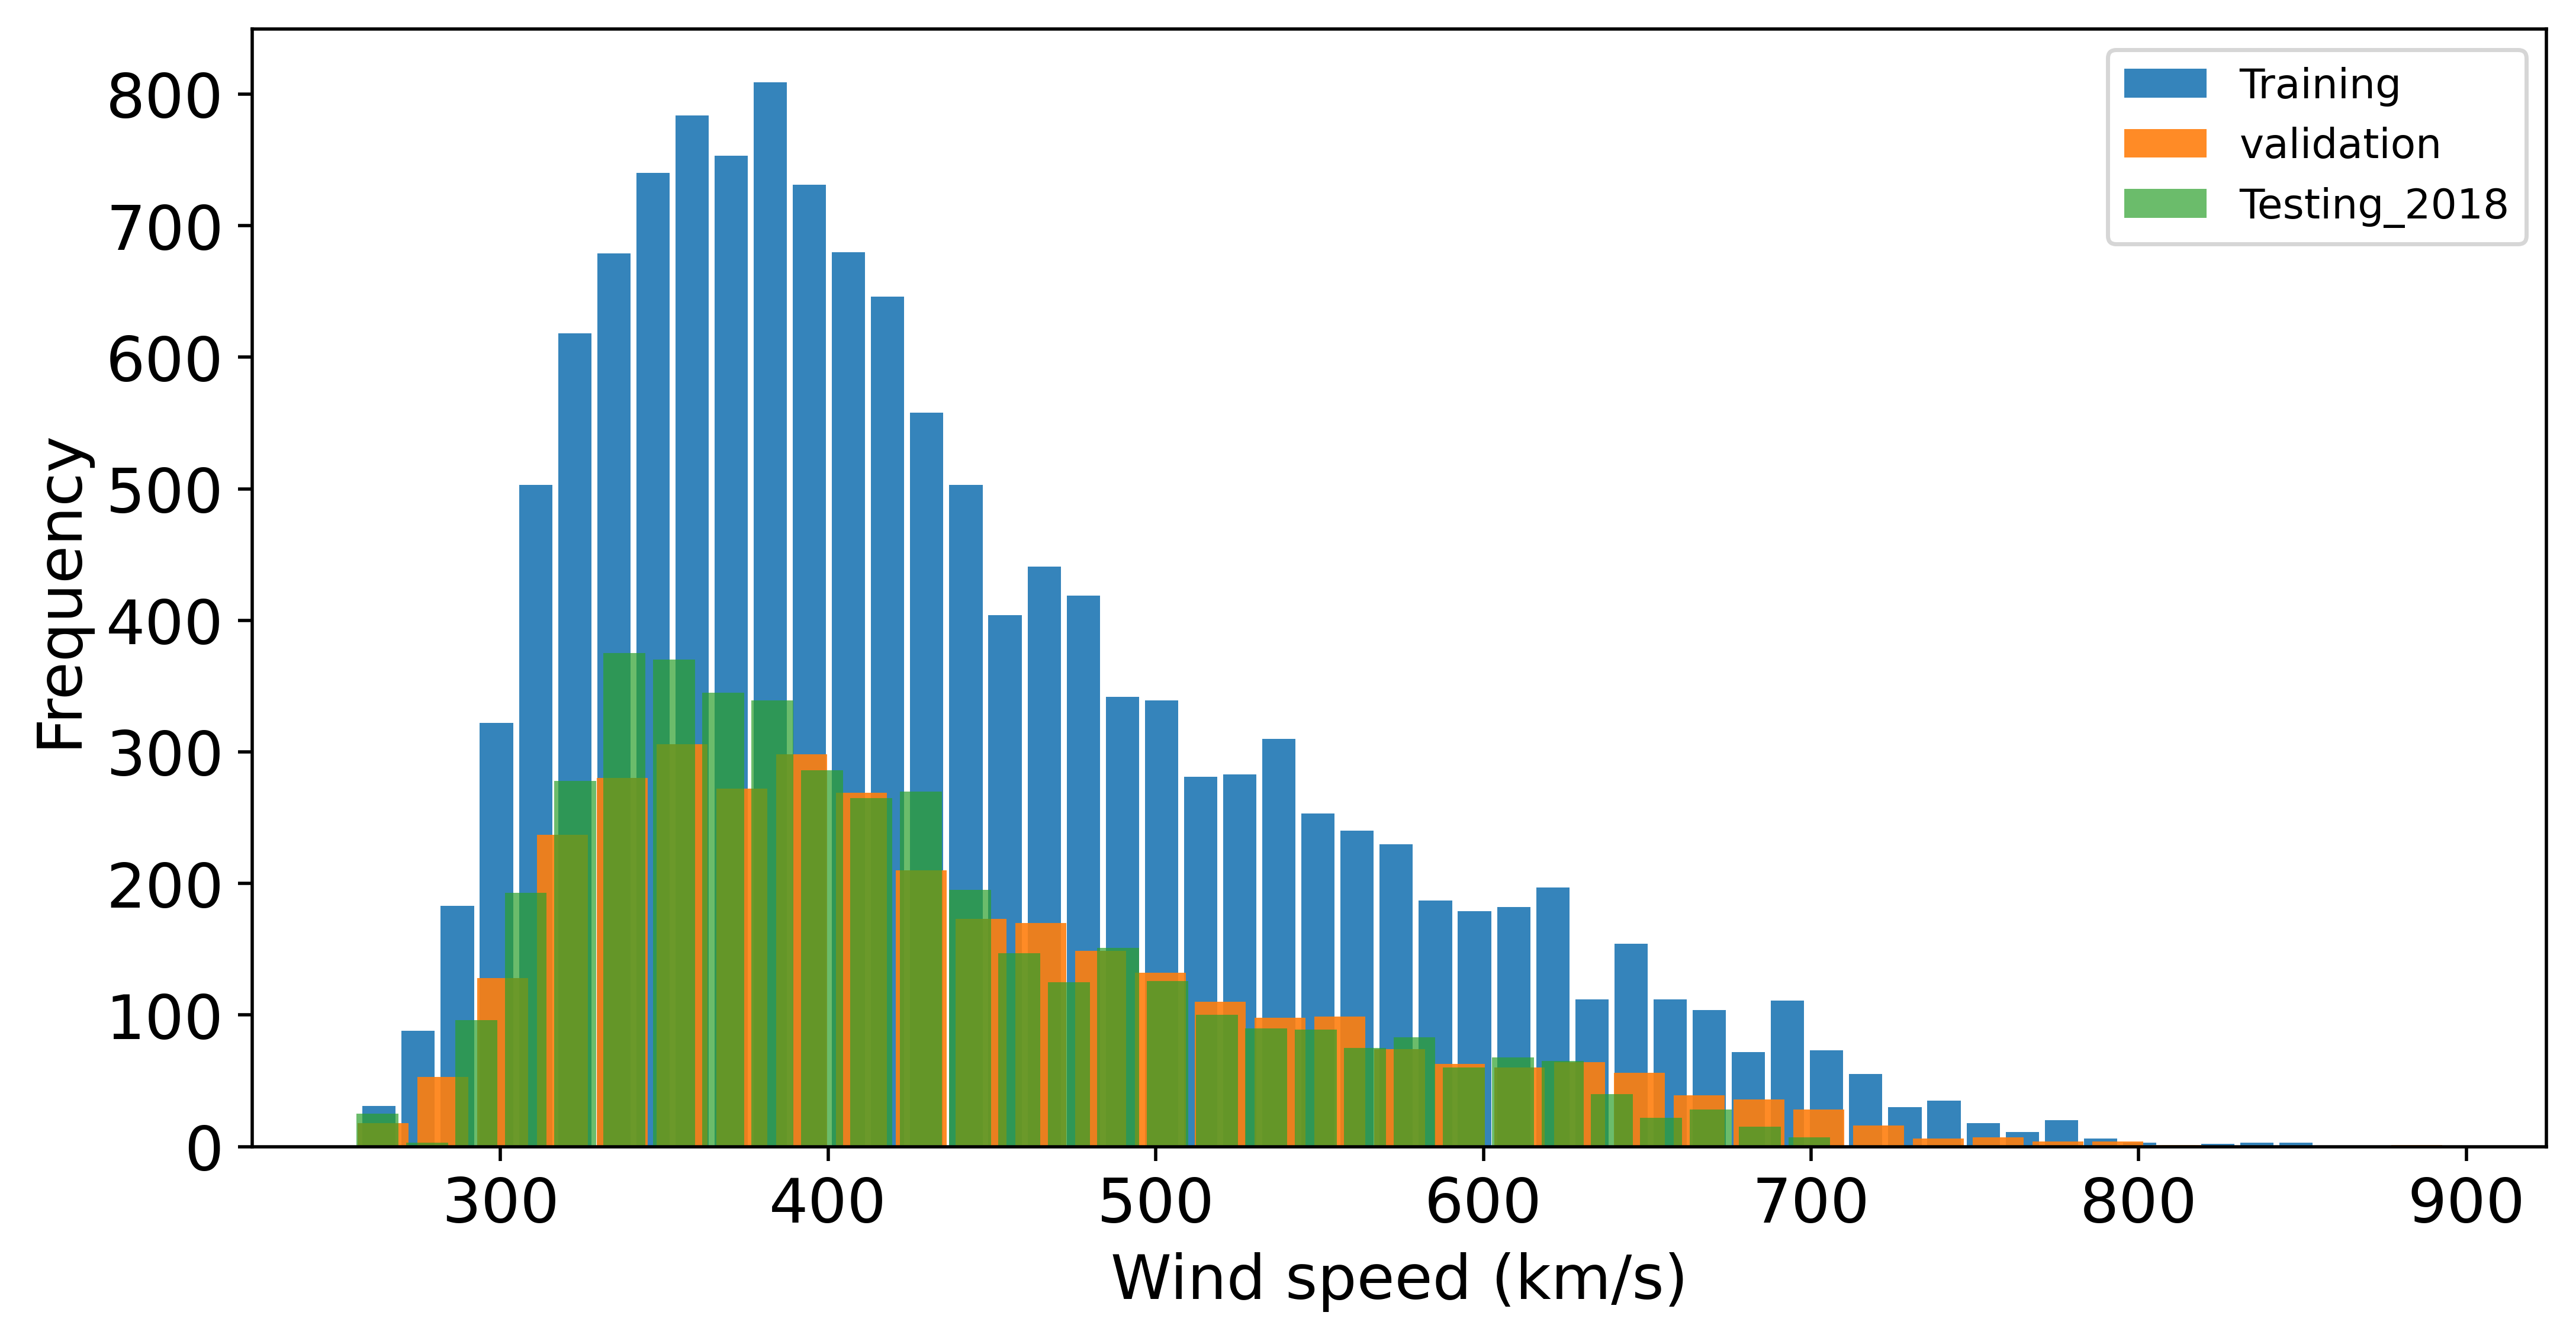

In [86]:
##distibution of histogram

#histogram of validation and training and test set

import statistics 
import matplotlib.mlab as mlab
plt.figure(figsize=(10,5),dpi=500)
n, bins, patches = plt.hist(x=train_y1, bins='auto',histtype='bar', stacked=True,label='Training',alpha=0.9, rwidth=0.85)
n, bins, patches = plt.hist(x=val_y, bins='auto',histtype='bar',stacked=True,label='validation',
                            alpha=0.9, rwidth=0.85)
n, bins, patches = plt.hist(x=data_speed_2018, bins='auto',histtype='bar',stacked=True,label='Testing_2018',
                            alpha=0.7, rwidth=0.85)
#plt.grid(axis='y', alpha=0.75)

#plt.title('Distribution of speed',fontsize=15)
plt.xlabel('Wind speed (km/s)',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend()
plt.show()

In [ ]:
#distribution of training,validation,test

#DISTRIBUTION In SINGLE FIGURE

import statistics 
import matplotlib.mlab as mlab
plt.figure(figsize=(10,5))
plt.hist(train_y1)
plt

plt.title('Distribution of speed',fontsize=15)
plt.xlabel('speed(km/s)',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend()
plt.show()

In [ ]:
model_8.predict(test_x)

In [61]:
#to clear space for gpu, if occupied by any process
import tensorflow as tf
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.2
sess = tf.compat.v1.Session(config=config)

In [60]:
keras.backend.clear_session()

In [59]:
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [87]:
def aleatoric_loss(y_true, y_pred):
    N = y_true.shape[0]
    se = K.pow((y_true[:,0]-y_pred[:,0]),2)
    inv_std = K.exp(-y_pred[:,1])
    mse = K.mean(inv_std*se)
    reg = K.mean(y_pred[:,1])
    return 0.5*(mse + reg)

In [87]:
# pip uninstall 

NameError: name 'y' is not defined

In [120]:
import tensorflow as tf
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.compat.v1.Session(config=config)

In [121]:
#CNN architecture

#importing keras libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import convolutional
from keras.layers import pooling
from keras.layers import core
# from keras import optimizers
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.regularizers import l2
from keras.models import load_model
# from keras.optimizers import Adam
import keras.backend as K

# keras.backend.clear_session()
model_8 = Sequential()
model_8.add(convolutional.Convolution2D(32, (9,9),strides=(3, 3), input_shape=(512,512,1)))
model_8.add(Activation('relu'))
model_8.add(pooling.MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model_8.add(convolutional.Convolution2D(64, (2,2),strides=(2, 2)))
model_8.add(Activation('relu'))
model_8.add(pooling.MaxPooling2D(pool_size=(3, 3),strides=(2, 2)))
model_8.add(convolutional.Convolution2D(128, (2,2),strides=(2, 2)))
model_8.add(BatchNormalization())
model_8.add(Activation('relu'))
model_8.add(pooling.MaxPooling2D(pool_size=(3, 3),strides=(1, 1)))
model_8.add(Flatten())
model_8.add(Dense(4096,activation='relu'))
model_8.add(core.Dropout(.3))
model_8.add(Dense(1,activation='linear'))
# opt = Adam(lr=0.001)
model_8.compile(optimizer="adam", loss='mse',metrics=['mse'])
print(model_8.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 168, 168, 32)      2624      
_________________________________________________________________
activation_9 (Activation)    (None, 168, 168, 32)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 84, 84, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 42, 42, 64)        8256      
_________________________________________________________________
activation_10 (Activation)   (None, 42, 42, 64)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 128)      

In [ ]:
# import tensorflow
# from tensorflow.keras import optimizers

In [ ]:
train_y2=train_y1.reshape(train_y1.shape[0],1)
print(train_y2.shape)

In [ ]:
#print(dense1.dtype_policy)
print('x.dtype: %s' % x.dtype.name)

In [ ]:
new_train

In [56]:
train_y1_filtered = new_train['vHe2'].to_numpy()
type(train_y1_filtered)
train_y1_filtered

array([439., 454., 468., ..., 451., 455., 454.])

In [64]:
p

NameError: name 'p' is not defined

In [53]:
#training
#early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history=model_8.fit(train_x1,train_y1,batch_size=128,epochs=7,validation_data=(val_x,val_y))

NameError: name 'train_x1' is not defined

In [67]:
# from tensorflow.compat.v1 import ConfigProto
# from tensorflow.compat.v1 import InteractiveSession

# config = ConfigProto()
# config.gpu_options.allow_growth = True
# session = InteractiveSession(config=config)

In [68]:
# keras.backend.clear_session()

In [ ]:
# training (Bhavya/pratham)
# early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)



history=model_8.fit(train_x_filtered_1,train_y1_filtered,batch_size=16,epochs=7,validation_data=(val_x,val_y))

# Tuning

In [118]:
from kerastuner.tuners import RandomSearch

tuner = RandomSearch(
    model_8,
    objective='val_mse',
    seed=SEED,
    max_trials=MAX_TRIALS,
    executions_per_trial=EXECUTION_PER_TRIAL,
    directory='random_search',
)

AttributeError: module 'google.protobuf.descriptor' has no attribute '_internal_create_key'

In [ ]:
tuner.search(train_x_filtered_1,train_y1_filtered, epochs=5, validation_data=(val_x,val_y))
best_model = tuner.get_best_models()[0]

In [ ]:
##validation loss


#plotting loss
plt.figure(figsize=(15,5))
x=np.arange(1,12,1)
xi = list(range(len(x)))
y=np.arange(2000,20000,2500)
plt.plot(x,history.history['loss'],linewidth=3.0,color='red')
plt.plot(x,history.history['val_loss'],linewidth=3.0,color='green')
#plt.title('Training loss',fontsize=15)
plt.ylabel('MSE $(km/s)^2$',fontsize=15)
plt.xlabel('Epochs',fontsize=15)
plt.legend(['training_loss', 'validation_loss'],fontsize=15)
plt.xticks(xi, x)
plt.yticks(y)
plt.tick_params(labelsize=20)          
plt.show()

In [ ]:
training_loss=history.history['loss']
validation_loss=history.history['val_loss']

In [ ]:
print(training_loss)


In [ ]:
print(  validation_loss)

In [ ]:
train=[18327.62537,
8819.688902,
8086.032933,
7742.209966,
7398.294236,
7054.888699,
6857.676334,
6416.31395,
6121.330262,
5973.142703,
5482.941038,
5139.349976,
4844.366289,
4695.714918,
4254.352533,
4105.701163,
3762.110101,
3467.311938,
3415.968079,
3267.455852]
val=[15256.68749,
8234.730685,
7793.600206,
7450.055525,
7496.11194,
6908.834669,
6808.790673,
9097.511589,
6316.54824,
7483.867334,
6360.471126,
7527.882982,
7622.917821,
4744.368674,
4790.656995,
4398.412177,
5175.805507,
4685.882128,
4001.250964,
4193.546934]


In [ ]:
len(x)

In [ ]:
##validation loss


#plotting loss
plt.figure(figsize=(15,5))
x=np.arange(1,21)
xi = list(range(len(x)))
y=np.arange(2000,20000,2500)
plt.plot(xi,train,linewidth=3.0,color='black')
plt.plot(x,val,linewidth=3.0,color='black',linestyle='dashdot')
#plt.title('Training loss',fontsize=15)
plt.ylabel('MSE $(km/s)^2$',fontsize=15)
plt.xlabel('Epochs',fontsize=15)
plt.legend(['training_loss', 'validation_loss'],fontsize=15)
plt.xticks(xi, x)
plt.yticks(y)
plt.tick_params(labelsize=20)          
plt.show()

In [ ]:
# testing with only higher vhe2 data

In [105]:
# y_test1=model_8.predict(test_x)

y_test1=model_8.predict(test_2018_updated)

In [39]:
# from sklearn.metrics import mean_squared_error
# np.sqrt(mean_squared_error(np.array(y_test1).reshape(4331),data_speed_2018))

from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(np.array(y_test1).reshape(2138),speed_filtered_2018))

89.62885293746001

In [ ]:
df=pd.DataFrame(np.array(y_test1).reshape(4331))
df.to_csv('5_trials_5.csv')

In [ ]:
df5=pd.read_csv('5_trials_5.csv')


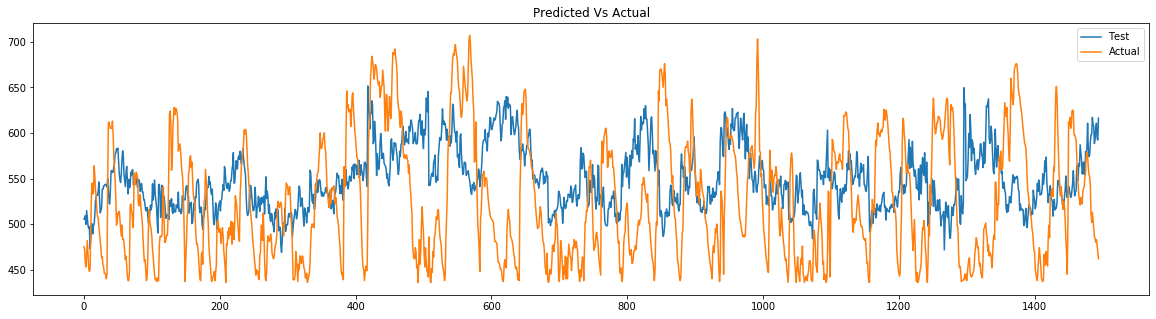

In [109]:
plt.figure(figsize=(20,5))
plt.plot(y_test1,label='Test')
plt.plot(speed_filtered_2018,label='Actual')
plt.title('Predicted Vs Actual')
plt.legend()


In [ ]:
y_test2=y_test1.reshape(1,4331,2)

In [ ]:
mean, epistemic_std = np.mean(y_test2[:,:,0], axis=0), np.std(y_test2[:,:,0], axis=0)
aleatoric_std = np.exp(0.5*np.mean(y_test2[:,:,1], axis=0))

In [ ]:
# Aleatoric uncertainty
x_test = np.linspace(0,4331,4331)
y_test = x_test
#p = np.array(predictor(m_aleatoric, x_test, T=1))
mean, epistemic_std = np.mean(y_test2[:,:,0], axis=0), np.std(y_test2[:,:,0], axis=0)
aleatoric_std = np.exp(0.5*np.mean(y_test2[:,:,1], axis=0))

plt.figure()
_=plt.plot(x_test, y_test, ls='--')
#_=plt.scatter(x_train, y_train[:,0], color='black')
_=plt.errorbar(x_test, mean, yerr=aleatoric_std, fmt='.')
_=plt.title('Prediction with Aleatoric std')

In [ ]:
plt.plot(mean)
plt.plot(data_speed_2018)

In [ ]:
model_8.load_weights('/home/hemapriya/ML_SDO/models/train_weights_183l_frgb.h5')

In [ ]:
plt.imshow(test_x[1500].reshape(512,512))

In [ ]:
model_8.predict(test_x[1500].reshape(1,512,512,1))

In [ ]:
y_test1=model_8.predict(test_x)

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(np.array(y_test1),color='red')
plt.plot(data_speed_2018)

In [ ]:
np.corrcoef(np.array(y_test1).reshape(4331),testy_ph1_2017)

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(np.array(y_test1).reshape(4331),testy_ph1_2017))

In [ ]:
history.history['loss']

In [ ]:
len(val)

In [ ]:
##validation loss


#plotting loss
plt.figure(figsize=(15,5))
x=np.arange(1,21,1)
xi = list(range(len(x)))
y=np.arange(2000,20000,2500)
plt.plot(x,train,linewidth=3.0,color='red')
plt.plot(x,val,linewidth=3.0,color='green')
#plt.title('Training loss',fontsize=15)
plt.ylabel('MSE(km/s)',fontsize=15)
plt.xlabel('Epochs',fontsize=15)
plt.legend(['training_loss', 'validation_loss'],fontsize=15)
plt.xticks(xi, x)
plt.yticks(y)
plt.tick_params(labelsize=20)          
plt.show()

In [ ]:
##validation loss


#plotting loss
plt.figure(figsize=(15,5))
x=np.arange(1,21,1)
xi = list(range(len(x)))
y=np.arange(2000,20000,2500)
plt.plot(x,history.history['loss'],linewidth=3.0,color='red')
plt.plot(x,history.history['val_loss'],linewidth=3.0,color='green')
#plt.title('Training loss',fontsize=15)
plt.ylabel('MSE(km/s)',fontsize=15)
plt.xlabel('Epochs',fontsize=15)
plt.legend(['training_loss', 'validation_loss'],fontsize=15)
plt.xticks(xi, x)
plt.yticks(y)
plt.tick_params(labelsize=20)          
plt.show()

In [ ]:
###results for 50 epohcs
y_test1_50=model_8.predict(test_x)
y_test2=pd.DataFrame(y_test1_50)
y_test2.to_csv(r'/home/hemapriya/ML_SDO/y_test1_50.csv', index = False, header=True)
plt.figure(figsize=(15,5))
plt.plot(data_speed_2018)
plt.plot(y_test1_50)
#correlation and p value
import scipy
from sklearn.metrics import mean_squared_error
print(scipy.stats.pearsonr(data_speed_2018,np.array(y_test1_50).reshape(4331,)))

##RMSE value:

RMSE=np.sqrt(mean_squared_error(data_speed_2018,np.array(y_test1_50).reshape(4331,)))
print("RMSE_t1:",RMSE)

In [ ]:
y_test1_t1=model_8.predict(test_x)
y_test2=pd.DataFrame(y_test1_t1)
y_test2.to_csv(r'/home/hemapriya/ML_SDO/y_test2_t1.csv', index = False, header=True)

In [ ]:
y_tr1=pd.read_csv('/home/hemapriya/ML_SDO/y_test2_t1.csv')
y_tr2=pd.read_csv('/home/hemapriya/ML_SDO/y_test2_t2.csv')
y_tr3=pd.read_csv('/home/hemapriya/ML_SDO/y_test2_t3.csv')
y_tr4=pd.read_csv('/home/hemapriya/ML_SDO/y_test2_t4.csv')
plt.figure(figsize=(15,5))
plt.plot(data_speed_2018[0:2332],label='actual')
plt.plot(y_test1[0:2332],label='my')
#plt.plot(y_tr1,label='1',alpha=0.5)
plt.plot(y_tr2[0:2332],label='2',alpha=0.5)
#plt.plot(y_tr3,label='3',alpha=0.5)
#plt.plot(y_tr4,label='4',alpha=0.5)
plt.legend()

In [ ]:
y_test1=pd.read_csv('/home/hemapriya/ML_SDO/y_test1.csv')

In [ ]:

plt.figure(figsize=(7,7))
#plt.scatter(data_speed_2018,y_tr1)
plt.scatter(data_speed_2018,y_tr2)
plt.scatter(data_speed_2018,y_test1)
#plt.scatter(data_speed_2018,y_tr3)
#plt.scatter(data_speed_2018,y_tr4)
plt.axis('equal')
plt.xlim(100,900)
plt.ylim(100,900)

In [ ]:
#trail 1, 100:4000
plt.figure(figsize=(15,5))
plt.plot(data_speed_2018)
plt.plot(y_test1_t1)
#correlation and p value
import scipy
from sklearn.metrics import mean_squared_error
print(scipy.stats.pearsonr(data_speed_2018,np.array(y_test1_t1).reshape(4331,)))

##RMSE value:

RMSE=np.sqrt(mean_squared_error(data_speed_2018,np.array(y_test1_t1).reshape(4331,)))
print("RMSE_t1:",RMSE)

In [ ]:
y_test1_t2=model_8.predict(test_x)
y_test2=pd.DataFrame(y_test1_t2)
y_test2.to_csv(r'/home/hemapriya/ML_SDO/y_test2_t2.csv', index = False, header=True)
plt.figure(figsize=(15,5))
plt.plot(data_speed_2018)
plt.plot(y_test1_t2)
#correlation and p value
import scipy
from sklearn.metrics import mean_squared_error
print(scipy.stats.pearsonr(data_speed_2018,np.array(y_test1_t2).reshape(4331,)))

##RMSE value:

RMSE=np.sqrt(mean_squared_error(data_speed_2018,np.array(y_test1_t2).reshape(4331,)))
print("RMSE_t2:",RMSE)

In [ ]:
y_test1_t3=model_8.predict(test_x)
y_test2=pd.DataFrame(y_test1_t3)
y_test2.to_csv(r'/home/hemapriya/ML_SDO/y_test2_t3.csv', index = False, header=True)
plt.figure(figsize=(15,5))
plt.plot(data_speed_2018)
plt.plot(y_test1_t3)
#correlation and p value
import scipy
from sklearn.metrics import mean_squared_error
print(scipy.stats.pearsonr(data_speed_2018,np.array(y_test1_t3).reshape(4331,)))

##RMSE value:

RMSE=np.sqrt(mean_squared_error(data_speed_2018,np.array(y_test1_t3).reshape(4331,)))
print("RMSE_t3:",RMSE)

In [ ]:
y_test1_t4=model_8.predict(test_x)
y_test2=pd.DataFrame(y_test1_t4)
y_test2.to_csv(r'/home/hemapriya/ML_SDO/y_test2_t4.csv', index = False, header=True)
plt.figure(figsize=(15,5))
plt.plot(data_speed_2018)
plt.plot(y_test1_t4)
#correlation and p value
import scipy
from sklearn.metrics import mean_squared_error
print(scipy.stats.pearsonr(data_speed_2018,np.array(y_test1_t4).reshape(4331,)))

##RMSE value:

RMSE=np.sqrt(mean_squared_error(data_speed_2018,np.array(y_test1_t4).reshape(4331,)))
print("RMSE_t4:",RMSE)

In [ ]:
#CNN architecture

#importing keras libraries
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import convolutional
from keras.layers import pooling
from keras.layers import core
from keras import optimizers
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.regularizers import l2
from keras.models import load_model

#model architecture
for ep in [3,5,6,7,8,10,20]:
    
    keras.backend.clear_session()
    model_8 = Sequential()
    model_8.add(convolutional.Convolution2D(32, (9,9),strides=(3, 3), input_shape=(512,512,1)))
    model_8.add(Activation('relu'))
    model_8.add(pooling.MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
    model_8.add(convolutional.Convolution2D(64, (2,2),strides=(2, 2)))
    model_8.add(Activation('relu'))
    model_8.add(pooling.MaxPooling2D(pool_size=(3, 3),strides=(2, 2)))
    model_8.add(convolutional.Convolution2D(128, (2,2),strides=(2, 2)))
    model_8.add(BatchNormalization())
    model_8.add(Activation('relu'))
    model_8.add(pooling.MaxPooling2D(pool_size=(3, 3),strides=(1, 1)))
    model_8.add(Flatten())
    model_8.add(Dense(4096,activation='relu'))
    model_8.add(core.Dropout(.3))
    model_8.add(Dense(1,activation='linear'))
    model_8.compile(optimizer=optimizers.Adam(lr=1e-04), loss='mse',metrics=['mse'])
    #early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
    history=model_8.fit(train_x1,train_y1,batch_size=128,epochs=ep,validation_data=(val_x,val_y))
    ##plotting loss
    #plotting loss
    plt.plot(history.history['loss'],linewidth=3.0,color='red')
    plt.plot(history.history['val_loss'],linewidth=3.0,color='green')
    #plt.title('Training loss',fontsize=15)
    plt.ylabel('MSE(km/s)',fontsize=15)
    plt.xlabel('epochs',fontsize=15)
    plt.legend(['train', 'val'],fontsize=15)
    plt.tick_params(labelsize=20)
    plt.show()
    
    ##evaluating metrics
    result=model_8.evaluate(test_x,data_speed_2018,batch_size=128)
    print("test loss, test acc for epoch:",ep, result)
    ##cc
    y_test1=model_8.predict(test_x)
    print("correlation:",np.corrcoef(np.array(y_test1.reshape(4331,)),np.array(data_speed_2018.reshape(4331,))))
    
    #RMSE:
    RMSE=np.sqrt(sklearn.metrics.mean_squared_error(np.array(data_speed_2018.reshape(4331,)),np.array(y_test1.reshape(4331,))))
    print("RMSE for epoch:",ep,RMSE)
    
    #entire prediction plot
    #plotting CNN prediction for year 2018
    plt.figure(figsize=(25,7))
    plt.ylim(200,800)
    plt.plot((y_test1),label='predicted',linewidth=2.0)
    plt.plot(data_speed_2018,label='actual',linewidth=3.0)
    plt.title('CNN prediction for the year 2018',fontsize=30)
    plt.xlabel('days',fontsize=25,c='white')
    plt.ylabel('windspeed(Km/s)',fontsize=25,c='white')
    plt.legend(fontsize=20)
    plt.tick_params(labelsize=20)
    plt.show()
    

In [ ]:
#plotting loss
plt.plot(history.history['loss'],linewidth=3.0,color='red')
plt.plot(history.history['val_loss'],linewidth=3.0,color='green')
#plt.title('Training loss',fontsize=15)
plt.ylabel('MSE(km/s)',fontsize=15)
plt.xlabel('epoch',fontsize=15)
plt.legend(['train', 'val'],fontsize=15)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
#saving weights
#model_8.save_weights('/home/hemapriya/ML_SDO/models/train_weights_183l_frgb_4d.h5')

In [ ]:
model_8.load_weights('/home/hemapriya/ML_SDO/models/train_weights_183l_frgb.h5')

In [ ]:
result=model_8.evaluate(val_x,val_y,batch_size=128)
print("test loss, test acc:", result)

In [ ]:
y_val_1=model_8.predict(val_x)


In [ ]:
y_val_1=pd.DataFrame(y_val_1)
y_val_1.to_csv(r'/DATA/hemapriya/val_predicted.csv')


In [ ]:
y_train2=pd.DataFrame(y_train1)

y_train2.to_csv(r'/DATA/hemapriya/train_predicted.csv')

In [ ]:
print(np.corrcoef(y_val_1.reshape(3461),val_y))
rmse=np.sqrt(mean_squared_error(y_val_1.reshape(3461),val_y))
print(rmse)

In [ ]:
plt.imshow(test_x[3000].reshape(512,512))

In [ ]:
model_8.predict(test_x[3000].reshape(1,512,512,1))

In [ ]:
print(np.corrcoef(y_test1.reshape(4331),data_speed_2018))
rmse=np.sqrt(mean_squared_error(y_test1.reshape(4331),data_speed_2018))
print(rmse)

In [ ]:
y_train1=model_8.predict(train_x1)

In [ ]:
print(np.corrcoef(y_train1.reshape(13840),train_y1))
rmse=np.sqrt(mean_squared_error(y_train1.reshape(13840),train_y1))
print(rmse)

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(y_train1[10000:13840:12])
plt.plot(train_y1[10000:13840:12])

In [ ]:
duration_fig2

In [ ]:
trainy_speed[14977]

In [ ]:

data_217=(data_x[14980].reshape(1,512,512,1)).T
import cv2
import numpy 

image_1 = np.fliplr(data_x[14953].reshape(1,512,512,1))
import eli5
expl=eli5.explain_prediction(model_8,image_1)
image = expl.image
heatmap = expl.targets[0].heatmap
plt.subplots_adjust(left=0.5, bottom=0.5, right=None, top=None, wspace=0.9, hspace=0.9)
plt.figure(figsize=(5,5),dpi=300)

        #overlaying heatmap over original image
heatmap_im = eli5.formatters.image.heatmap_to_image(heatmap)
plt.imshow(heatmap_im,cmap='viridis')
I = eli5.format_as_image(expl)
plt.imshow(I)

plt.axis('off')


plt.colorbar()


In [ ]:
import eli5
eli5.show_prediction(model_8,image_1)


In [ ]:
train_y1[10500]

In [ ]:

plt.figure(figsize=(5,5))
plt.subplot(211)
plt.scatter(val_y,y_val_1)
plt.axis('equal')
plt.figure(figsize=(5,5))
plt.subplot(212)
plt.scatter(data_speed_2018,y_test1)
plt.axis('equal')
plt.figure(figsize=(5,5))
plt.subplot(212)
plt.scatter(train_y1,y_train1)
plt.axis('equal')



In [ ]:
np.corrcoef(y_test1.reshape(4331),data_speed_2018)

In [ ]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test1,data_speed_2018))
print(rmse)

In [ ]:
from sklearn.metrics import r2_score 
r2_score(data_speed_2018,y_test1) 

In [ ]:
err=y_test1.reshape(4331)-data_speed_2018
np.sqrt(np.var(err))

In [ ]:
plt.plot(err)

In [ ]:
#y_test1=pd.DataFrame(y_test1)
#y_test1.to_csv(r'/home/hemapriya/ML_SDO/y_test1.csv', index = False, header=True)

In [ ]:
y_test1=pd.read_csv('/home/hemapriya/ML_SDO/y_test1.csv')

In [ ]:
#y_test1=model_8.predict(test_x1)
y_test1=np.array(y_test1).reshape(4380)
print(y_test1.shape)

In [ ]:
#find duration and sort speed according to that
y_test1[0]
distance=149.6*(10^6)
t=distance/y_test1[0]
print(np.int(t))
y_test2=[]
y_test_2=[]
for i in range(0,len(y_test1)):
    duration=np.int((distance/y_test1[i]))
    y_test2.append([y_test1[i],(duration)])
    y_test_2.append([y_test1[i],((duration*12)+i)])
    
    
    


In [ ]:
y_test_2=np.array(y_test_2)

In [ ]:
y_test_2

In [ ]:
y_test_2=pd.DataFrame(y_test_2)
y_test3=[]
for i in range(0,len(y_test_2)):
    if y_test_2.iloc[i,1] >= y_test_2.iloc[i-1,1]:
        y_test3.append([y_test_2.iloc[i-1,0],y_test_2.iloc[i-1,1]])
    else:
        y_test3.append([y_test_2.iloc[i,0],y_test_2.iloc[i,1]])

In [ ]:
y_test3=pd.DataFrame(y_test3)
y_test3.to_csv(r'/home/hemapriya/ML_SDO/y_test3_sorted.csv', index = False, header=True)

In [ ]:
data_2018_1[np.int(y_test3.iloc[4332,1])]

In [ ]:
data_2018_1=data_2018.iloc[:,3].values
data_2018_new=[]
for j in range(0,4332):
    data_2018_new.append(data_2018_1[np.int(y_test3.iloc[j,1])])
data_2018_new=np.array(data_2018_new)
print(data_2018_new.shape)
    

In [ ]:
#dynamic matching
#data_2018_1=data_2018.iloc[:,3].values
plt.figure(figsize=(15,7))
plt.subplot(211)
plt.plot(y_test3.iloc[:,0][0:4331])
plt.plot(data_2018_new)
#plt.plot(y_test1[0:4331],alpha=0.3)
#plt.plot(data_speed_2018,alpha=0.2,color='black')

plt.subplot(212)
plt.plot(y_test1[0:4331])
plt.plot(data_speed_2018,color='black')

In [ ]:
plt.figure(figsize=(15,7))
plt.scatter(y_test3.iloc[:,0][0:4331],y_test1[0:4331])

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(y_test1[0:4331],color='black')
plt.plot(y_test3.iloc[:,0][0:4331])

In [ ]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(data_2018_new[0:4331], y_test3.iloc[:,0][0:4331]))
print(rmse)

In [ ]:
y_test1.shape

In [ ]:
np.corrcoef(y_test1[0:4331],data_2018_new[0:4331])

In [ ]:
icme=[68,134,157,176,181,191,237,266]
icme_h=[]
for i in icme:
    icme_h.append(i*12)

In [ ]:
icme_h

In [ ]:
plt.figure(figsize=(17,5))
plt.subplot(2,1,1)
plt.plot(data_speed_2018)

for i in ind_st:
    plt.axvline(x=i,ymin=0, ymax=1,color='green')
plt.plot(np.NaN, np.NaN, color='green', label='HSE')
for i in ind_en:
    plt.axvline(x=i,ymin=0, ymax=1,color='green')
plt.plot(np.NaN, np.NaN, color='green', label='HSE')
plt.subplot(2,1,2)
plt.plot(y_test1)
for i in day_p:
    plt.axvline(x=i,ymin=0, ymax=1,color='red')
plt.plot(np.NaN, np.NaN, color='red', label='HSE')


In [ ]:
plt.figure(figsize=(17,10))
plt.subplot(2,1,1)


for i in ind_st:
    plt.axvline(x=i,ymin=0, ymax=1,color='green')
plt.plot(np.NaN, np.NaN, color='green', label='HSE')
for i in ind_en:
    plt.axvline(x=i,ymin=0, ymax=1,color='green')
plt.plot(np.NaN, np.NaN, color='green', label='HSE')
plt.plot(data_speed_2018)
#plt.xlim(3000,4331)

plt.subplot(2,1,2)
for i in ind_st_p:
    plt.axvline(x=i,ymin=0, ymax=1,color='red')
plt.plot(np.NaN, np.NaN, color='red', label='HSE_p')
for i in ind_en_p:
    plt.axvline(x=i,ymin=0, ymax=1,color='red')
plt.plot(np.NaN, np.NaN, color='red', label='HSE_p')
plt.plot(y_test1)
#plt.xlim(3000,4331)

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(data_speed_2018)
plt.plot(np.array(y_test1))

In [ ]:
#Detecting High speed Enhanements(HSE's) in actual data

## detecting High speed enhancements

#1 Find and mark all the data points with a speed increase of more than 50 km/s than the previous day. 

#testing actual-1 day gap

def HSE(data_speed_2018):
    day=[]

    for i in range(0,4306):
        speed=data_speed_2018[i+12]-data_speed_2018[i]
        if speed > 50:
            day.append(i)
    dayp=[]
    for i in range(len(day)):
        if (day[i]-day[i-1])>11:
            dayp.append(day[i])
    #fnding vmin and vmax, and start and end time of HSE

    ind_st=[]
    v_min=[]
    for i in dayp:
        data_min=np.argmin(data_speed_2018[i-24:i])
        ind_st.append(i-24+data_min)
        v_min.append(np.min(data_speed_2018[i-24:i]))

    ind_en=[]
    v_max=[]
    for j in dayp:
        data_max=np.argmax(data_speed_2018[j:j+12])
        ind_en.append(j+data_max)
        v_max.append(np.max(data_speed_2018[j:j+12]))   
    return dayp,ind_st,v_min,ind_en,v_max

In [ ]:
#new HSE calculation

#Detecting High speed Enhanements(HSE's) in actual data

## detecting High speed enhancements

#1 Find and mark all the data points with a speed increase of more than 50 km/s than the previous day. 

#testing actual-1 day gap

def HSE(data_speed_2018):
    day=[]
    for i in range(0,4306):
        speed=data_speed_2018[i+12]-data_speed_2018[i]
        if speed > 50:
            day.append(i)
    dayp=[]
    for i in range(0,len(day)):
        if (day[i]-day[i-1])<24:
            dayp.append(day[i])
    #finding start and end time of HSE
    start_hse=[]
    end_hse=[]
    for j in range(len(dayp)):
        if dayp[j]-dayp[j-1]>12:
            end_hse.append(dayp[j-1])
            start_hse.append(dayp[j])
    #fnding vmin and vmax, and start and end time of SIR

    sir_st=[]
    v_min=[]
    for i in start_hse:
        data_min=np.argmin(data_speed_2018[i-24:i])
        sir_st.append(i-24+data_min)
        v_min.append(np.min(data_speed_2018[i-24:i]))

    sir_en=[]
    v_max=[]
    for j in start_hse:
        data_max=np.argmax(data_speed_2018[j:j+12])
        sir_en.append(j+data_max)
        v_max.append(np.max(data_speed_2018[j:j+12])) 
    v_mi_new=[]
    v_ma_new=[]
    sir_stt=[]
    sir_ent=[]
    
    for i in range(0,(len(v_min)-1)):
        if v_min[i]<400 and v_max[i]>400:
            sir_stt.append(sir_st[i])
            sir_ent.append(sir_en[i])
            v_mi_new.append([v_min[i],i])
            v_ma_new.append([v_max[i],i])
    
    return start_hse,end_hse,sir_st,v_min,sir_en,v_max,v_ma_new,v_mi_new,sir_stt,sir_ent

In [ ]:
 def HSE(data_speed_2018):
    day=[]
    for i in range(0,4306):
        speed=data_speed_2018[i+12]-data_speed_2018[i]
        if speed > 50:
            day.append(i)
    dayp=[]
    for i in range(0,len(day)):
        if (day[i]-day[i-1])<24:
            dayp.append(day[i])
    #finding start and end time of HSE
    start_hse=[]
    end_hse=[]
    for j in range(0,len(dayp)):
        if dayp[j]-dayp[j-1]>12:
            end_hse.append(dayp[j-1])
            start_hse.append(dayp[j])
    #fnding vmin and vmax, and start and end time of SIR

    sir_st=[]
    v_min=[]
    for i in start_hse:
        data_min=np.argmin(data_speed_2018[i-24:i])
        sir_st.append(i-24+data_min)
        v_min.append(np.min(data_speed_2018[i-24:i]))

    sir_en=[]
    v_max=[]
    for j in start_hse:
        data_max=np.argmax(data_speed_2018[j:j+12])
        sir_en.append(j+data_max)
        v_max.append(np.max(data_speed_2018[j:j+12])) 
    v_mi_new=[]
    v_ma_new=[]
    hse_stt=[]
    hse_ent=[]
    
    for i in range(0,(len(v_min)-1)):
        if v_min[i]<400 and v_max[i]>400:
            hse_stt.append(start_hse[i])
            hse_ent.append(end_hse[i])
            v_mi_new.append([v_min[i],i])
            v_ma_new.append([v_max[i],i])
    
    return start_hse,end_hse,sir_st,v_min,sir_en,v_max,v_ma_new,v_mi_new,hse_stt,hse_ent

In [ ]:
start_hse,end_hse,sir_st,v_min,sir_en,v_max,v_ma_new,v_mi_new,hse_stt,hse_ent=HSE(act_27)
start_hse_p,end_hse_p,sir_st_p,v_min_p,sir_en_p,v_max_p,v_ma_newp,v_mi_newp,hse_stt_p,hse_ent_p=HSE(pre_27)

In [ ]:
def HSE(data_speed_2018):
    day=[]
    for i in range(0,3995):
        speed=data_speed_2018[i+12]-data_speed_2018[i]
        if speed > 50:
            day.append(i)
    dayp=[]
    for i in range(0,len(day)):
        if (day[i]-day[i-1])<24:
            dayp.append(day[i])
    #finding start and end time of HSE
    start_hse=[]
    end_hse=[]
    for j in range(0,len(dayp)):
        if dayp[j]-dayp[j-1]>12:
            end_hse.append(dayp[j-1])
            start_hse.append(dayp[j])
    #fnding vmin and vmax, and start and end time of SIR

    sir_st=[]
    v_min=[]
    for i in start_hse:
        data_min=np.argmin(data_speed_2018[i-24:i])
        sir_st.append(i-24+data_min)
        v_min.append(np.min(data_speed_2018[i-24:i]))

    sir_en=[]
    v_max=[]
    for j in start_hse:
        data_max=np.argmax(data_speed_2018[j:j+12])
        sir_en.append(j+data_max)
        v_max.append(np.max(data_speed_2018[j:j+12])) 
    v_mi_new=[]
    v_ma_new=[]
    hse_stt=[]
    hse_ent=[]
    
    for i in range(0,(len(v_min)-1)):
        if v_min[i]<400 and v_max[i]>400:
            hse_stt.append(start_hse[i])
            hse_ent.append(end_hse[i])
            v_mi_new.append([v_min[i],i])
            v_ma_new.append([v_max[i],i])
    
    return start_hse,end_hse,sir_st,v_min,sir_en,v_max,v_ma_new,v_mi_new,hse_stt,hse_ent

In [ ]:
sir_st_n=[]
sir_en_n=[]
for i in range(0,len(sir_stt)):
    if sir_stt[i]-sir_stt[i-1]>8 and sir_ent[i]-sir_ent[i-1]>8 :
        sir_st_n.append([sir_stt[i],i])
        sir_en_n.append([sir_ent[i],i])


In [ ]:
print(start_hse,end_hse)

In [ ]:
for k in (hse_stt_p):
    for i,j in zip(hse_stt,hse_ent):*
            if hse_stt_p[k]>i and hse_stt_p[k]<j:
                hits=hits+1
            else:
                if np.abs(hse_stt_p[k]-i)<24:
                    hits=hits+1
            else:
                fp=fp+1
fn=len(hse_stt)

In [ ]:
sir_st[np.int(np.array(v_max)[0,1])]

In [ ]:
print(sir_st,sir_en)

In [ ]:
#with threshold calcualting hits and misses

for i,j in zip(sir_st,sir_en):
    for k in sir_st_p:
        if 

In [ ]:
fig, (ax1) = plt.subplots(figsize=(15,5),dpi=500)
month_starts = [1,384,732,1104,122*12,153*12,183*12,214*12,245*12,275*12,306*12,336*12]
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec'] 

for i,j in zip(start_hse,end_hse):
    ax1.axvspan(i,j,ymin=0, ymax=1,color='green',alpha=0.2)
#plt.scatter(*zip(*v_max), color='green', label='max')
ax1.plot(data_speed_2018,label='Observed')
ax1.set_xticks(month_starts)
ax1.set_xticklabels(month_names)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=12)


for i,j in zip(start_hse_p,end_hse_p):
    ax1.axvspan(i,j,ymin=0, ymax=1,color='red',alpha=0.2)
#plt.scatter(*zip(*maxpeaks_act),color='red', label='max')
ax1.plot(y_test1,label='CNN')
ax1.set_xticks(month_starts)
ax1.set_xticklabels(month_names)
#plt.xlabel('Time',fontsize=15)
plt.ylabel('speed(Km/s)',fontsize=15)
plt.legend(fontsize=12)

In [ ]:
#SIR
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(15,7),dpi=500)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.7)
month_starts = [1,384,732,1104,122*12,153*12,183*12,214*12,245*12,275*12,306*12,336*12]
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec'] 

for i,j in zip(sir_st,sir_en):
    ax1.axvspan(i,j,ymin=0, ymax=1,color='green',alpha=0.2)
#plt.scatter(*zip(*v_max), color='green', label='max')
ax1.plot(data_speed_2018,label='Observed')
ax1.set_xticks(month_starts)
ax1.set_xticklabels(month_names,fontsize=12)
#ax1.set_xlabel('Time',fontsize=15)
ax1.set_ylabel('speed(Km/s)',fontsize=15)
ax1.legend(fontsize=12)


for i,j in zip(sir_st_p,sir_en_p):
    ax2.axvspan(i,j,ymin=0, ymax=1,color='red',alpha=0.2)
#plt.scatter(*zip(*maxpeaks_act),color='red', label='max')
ax2.plot(y_test1,label='CNN',color='red')
ax2.set_xticks(month_starts)
ax2.set_xticklabels(month_names,fontsize=12)
#ax2.set_xlabel('Time',fontsize=15)
ax2.set_ylabel('speed(Km/s)',fontsize=15)
plt.legend(fontsize=12)

In [ ]:
#HSE
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(15,7),dpi=500)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.7)
month_starts = [1,384,732,1104,122*12,153*12,183*12,214*12,245*12,275*12,306*12,336*12]
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec'] 

for i,j in zip(start_hse,end_hse):
    ax1.axvspan(i,j,ymin=0, ymax=1,color='green',alpha=0.2)
#plt.scatter(*zip(*v_max), color='green', label='max')
ax1.plot(data_speed_2018,label='Observed')
ax1.set_xticks(month_starts)
ax1.set_xticklabels(month_names,fontsize=12)
#ax1.set_xlabel('Time',fontsize=15)
ax1.set_ylabel('speed(Km/s)',fontsize=15)
ax1.legend(fontsize=12)


for i,j in zip(start_hse_p,end_hse_p):
    ax2.axvspan(i,j,ymin=0, ymax=1,color='red',alpha=0.2)
#plt.scatter(*zip(*maxpeaks_act),color='red', label='max')
ax2.plot(y_test1,label='CNN',color='red')
ax2.set_xticks(month_starts)
ax2.set_xticklabels(month_names,fontsize=12)
#ax2.set_xlabel('Time',fontsize=15)
ax2.set_ylabel('speed(Km/s)',fontsize=15)
plt.legend(fontsize=12)

In [ ]:
#calculating metrics of HSE


In [ ]:
#df=pd.DataFrame(start_hse)
#df1=pd.DataFrame(end_hse)
#df.to_csv(r'/home/hemapriya/ML_SDO/start_hse.csv', index = False, header=True)
#df1.to_csv(r'/home/hemapriya/ML_SDO/end_hse.csv', index = False, header=True)

In [ ]:

for i,j in zip(start_hse_p,end_hse_p):
    print(i,j)

In [ ]:
max_i=[]
max_i_p=[]
for i in range(len(v_max)):
    if v_max[i] < 400:
        max_i.append(i)
for i in range(len(v_max_p)):
    if v_max_p[i] < 400:
        max_i_p.append(i)

In [ ]:
max_i_p

In [ ]:
day,ind_st,v_min,ind_en,v_max=HSE(data_speed_2018)
day_p,ind_stp,v_min_p,ind_enp,v_max_p=HSE(y_test1)


In [ ]:
TP=[]
#checking for TP,FP,FN

for k in range(0,len(ind_stp)):
    if ind_stp[k]>ind_st[k] and ind_stp[k] <ind_en[k]:
        TP.append(1)
    else:
        if (np.abs(ind_st[k]-ind_stp[k])<24 or (np.abs(ind_stp[k]-ind_en[k]))<24):
            TP.append(1)

In [ ]:
v_max.dtype

In [ ]:
plt.figure(figsize=(17,10))
plt.subplot(2,1,1)


for i,j in zip(ind_st,ind_en):
    plt.axvspan(i,j,ymin=0, ymax=1,color='green',alpha=0.2)
plt.scatter(*zip(*maxpeaks), color='green', label='max')
plt.plot(data_speed_2018)

plt.subplot(2,1,2)
for i,j in zip(ind_stp,ind_enp):
    plt.axvspan(i,j,ymin=0, ymax=1,color='red',alpha=0.2)
#plt.scatter(*zip(*maxpeaks_act),color='red', label='max')
plt.plot(y_test1)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sunpy.timeseries import TimeSeries
from sunpy.data.sample import NOAAINDICES_TIMESERIES as noaa_ind

def findpeaks(series, DELTA):
    """
    Finds extrema in a pandas series data.

    Parameters
    ----------
    series : `pandas.Series`
        The data series from which we need to find extrema.

    DELTA : `float`
        The minimum difference between data values that defines a peak.

    Returns
    -------
    minpeaks, maxpeaks : `list`
        Lists consisting of pos, val pairs for both local minima points and
        local maxima points.
    """
    # Set inital values
    mn, mx = np.Inf, -np.Inf
    minpeaks = []
    maxpeaks = []
    lookformax = True
    start = True
    # Iterate over items in series
    for time_pos, value in series.iteritems():
        if value > mx:
            mx = value
            mxpos = time_pos
        if value < mn:
            mn = value
            mnpos = time_pos
        if lookformax:
            if value < mx-DELTA:
                # a local maxima
                maxpeaks.append((mxpos, mx))
                mn = value
                mnpos = time_pos
                lookformax = False
            elif start:
                # a local minima at beginning
                minpeaks.append((mnpos, mn))
                mx = value
                mxpos = time_pos
                start = False
        else:
            if value > mn+DELTA:
                # a local minima
                minpeaks.append((mnpos, mn))
                mx = value
                mxpos = time_pos
                lookformax = True
    # check for extrema at end
    if value > mn+DELTA:
        maxpeaks.append((mxpos, mx))
    elif value < mx-DELTA:
        minpeaks.append((mnpos, mn))
    return minpeaks, maxpeaks
    

In [ ]:
series=pd.Series(np.array(y_test1).reshape(4331,))
minpeaks_act, maxpeaks_act = findpeaks(series, DELTA=100.)

In [ ]:
series1 = pd.Series(np.array(y_test1).reshape(4331,))
series=pd.Series(np.array(data_speed_2018).reshape(4331,))
minpeaks, maxpeaks = findpeaks(series, DELTA=100.)
# Plotting the figure and extremum points
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_ylabel('Sunspot Number')
ax.set_xlabel('Time')
ax.set_title('Peaks in TimeSeries')
series.plot()
series1.plot()
#ax.scatter(*zip(*minpeaks), color='red', label='min')
ax.scatter(*zip(*maxpeaks), color='green', label='max')
#ax.scatter(*zip(*minpeaks_act), color='red', label='min')
ax.scatter(*zip(*maxpeaks_act), color='red', label='max')
ax.legend()
ax.grid(True)

plt.show()

In [ ]:
maxpeaks
np.array(maxpeaks)[:,0]

In [ ]:
plt.figure(figsize=(17,5))
plt.plot(data_speed_2018)
plt.plot(y_test1)

In [ ]:
#Detecting High speed Enhanements(HSE's) in predicted data

## detecting High speed enhancements

#1 Find and mark all the data points with a speed increase of more than 50 km/s than the previous day. 

#testing actual-1 day gap
y_test2=y_test1.reshape(4331)
day_p=[]
for i in range(0,4306):
    speed=y_test2[i+1]-y_test2[i]
    if speed > 50:
        day_p.append(i)
#fnding vmin and vmax, and start and end time of HSE

ind_st_p=[]
v_min_p=[]
for i in day_p:
    data_min_p=np.argmin(y_test2[i-24:i])
    ind_st_p.append(i-24+data_min_p)
    v_min_p.append(np.min(y_test2[i-24:i]))
    
ind_en_p=[]
v_max_p=[]
for j in day_p:
    data_max_p=np.argmax(y_test2[j:j+12])
    ind_en_p.append(j+data_max_p)
    v_max_p.append(np.max(y_test2[j:j+12]))  


In [ ]:
## detecting High speed enhancements in PS27 model

#1 Find and mark all the data points with a speed increase of more than 50 km/s than the previous day. 

#testing predicted-1 day gap

sw_27=data_speed_2018[:-324]
speed1=data_speed_2018[324:]
day_27=[]
for i in range(0,4006):
    speed=speed1[i+1]-speed1[i]
    if speed > 50:
        day_27.append(i)
#fnding vmin and vmax, and start and end time of HSE

ind_st_27=[]
v_min_27=[]
for i in day_27:
    data_min_27=np.argmin(speed1[i-24:i])
    ind_st_27.append(i-24+data_min_27)
    v_min_27.append(np.min(speed1[i-24:i]))
    
ind_en_27=[]
v_max_27=[]
for j in day_27:
    data_max_27=np.argmax(speed1[j:j+12])
    ind_en_27.append(j+data_max_27)
    v_max_27.append(np.max(speed1[j:j+12]))  

In [ ]:
plt.figure(figsize=(17,10))
plt.subplot(2,1,1)


for i in ind_st:
    plt.axvline(x=i,ymin=0, ymax=1,color='green')
plt.plot(np.NaN, np.NaN, color='green', label='HSE')
for i in ind_en:
    plt.axvline(x=i,ymin=0, ymax=1,color='green')
plt.plot(np.NaN, np.NaN, color='green', label='HSE')
plt.plot(data_speed_2018)
#plt.xlim(3000,4331)

plt.subplot(2,1,2)
for i in ind_st_27:
    plt.axvline(x=i,ymin=0, ymax=1,color='green')
plt.plot(np.NaN, np.NaN, color='green', label='HSE')
for i in ind_en_27:
    plt.axvline(x=i,ymin=0, ymax=1,color='green')
plt.plot(np.NaN, np.NaN, color='green', label='HSE')
#plt.plot(data_speed_2018)
plt.plot(speed1)

In [ ]:
plt.figure(figsize=(17,5))
plt.plot(speed1)
plt.plot(data_speed_2018[0:4007])

In [ ]:
data_x[0].shape


In [ ]:
#plotting CNN prediction for year 2018
plt.figure(figsize=(25,7))
plt.ylim(200,800)
plt.plot((y_test1),label='predicted',linewidth=2.0)
plt.plot(data_speed_2018,label='actual',linewidth=3.0)
for i in icme_h:
    plt.axvline(x=i,ymin=0.9, ymax=1,linewidth=5.0,color='green')
plt.plot(np.NaN, np.NaN, color='green',linewidth=5.0, label='ICME')
plt.title('CNN prediction for the year 2018',fontsize=30)
plt.xlabel('days',fontsize=25,c='white')
plt.ylabel('windspeed(Km/s)',fontsize=25,c='white')
plt.legend(fontsize=20)
plt.tick_params(labelsize=20)


plt.show()

In [ ]:
#histogram of validation and training and test set

import statistics 
import matplotlib.mlab as mlab
plt.figure(figsize=(10,5))
n, bins, patches = plt.hist(x=train_y1, bins='auto',histtype='bar', stacked=True,label='Training',alpha=0.9, rwidth=0.85)
n, bins, patches = plt.hist(x=val_y, bins='auto',histtype='bar',stacked=True,label='validation',
                            alpha=0.9, rwidth=0.85)
n, bins, patches = plt.hist(x=data_speed_2018, bins='auto',histtype='bar',stacked=True,label='Testing_2018',
                            alpha=0.7, rwidth=0.85)


plt.title('Distribution of speed',fontsize=15)
plt.xlabel('speed(km/s)',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend()
plt.show()

In [ ]:
import datetime
import pandas as pd
import numpy as np
doy=pd.read_csv("/home/hemapriya/ML_SDO/doy_year.csv")
doy_1=[]
for j in range(1,4331):
    g=j/12
    print(np.round(g))
    f=doy.iloc[int(g-1)]
    doy_1.append(f[0])

In [ ]:
import eli5
#eli5.show_prediction(model_8, test_x[4280].reshape(1,512,512,1))
eli5.show_prediction(model_8, test_x[1140].reshape(1,512,512,1))

In [ ]:
import eli5
expl = eli5.explain_prediction(model_8, test_x[1721].reshape(1,512,512,1))
print((expl.targets[0].target, expl.targets[0].score, expl.targets[0].proba))

In [ ]:
import eli5
expl = eli5.explain_prediction(model_8, test_x[1141].reshape(1,512,512,1))
print((expl.targets[0].target, expl.targets[0].score, expl.targets[0].proba))
image = expl.image
heatmap = expl.targets[0].heatmap
plt.subplots_adjust(left=0.5, bottom=0.5, right=None, top=None, wspace=0.9, hspace=0.9)
plt.figure(figsize=(5,5),dpi=300)

        #overlaying heatmap over original image
heatmap_im = eli5.formatters.image.heatmap_to_image(heatmap)
plt.imshow(heatmap_im,cmap='viridis')
I = eli5.format_as_image(expl)
plt.imshow(I)

plt.axis('off')

#plt.colorbar(fraction=0.046, pad=0.04,ticks=10)
cbar = plt.colorbar()
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(20)
plt.tight_layout()
print(y_test1[4286])
print(data_speed_2018[4286])

In [ ]:
y_test1[1144]

In [ ]:
i=0
while i < ((len(data_speed_2018))):
        expl = eli5.explain_prediction(model_8, test_x[i].reshape(1,512,512,1))
        print((expl.targets[0].target, expl.targets[0].score, expl.targets[0].proba))
        image = expl.image
        heatmap = expl.targets[0].heatmap
        plt.subplots_adjust(left=0.5, bottom=0.5, right=None, top=None, wspace=0.9, hspace=0.9)
        plt.figure(figsize=(9,9))
        plt.subplot(1,2,1)
        plt.imshow(image,cmap='gray')# the .image attribute is a PIL image

        plt.subplot(1,2,2)
        #overlaying heatmap over original image
        heatmap_im = eli5.formatters.image.heatmap_to_image(heatmap)
        plt.imshow(heatmap_im,cmap='viridis')
        I = eli5.format_as_image(expl)
        plt.imshow(I)

        plt.colorbar(fraction=0.046, pad=0.04)
        plt.tight_layout()
        if data_speed_2018[i]>400:
            plt.savefig('/home/hemapriya/ML_SDO/activation_images/hs/im_%s.jpg' %data_speed_2018[i])
        else:
            plt.savefig('/home/hemapriya/ML_SDO/activation_images/ls/im_%s.jpg' %data_speed_2018[i])
        i=i+1


In [ ]:
#overlaying heatmap over original image
heatmap_im = eli5.formatters.image.heatmap_to_image(heatmap)
plt.imshow(heatmap_im,cmap='viridis')
I = eli5.format_as_image(expl)
plt.imshow(I)
plt.colorbar()
plt.savefig('')

In [ ]:
#slow solar windspeed

ind_slow=[]
for i in range(len(data_speed_2018)):
    if data_speed_2018[i]<400:
        ind_slow.append([i,data_speed_2018[i]])
        

In [ ]:
np.array(ind_slow[:,0])

In [ ]:
eli5.explain_prediction(model_8,test_x[4050].reshape(1,512,512,1))

In [ ]:
eli5.show_prediction(model_8, test_x[408].reshape(1,512,512,1))

In [ ]:
plt.imshow(test_x[3666].reshape(512,512),cmap='gray')

In [ ]:
y_test1=model_8.predict(test_x)
y_test2=y_test1[3:4331:12]
data_speed_2018_1=data_speed_2018[3:4331:12]
print(data_speed_2018_1.shape)

In [ ]:
#testing correlation for 2018 data
np.corrcoef(np.array(y_test1.reshape(4331,)),np.array(data_speed_2018.reshape(4331,)))

In [ ]:
np.corrcoef(np.array(y_test2.reshape(361,)),np.array(data_speed_2018_1))

In [ ]:
#plotting CNN prediction for year 2018
plt.figure(figsize=(25,7))
plt.ylim(200,800)
plt.plot((y_test2),label='predicted',linewidth=2.0)
plt.plot(data_speed_2018_1,label='actual',linewidth=3.0)
plt.title('CNN prediction for the year 2018',fontsize=30)
plt.xlabel('days',fontsize=25,c='white')
plt.ylabel('windspeed(Km/s)',fontsize=25,c='white')
plt.legend(fontsize=20)
plt.tick_params(labelsize=20)


plt.grid()


In [ ]:
plt.figure(figsize=(15,20))


#carrington rotation 2200,2201(mar12-apr06,apr08-may06)
plt.subplot(621)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.7)
plt.ylim(200,700)
plt.plot((y_test2[31:85]),label='predicted',linewidth=3.0)
plt.plot(data_speed_2018_1[31:85],label='actual',linewidth=3.0)
plt.title('(a) CR 2200-2201',fontsize=20)
plt.xlabel('days',fontsize=10)
plt.ylabel('sw speed(Km/s)',fontsize=10)
plt.legend(fontsize=8)
plt.grid()

#carrington rotation 2202,2203(mar12-apr06,apr08-may06)

plt.subplot(622)
#plt.figure(figsize=(10,10))
plt.ylim(200,700)
plt.plot((y_test2[86:140]),label='predicted',linewidth=3.0)
plt.plot(data_speed_2018_1[86:140],label='actual',linewidth=3.0)
plt.title('(b) CR 2202-2203',fontsize=20)
plt.xlabel('days',fontsize=10)
plt.ylabel('sw speed(Km/s)',fontsize=10)
plt.legend(fontsize=8,loc=2)
plt.grid()


#carrington rotation 2204,2205(mar12-apr06,apr08-may06)
plt.subplot(623)
#plt.figure(figsize=(10,10))
plt.ylim(200,700)
plt.plot((y_test2[140:194]),label='predicted',linewidth=3.0)
plt.plot(data_speed_2018_1[140:194],label='actual',linewidth=3.0)
plt.title('(c) CR 2204-2205',fontsize=20)
plt.xlabel('days',fontsize=10)
plt.ylabel('sw speed(Km/s)',fontsize=10)
plt.legend(fontsize=8)
plt.grid()


#carrington rotation 2206,2207(mar12-apr06,apr08-may06)
plt.subplot(624)
plt.ylim(200,700)
plt.plot((y_test2[195:249]),label='predicted',linewidth=3.0)
plt.plot(data_speed_2018_1[195:249],label='actual',linewidth=3.0)
plt.title('(d) CR 2206-2207',fontsize=20)
plt.xlabel('days',fontsize=10)
plt.ylabel('sw speed(Km/s)',fontsize=10)
plt.legend(fontsize=8)
plt.grid()


#carrington rotation 2208,2209(mar12-apr06,apr08-may06)
plt.subplot(625)
plt.ylim(200,700)
plt.plot((y_test2[250:303]),label='predicted',linewidth=3.0)
plt.plot(data_speed_2018_1[250:303],label='actual',linewidth=3.0)
plt.title('(e) CR 2208-2209',fontsize=20)
plt.xlabel('days',fontsize=10)
plt.ylabel('sw speed(Km/s)',fontsize=10)
plt.legend(fontsize=8)
plt.grid()

#carrington rotation 2210,2211(mar12-apr06,apr08-may06)
plt.subplot(626)
plt.ylim(200,700)
plt.plot((y_test2[303:358]),label='predicted',linewidth=3.0)
plt.plot(data_speed_2018_1[303:358],label='actual',linewidth=3.0)
plt.title('(f) CR 2210-2211',fontsize=20)
plt.xlabel('days',fontsize=10)
plt.ylabel('sw speed(Km/s)',fontsize=10)
plt.legend(fontsize=8,loc=9)
plt.grid()

In [ ]:
# for each cR
from sklearn.metrics import mean_squared_error
rms_CR1=np.sqrt(mean_squared_error(data_speed_2018[372:1020], y_test1[372:1020]))
rms_CR2=np.sqrt(mean_squared_error(data_speed_2018[1032:1680], y_test1[1032:1680]))
rms_CR3=np.sqrt(mean_squared_error(data_speed_2018[1680:2328], y_test1[1680:2328]))
rms_CR4=np.sqrt(mean_squared_error(data_speed_2018[2340:2988], y_test1[2340:2988]))
rms_CR5=np.sqrt(mean_squared_error(data_speed_2018[2988:3636], y_test1[2988:3636]))
rms_CR6=np.sqrt(mean_squared_error(data_speed_2018[3636:4296], y_test1[3636:4296]))
print("rms_CR1:",rms_CR1)
print("rms_CR2:",rms_CR2)
print("rms_CR3:",rms_CR3)
print("rms_CR4:",rms_CR4)
print("rms_CR5:",rms_CR5)
print("rms_CR6:",rms_CR6)


In [ ]:
print("CC-CR1:",np.corrcoef(np.array(y_test1[372:1020].reshape(648,)),np.array(data_speed_2018[372:1020])))
print("CC-CR2:",np.corrcoef(np.array(y_test1[1032:1680].reshape(648,)),np.array(data_speed_2018[1032:1680])))
print("CC-CR3:",(np.corrcoef(np.array(y_test1[1680:2328].reshape(648,)),np.array(data_speed_2018[1680:2328]))))
print("CC-CR4:",np.corrcoef(np.array(y_test1[2340:2988].reshape(648,)),np.array(data_speed_2018[2340:2988])))
print("CC-CR5:",np.corrcoef(np.array(y_test1[2988:3636].reshape(648,)),np.array(data_speed_2018[2988:3636])))
print("CC-CR6:",np.corrcoef(np.array(y_test1[3636:4296].reshape(660,)),np.array(data_speed_2018[3636:4296])))

In [ ]:

plt.figure(figsize=(15,5))
plt.plot(data_speed_2018[0:4007],color='green')
plt.plot(y_test1[0:4007],color='orange')

In [ ]:
from sklearn.linear_model import LinearRegression
plt.figure(figsize=(5,5))
plt.scatter(data_speed_2018,y_test1,color='green')
plt.xlim(0,800)
plt.ylim(0,800)
plt.xlabel('ACE measured windspeed(km/s)',fontsize=12)
plt.ylabel('CNN predicted windspeed(km/s)',fontsize=12)
plt.xticks(fontsize=12)
plt.xticks(fontsize=12)
#plt.axis('equal')

In [ ]:
#heatmap
import matplotlib.cm as cm
from matplotlib.colors import LogNorm
from scipy.stats import kde

k = kde.gaussian_kde([data_speed_2018.reshape(4331,),y_test1.reshape(4331,)])
nbins=200
x=data_speed_2018.reshape(4331,)
y=y_test1.reshape(4331,)
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# Make the plot
plt.figure(figsize=(5,5))
plt.pcolormesh(xi, yi, zi.reshape(xi.shape))
plt.xlabel("Actual wind speed(km/s)")
plt.ylabel("predicted wind speed (km/s)")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
plt.xlim(200,600)
plt.ylim(200,700)
plt.axis('equal')
#plt.set_aspect('equal')
#plt.savefig('/home/hemapriya/scatter_plot1.jpg')



In [ ]:
Z = np.hstack((data_speed_2018.reshape(4331,1), y_test1.reshape(4331,1)))
Z.shape

In [ ]:
###scatter plot

from sklearn.linear_model import LinearRegression
plt.figure(figsize=(4,4))
plt.scatter(data_speed_2018,y_test1,color='green')
linear_regressor = LinearRegression()  # create object for the class
X=data_speed_2018.reshape(4331,1)
Y=y_test1.reshape(4331,1)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.plot(X, Y_pred, color='red')
plt.xlabel('ACE measured windspeed(km/s)',fontsize=12)
plt.ylabel('CNN predicted windspeed(km/s)',fontsize=12)
plt.xticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlim(0,800)
plt.ylim(0,800)
plt.axis('equal')


In [ ]:
###Benchmark models

#1 day persistence model with 2 hour time cadence for 2018

def oneday(actual_windspeed):
    act=np.array(actual_windspeed[12:len(actual_windspeed)])
    
    pre=np.array(actual_windspeed[0:(len(actual_windspeed)-12)])
    
    return(act,pre)
def fourday(actual_windspeed):
    act=np.array(actual_windspeed[0:(len(actual_windspeed)-48)])
    
    pre=np.array(actual_windspeed[48:len(actual_windspeed)])
    
    return(act,pre)

def fiveday(actual_windspeed):
    act=np.array(actual_windspeed[0:(len(actual_windspeed)-60)])
    
    pre=np.array(actual_windspeed[60:len(actual_windspeed)])
    
    return(act,pre)

def twentyseven_day(actual_windspeed):
    act=np.array(actual_windspeed[324:len(actual_windspeed)])
    
    pre=np.array(actual_windspeed[0:(len(actual_windspeed)-324)])
    
    return(act,pre)

act,pre=oneday(data_2018_1.iloc[:,3])
act_27,pre_27=twentyseven_day(data_2018_1.iloc[:,3])

In [ ]:
data_2018_1

In [ ]:
###Ben

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(data_speed_2018[12:4331],label='blue')
plt.plot(data_speed_2018[0:4319])

In [ ]:
#data_speed=data_2018.iloc[:,3].values
act,pre=oneday(data_2018_1)
plt.figure(figsize=(15,5))
plt.plot(act[0:4007],color='green')
plt.plot(pre[0:4007],color='orange')

In [ ]:
#correlation and p value
import scipy
from sklearn.metrics import mean_squared_error
print(scipy.stats.pearsonr(act[0:4007],pre[0:4007]))

##RMSE value:

RMSE_ps1d=np.sqrt(mean_squared_error(act[0:4007],pre[0:4007]))
print("RMSE_PS27:",RMSE_ps1d)

In [ ]:
act_27,pre_27=twentyseven_day(data_2018_1)
plt.figure(figsize=(15,5))
plt.plot(act_27,color='green',label='actual')
plt.plot(pre_27,color='red',label='predicted')
plt.legend()
plt.title("27-day persistence model(PS27)")

In [ ]:
len(act_27)

In [ ]:
#correlation and p value
import scipy
from sklearn.metrics import mean_squared_error
print(scipy.stats.pearsonr(act_27,pre_27))

##RMSE value:

RMSE_ps27=np.sqrt(mean_squared_error(act_27,pre_27))
print("RMSE_PS27:",RMSE_ps27)

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(pre_27,'--')
plt.plot(pre,'--')
plt.plot(y_test1,'--')
plt.plot(data_speed_2018)

# 4-day delay model

In [ ]:
##4 day delay model

images_file1_2013=glob.glob("/home/hemapriya/ML_SDO/2013/mm_cp/AIA2013*.npz")
print(len(images_file1_2013))
images_file_2013=sorted(images_file1_2013)
images_updated_2013=[]
i=0
while i<4331:
    images_updated1_2013=images_file_2013[i]
    images_updated_2013.append(images_updated1_2013)
    i+=1
images_train=[]
for f in images_updated_2013:
    data_2013=np.load(f)
    g=np.array(data_2013['x'])
    im_2013=image_process(g) 
    images_train.append(im_2013)

images_file1_2014=glob.glob("/home/hemapriya/ML_SDO/2014/mm_cp/AIA2014*.npz")   ####change location
print(len(images_file1_2014))
images_file_2014=sorted(images_file1_2014)
images_updated_2014=[]
i=0
while i<4331:
    images_updated1_2014=images_file_2014[i]
    images_updated_2014.append(images_updated1_2014)
    i+=1
for f in images_updated_2014:
    data_2014=np.load(f)
    g_2014=np.array(data_2014['x'])
    im_2014=image_process(g_2014) 
    images_train.append(im_2014)


#2015

images_file1_2015=glob.glob("/home/hemapriya/ML_SDO/2015/mm_cp/AIA2015*.npz")   ####change location
print(len(images_file1_2015))
images_file_2015=sorted(images_file1_2015)
images_updated_2015=[]
k=0
while k<4331:
    images_updated1_2015=images_file_2015[k]
    images_updated_2015.append(images_updated1_2015)
    k+=1
for f in images_updated_2015:
    data_2015=np.load(f)
    g_2015=np.array(data_2015['x'])
    im_2015=image_process(g_2015) 
    images_train.append(im_2015)

#2017
images_file1=glob.glob("/home/hemapriya/ML_SDO/2017/mm_cp/AIA2017*.npz")   ####change location
images_file=sorted(images_file1)
images_updated=[]
i=0
while i<4331:
    images_updated1=images_file[i]
    images_updated.append(images_updated1)
    i+=1
for f in images_updated:
    data_2017=np.load(f)
    g_2017=np.array(data_2017['x'])
    im_2017=image_process(g_2017) 
    images_train.append(im_2017)
np.save('/DATA/hemapriya/uncertainty_4d/train_4day_delay_new.npy',images_train)


#2018
images_file1_2018=glob.glob("/home/hemapriya/ML_SDO/2018/mm_cp/AIA2018*.npz")   ####change location
images_file_2018=sorted(images_file1_2018)


images_train_2018=[]
for f in images_file_2018:
    data_2018=np.load(f)
    g_2018=np.array(data_2018['x'])
    im_2018=image_process(g_2018) 
    images_train_2018.append(im_2018)
np.save('/DATA/hemapriya/uncertainty_4d/img_2018_4delay_new.npy',images_train_2018)







In [ ]:
import numpy as np
#Loading training data
train_x=np.load('/DATA/hemapriya/uncertainty_4d/train_4day_delay_new.npy')
data_x = train_x.reshape(train_x.shape[0], 512,512,1)
print(data_x.shape)


#LOading testing data
test_2018=np.load('/DATA/hemapriya/uncertainty_4d/img_2018_4delay_new.npy')
test_x1 = test_2018.reshape(test_2018.shape[0], 512,512,1)
test_x=test_x1[0:4331]
print((test_x).shape)

In [ ]:
#splitting
from sklearn.model_selection import train_test_split
train_x1,val_x,train_y1,val_y=train_test_split(data_x,trainy_speed,test_size=0.2,random_state=0)
print(train_x1.shape,val_x.shape,train_y1.shape,val_y.shape)


In [ ]:
import tensorflow as tf
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.compat.v1.Session(config=config)

In [ ]:
keras.backend.clear_session()

In [ ]:
def uncertainty():
    #data_mean=pd.read_csv('/DATA/hemapriya/uncertainty/predicted_mean_tr'+str(i-1)+'.csv')
    #importing keras libraries
    from keras.models import Model
    from keras.models import Sequential
    from keras.layers import Dense, Dropout, Activation, Flatten
    from keras.layers import Conv2D, MaxPooling2D
    from keras.layers import convolutional
    from keras.layers import pooling
    from keras.layers import core
    from keras import optimizers
    from keras.layers import Dropout
    from keras.layers import BatchNormalization
    from keras.regularizers import l2
    from keras.models import load_model
    import keras.backend as K

    keras.backend.clear_session()
    model_8 = Sequential()
    model_8.add(convolutional.Convolution2D(32, (9,9),strides=(3, 3), input_shape=(512,512,1)))
    model_8.add(Activation('relu'))
    model_8.add(pooling.MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
    model_8.add(convolutional.Convolution2D(64, (2,2),strides=(2, 2)))
    model_8.add(Activation('relu'))
    model_8.add(pooling.MaxPooling2D(pool_size=(3, 3),strides=(2, 2)))
    model_8.add(convolutional.Convolution2D(128, (2,2),strides=(2, 2)))
    model_8.add(BatchNormalization())
    model_8.add(Activation('relu'))
    model_8.add(pooling.MaxPooling2D(pool_size=(3, 3),strides=(1, 1)))
    model_8.add(Flatten())
    model_8.add(Dense(4096,activation='relu'))
    model_8.add(core.Dropout(.3))
    model_8.add(Dense(1,activation='linear'))
    model_8.compile(optimizer=optimizers.Adam(lr=1e-04), loss='mse',metrics=['mse'])
    return model_8

In [ ]:

def testing(train_x1,val_x,train_y1,val_y,test_x,i):
        print("iteration................:",i)
        #early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
        model_8=uncertainty()
        early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
        history=model_8.fit(train_x1,train_y1,batch_size=128,epochs=10,validation_data=(val_x,val_y),callbacks=[early_stop])
        y_pred=model_8.predict(test_x)
        y_val_p=model_8.predict(val_x)
        y_train_p=model_8.predict(train_x1)
        df = pd.DataFrame(y_pred)
        df1=pd.DataFrame(y_val_p)
        df2=pd.DataFrame(y_train_p)
        df.to_csv(r'/DATA/hemapriya/uncertainty_4d/test_mean'+str(i)+'.csv', index = False, header=True)
        df1.to_csv(r'/DATA/hemapriya/uncertainty_4d/val_mean'+str(i)+'.csv', index = False, header=True)
        df2.to_csv(r'/DATA/hemapriya/uncertainty_4d/train_mean'+str(i)+'.csv', index = False, header=True)
        print("end of iteration..........:",i)
        keras.backend.clear_session()
def testing1():
    for i in range(1,11):
        testing(train_x1,val_x,train_y1,val_y,test_x,i)

In [ ]:
testing1()

In [ ]:
data_test=glob.glob("/home/hemapriya/ML_SDO/2018/mm_cp/AIA2018*.npz")

In [ ]:
name=['test_mean1','test_mean2','test_mean3','test_mean4','test_mean5','test_mean6','test_mean7','test_mean8','test_mean9','test_mean10']

In [ ]:
data_uncertain=[]
for i in range(1,11):
    data_test=pd.read_csv('/DATA/hemapriya/uncertainty_4d/test_mean'+str(i)+'.csv')
    data_uncertain.append(np.array(data_test).reshape(4331))
data_uncertain1=np.array(data_uncertain).T

In [ ]:
data_uncertain1=np.array(data_uncertain).T

In [ ]:
###CNN architecture
#to clear space for gpu, if occupied by any process
import tensorflow as tf
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.compat.v1.Session(config=config)

#CNN architecture

#importing keras libraries
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import convolutional
from keras.layers import pooling
from keras.layers import core
from keras import optimizers
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.regularizers import l2
from keras.models import load_model
import keras.backend as K

keras.backend.clear_session()
model_8 = Sequential()
model_8.add(convolutional.Convolution2D(32, (9,9),strides=(3, 3), input_shape=(512,512,1)))
model_8.add(Activation('relu'))
model_8.add(pooling.MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model_8.add(convolutional.Convolution2D(64, (2,2),strides=(2, 2)))
model_8.add(Activation('relu'))
model_8.add(pooling.MaxPooling2D(pool_size=(3, 3),strides=(2, 2)))
model_8.add(convolutional.Convolution2D(128, (2,2),strides=(2, 2)))
model_8.add(BatchNormalization())
model_8.add(Activation('relu'))
model_8.add(pooling.MaxPooling2D(pool_size=(3, 3),strides=(1, 1)))
model_8.add(Flatten())
model_8.add(Dense(4096,activation='relu'))
model_8.add(core.Dropout(.3))
model_8.add(Dense(1,activation='linear'))
model_8.compile(optimizer=optimizers.Adam(lr=1e-04), loss='mse',metrics=['mse'])
print(model_8.summary())

In [ ]:
history=model_8.fit(train_x1,train_y1,batch_size=128,epochs=10,validation_data=(val_x,val_y))

In [ ]:
model_8.load_weights('/home/hemapriya/ML_SDO/models/train_weights_183l_frgb_4d.h5')

In [ ]:
##results of 4day delay

#result_4d=model_8.evaluate(test_x,data_speed_2018,batch_size=64)
#print("test loss, test acc:", result_4d)

y_test_4d=model_8.predict(test_x)

#metrics
#correlation and p value
import scipy
from sklearn.metrics import mean_squared_error
print(scipy.stats.pearsonr(data_speed_2018,y_test_4d))

##RMSE value:

RMSE_4d=np.sqrt(mean_squared_error(data_speed_2018,y_test_4d))
print("RMSE_4day constant delay:",RMSE_4d)


In [ ]:
#y_test_4d=pd.DataFrame(y_test_4d)
#y_test_4d.to_csv(r'\home\hemapriya\ML_SDO\y_test_4d.csv',index = False, header=True)

In [ ]:
y_test_4d=np.array(pd.read_csv('\home\hemapriya\ML_SDO\y_test_4d.csv'))

In [ ]:
y_test_4d=np.array(y_test_4d).reshape(4331,)

In [ ]:
plt.scatter(y_test_4d[0:4331],y_test1)

In [ ]:
import scipy
from sklearn.metrics import mean_squared_error
print(scipy.stats.pearsonr(data_speed_2018,y_test_4d))
rmse=np.sqrt(mean_squared_error(data_speed_2018,y_test_4d))
print(rmse)

In [ ]:
np.corrcoef(data_speed_2018,y_test_4d)

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(data_speed_2018[0:4007],color='green',label='actual')
plt.plot(y_test_4d[0:4007],color='red',label='predicted')
plt.legend()
plt.title("4 day delay model")

In [ ]:
#ch contour model

sort_area=np.load('/home/hemapriya/ML_SDO/ch_area_wzero.npy')

# values without zero
import pandas as pd
sort_n=pd.DataFrame(sort_area)
sort_or_z=sort_n.sort_values(by=[1])
print(sort_or_z)

sort_new=sort_or_z[179:3419]
sort_new


In [ ]:
ar=sort_new.iloc[:,1].values
data_speed_2018[235]
#i[0]

In [ ]:
import pandas as pd
data_2018=pd.read_csv("/home/hemapriya/hema_data/sw_speed_2013_18/sw_speed_2018.csv")
data_speed_2018=data_2018.iloc[:,3].values
new_windspeed=[]
for i in ar:
    new_windspeed.append([data_speed_2018[np.int(i)],np.int(i)])

In [ ]:
new_windspeed=np.array(new_windspeed)
ws_new=new_windspeed[new_windspeed[:,1].argsort()]
print(ws_new.shape)
ws_new_1=pd.DataFrame(ws_new)
print(ws_new_1)
sort_new=pd.DataFrame(sort_new)
sort_or=sort_new.sort_values(by=[1])
print(sort_or)

In [ ]:
vel_n=[]
import numpy as np
ch_area=np.load("/home/hemapriya/ML_SDO/ch_area.npy")
#finding coefficients
sort_or1= sort_or[(sort_or[1] >= 27) & (sort_or[1] <= (81*12))]
ws_new_2=ws_new_1[(ws_new_1[1]>=27) & (ws_new_1[1]<= (81*12))]

vmax=np.max(ws_new_2.iloc[:,0])
vmin=np.min(ws_new_2.iloc[:,0])

amax=np.max(sort_or1.iloc[:,0])
amin=np.min(sort_or1.iloc[:,0])

k=(vmax-vmin)/(amax-amin)
b=vmin-(((vmax-vmin)/(amax-amin))*amin)

for t in range(4332):
    v=(k*ch_area[t])+b
    vel_n.append(v)
velocity_2018=np.array(vel_n)

In [ ]:
ch_speed=pd.DataFrame(velocity_2018)
ch_speed.to_csv(r'\home\hemapriya\ML_SDO\ch_speed.csv',index = False, header=True)

In [ ]:
plt.scatter(ch_area,velocity_2018)
#velocity_2018.shape

In [ ]:
print(velocity_2018.shape)

In [ ]:
plt.plot(y_test1)

In [ ]:
#comapring all 4 models with our model
y_test1=np.array(y_test1).reshape(4331,)
print("CC-CR1:",np.corrcoef(np.array(y_test1[372:1020].reshape(648,)),np.array(data_speed_2018[372:1020])))
print("CC-CR2:",np.corrcoef(np.array(y_test1[1032:1680].reshape(648,)),np.array(data_speed_2018[1032:1680])))
print("CC-CR3:",(np.corrcoef(np.array(y_test1[1680:2328].reshape(648,)),np.array(data_speed_2018[1680:2328]))))
print("CC-CR4:",np.corrcoef(np.array(y_test1[2340:2988].reshape(648,)),np.array(data_speed_2018[2340:2988])))
print("CC-CR5:",np.corrcoef(np.array(y_test1[2988:3636].reshape(648,)),np.array(data_speed_2018[2988:3636])))
print("CC-CR6:",np.corrcoef(np.array(y_test1[3636:4296].reshape(660,)),np.array(data_speed_2018[3636:4296])))

In [ ]:
#1d model
print("CC-CR1:",np.corrcoef(np.array(pre[372:1020].reshape(648,)),np.array(act[372:1020])))
print("CC-CR2:",np.corrcoef(np.array(pre[1032:1680].reshape(648,)),np.array(act[1032:1680])))
print("CC-CR3:",(np.corrcoef(np.array(pre[1680:2328].reshape(648,)),np.array(act[1680:2328]))))
print("CC-CR4:",np.corrcoef(np.array(pre[2340:2988].reshape(648,)),np.array(act[2340:2988])))
print("CC-CR5:",np.corrcoef(np.array(pre[2988:3636].reshape(648,)),np.array(act[2988:3636])))
print("CC-CR6:",np.corrcoef(np.array(pre[3636:4296].reshape(660,)),np.array(act[3636:4296])))

In [ ]:
#27ps
print("CC-CR1:",np.corrcoef(np.array(pre_27[372:1020].reshape(648,)),np.array(act_27[372:1020])))
print("CC-CR2:",np.corrcoef(np.array(pre_27[1032:1680].reshape(648,)),np.array(act_27[1032:1680])))
print("CC-CR3:",(np.corrcoef(np.array(pre_27[1680:2328].reshape(648,)),np.array(act_27[1680:2328]))))
print("CC-CR4:",np.corrcoef(np.array(pre_27[2340:2988].reshape(648,)),np.array(act_27[2340:2988])))
print("CC-CR5:",np.corrcoef(np.array(pre_27[2988:3636].reshape(648,)),np.array(act_27[2988:3636])))
print("CC-CR6:",np.corrcoef(np.array(pre_27[3636:4296].reshape(371,)),np.array(act_27[3636:4296])))

In [ ]:
#4day model
#27ps
print("CC-CR1:",np.corrcoef(np.array(y_test_4d[372:1020].reshape(648,)),np.array(data_speed_2018[372:1020])))
print("CC-CR2:",np.corrcoef(np.array(y_test_4d[1032:1680].reshape(648,)),np.array(data_speed_2018[1032:1680])))
print("CC-CR3:",(np.corrcoef(np.array(y_test_4d[1680:2328].reshape(648,)),np.array(data_speed_2018[1680:2328]))))
print("CC-CR4:",np.corrcoef(np.array(y_test_4d[2340:2988].reshape(648,)),np.array(data_speed_2018[2340:2988])))
print("CC-CR5:",np.corrcoef(np.array(y_test_4d[2988:3636].reshape(648,)),np.array(data_speed_2018[2988:3636])))
print("CC-CR6:",np.corrcoef(np.array(y_test_4d[3636:4296].reshape(660,)),np.array(data_speed_2018[3636:4296])))

In [ ]:
#ch_contour

print("CC-CR1:",np.corrcoef(np.array(velocity_2018[372:1020].reshape(648,)),np.array(data_speed_2018[372:1020])))
print("CC-CR2:",np.corrcoef(np.array(velocity_2018[1032:1680].reshape(648,)),np.array(data_speed_2018[1032:1680])))
print("CC-CR3:",(np.corrcoef(np.array(velocity_2018[1680:2328].reshape(648,)),np.array(data_speed_2018[1680:2328]))))
print("CC-CR4:",np.corrcoef(np.array(velocity_2018[2340:2988].reshape(648,)),np.array(data_speed_2018[2340:2988])))
print("CC-CR5:",np.corrcoef(np.array(velocity_2018[2988:3636].reshape(648,)),np.array(data_speed_2018[2988:3636])))
print("CC-CR6:",np.corrcoef(np.array(velocity_2018[3636:4296].reshape(660,)),np.array(data_speed_2018[3636:4296])))

In [ ]:
# for each cR
def RMSE_CR(data_speed_2018,y_test1):
    from sklearn.metrics import mean_squared_error
    rms_CR1=np.sqrt(mean_squared_error(data_speed_2018[275:923], y_test1[275:923]))
    rms_CR2=np.sqrt(mean_squared_error(data_speed_2018[923:1583], y_test1[923:1583]))
    rms_CR3=np.sqrt(mean_squared_error(data_speed_2018[1583:2231], y_test1[1583:2231]))
    rms_CR4=np.sqrt(mean_squared_error(data_speed_2018[2231:2891], y_test1[2231:2891]))
    rms_CR5=np.sqrt(mean_squared_error(data_speed_2018[2891:3539], y_test1[2891:3539]))
    rms_CR6=np.sqrt(mean_squared_error(data_speed_2018[3539:4199], y_test1[3539:4199]))
    return(rms_CR1,rms_CR2,rms_CR3,rms_CR4,rms_CR5,rms_CR6)


In [ ]:
def RMSE_CR(data_speed_2018,y_test1):
    from sklearn.metrics import mean_squared_error
    rms_CR1=np.sqrt(mean_squared_error(data_speed_2018[372:1020], y_test1[372:1020]))
    rms_CR2=np.sqrt(mean_squared_error(data_speed_2018[1032:1680], y_test1[1032:1680]))
    rms_CR3=np.sqrt(mean_squared_error(data_speed_2018[1680:2328], y_test1[1680:2328]))
    rms_CR4=np.sqrt(mean_squared_error(data_speed_2018[2340:2988], y_test1[2340:2988]))
    rms_CR5=np.sqrt(mean_squared_error(data_speed_2018[2988:3636], y_test1[2988:3636]))
    rms_CR6=np.sqrt(mean_squared_error(data_speed_2018[3636:4296], y_test1[3636:4296]))
    return(rms_CR1,rms_CR2,rms_CR3,rms_CR4,rms_CR5,rms_CR6)


In [ ]:
CR1,CR2,CR3,CR4,CR5,CR6=RMSE_CR(data_speed_2018,mean_pred1)
print(CR1,CR2,CR3,CR4,CR5,CR6)

In [ ]:
#ch_contour

print("CC-CR1:",np.corrcoef(np.array(velocity_2018[372:1020].reshape(648,)),np.array(data_speed_2018[372:1020])))
print("CC-CR2:",np.corrcoef(np.array(velocity_2018[1032:1680].reshape(648,)),np.array(data_speed_2018[1032:1680])))
print("CC-CR3:",(np.corrcoef(np.array(velocity_2018[1680:2328].reshape(648,)),np.array(data_speed_2018[1680:2328]))))
print("CC-CR4:",np.corrcoef(np.array(velocity_2018[2340:2988].reshape(648,)),np.array(data_speed_2018[2340:2988])))
print("CC-CR5:",np.corrcoef(np.array(velocity_2018[2988:3636].reshape(648,)),np.array(data_speed_2018[2988:3636])))
print("CC-CR6:",np.corrcoef(np.array(velocity_2018[3636:4296].reshape(660,)),np.array(data_speed_2018[3636:4296])))

In [ ]:
#ch_contour

print("CC-CR1:",np.corrcoef(np.array(velocity_2018[275:923].reshape(648,)),np.array(data_speed_2018[275:923])))
print("CC-CR2:",np.corrcoef(np.array(velocity_2018[923:1583].reshape(648,)),np.array(data_speed_2018[923:1583])))
print("CC-CR3:",(np.corrcoef(np.array(velocity_2018[1680:2328].reshape(648,)),np.array(data_speed_2018[1680:2328]))))
print("CC-CR4:",np.corrcoef(np.array(velocity_2018[2340:2988].reshape(648,)),np.array(data_speed_2018[2340:2988])))
print("CC-CR5:",np.corrcoef(np.array(velocity_2018[2988:3636].reshape(648,)),np.array(data_speed_2018[2988:3636])))
print("CC-CR6:",np.corrcoef(np.array(velocity_2018[3636:4296].reshape(660,)),np.array(data_speed_2018[3636:4296])))

In [ ]:
CR1,CR2,CR3,CR4,CR5,CR6=RMSE_CR(data_speed_2018,mean_pred1)
print(CR1,CR2,CR3,CR4,CR5,CR6)

In [ ]:


#carrington rotation 2200,2201(mar12-apr06,apr08-may06)
plt.subplot(621)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
plt.ylim(200,800)
#fig, ax = plt.subplots(figsize=(15,5))

#month_starts = [1,384,732,1104,122*12,153*12,183*12,214*12,245*12,275*12,306*12,336*12]
#month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec'] 

ax.set_xticks(month_starts)
ax.set_xticklabels(month_names)
x1=np.arange(648)
x=x1+371
ax.plot(x,data_speed_2018[372:1020],label='actual',linewidth=2.0,color='black')
ax.plot(x,(y_test1[372:1020]),label='predicted_cnn',linewidth=1.0)
ax.plot(x,pre[372:1020],label='1d ps',linewidth=1.0)
ax.plot(x,pre_27[372:1020],label='27 ps',linewidth=1.0)
ax.plot(x,y_test_4d[372:1020],label='4d delay',linewidth=1.0)
ax.plot(x,velocity_2018[372:1020],label='ch contour',linewidth=1.0)
plt.title('(a) CR 2200-2201',fontsize=20)
plt.xlabel('days',fontsize=10)
plt.ylabel('sw speed(Km/s)',fontsize=10)
ax.set_xticks(month_starts)
ax.set_xticklabels(month_names)
plt.grid()

#carrington rotation 2202,2203(mar12-apr06,apr08-may06)

plt.subplot(622)
#plt.figure(figsize=(10,10))
plt.ylim(200,800)
plt.plot((y_test1[1032:1680]),label='predicted',linewidth=1.0)
plt.plot(data_speed_2018[1032:1680],label='actual',linewidth=2.0,color='black')
plt.plot(pre[1032:1680],label='1d ps',linewidth=1.0)
plt.plot(pre_27[1032:1680],label='27 ps',linewidth=1.0)
plt.plot(y_test_4d[1032:1680],label='4d delay',linewidth=1.0)
plt.plot(velocity_2018[1032:1680],label='ch contour',linewidth=1.0)
plt.title('(b) CR 2202-2203',fontsize=20)
plt.xlabel('days',fontsize=10)
plt.ylabel('sw speed(Km/s)',fontsize=10)
plt.legend(loc=(1.04,0))
ax.set_xticks(month_starts)
ax.set_xticklabels(month_names)
plt.grid()


#carrington rotation 2204,2205(mar12-apr06,apr08-may06)
plt.subplot(623)
#plt.figure(figsize=(10,10))
plt.ylim(200,800)
plt.plot((y_test1[1680:2328]),label='predicted',linewidth=1.0)
plt.plot(data_speed_2018[1680:2328],label='actual',linewidth=2.0,color='black')
plt.plot(pre[1680:2328],label='1d ps',linewidth=1.0)
plt.plot(pre_27[1680:2328],label='27 ps',linewidth=1.0)
plt.plot(y_test_4d[1680:2328],label='4d delay',linewidth=1.0)
plt.plot(velocity_2018[1680:2328],label='ch contour',linewidth=1.0)
plt.title('(c) CR 2204-2205',fontsize=20)
plt.xlabel('days',fontsize=10)
plt.ylabel('sw speed(Km/s)',fontsize=10)
ax.set_xticks(month_starts)
ax.set_xticklabels(month_names)

plt.grid()


#carrington rotation 2206,2207(mar12-apr06,apr08-may06)
plt.subplot(624)
plt.ylim(200,800)
plt.plot((y_test1[2340:2988]),label='predicted',linewidth=1.0)
plt.plot(data_speed_2018[2340:2988],label='actual',linewidth=2.0,color='black')
plt.plot(pre[2340:2988],label='1d ps',linewidth=1.0)
plt.plot(pre_27[2340:2988],label='27 ps',linewidth=1.0)
plt.plot(y_test_4d[2340:2988],label='4d delay',linewidth=1.0)
plt.plot(velocity_2018[2340:2988],label='ch contour',linewidth=1.0)
plt.title('(d) CR 2206-2207',fontsize=20)
plt.xlabel('days',fontsize=10)
plt.ylabel('sw speed(Km/s)',fontsize=10)
plt.legend(loc=(1.04,0))
ax.set_xticks(month_starts)
ax.set_xticklabels(month_names)
plt.grid()


#carrington rotation 2208,2209(mar12-apr06,apr08-may06)
plt.subplot(625)
plt.ylim(200,800)
plt.plot((y_test1[2988:3636]),label='predicted',linewidth=1.0)
plt.plot(data_speed_2018[2988:3636],label='actual',linewidth=2.0,color='black')
plt.plot(pre[2988:3636],label='1d ps',linewidth=1.0)
plt.plot(pre_27[2988:3636],label='27 ps',linewidth=1.0)
plt.plot(y_test_4d[2988:3636],label='4d delay',linewidth=1.0)
plt.plot(velocity_2018[2988:3636],label='ch contour',linewidth=1.0)
plt.title('(e) CR 2208-2209',fontsize=20)
plt.xlabel('days',fontsize=10)
plt.ylabel('sw speed(Km/s)',fontsize=10)
ax.set_xticks(month_starts)
ax.set_xticklabels(month_names)

plt.grid()

#carrington rotation 2210,2211(mar12-apr06,apr08-may06)
plt.subplot(626)
plt.ylim(200,800)
plt.plot((y_test1[3636:4007]),label='predicted',linewidth=1.0)
plt.plot(data_speed_2018[3636:4007],label='actual',linewidth=2.0,color='black')
plt.plot(pre[3636:4007],label='1d ps',linewidth=1.0)
plt.plot(pre_27[3636:4007],label='27 ps',linewidth=1.0)
plt.plot(y_test_4d[3636:4007],label='4d delay',linewidth=1.0)
plt.plot(velocity_2018[3636:4007],label='ch contour',linewidth=1.0)
plt.title('(f) CR 2210-2211',fontsize=20)
plt.xlabel('days',fontsize=10)
plt.ylabel('sw speed(Km/s)',fontsize=10)
plt.legend(loc=(1.04,0))
ax.set_xticks(month_starts)
ax.set_xticklabels(month_names)
plt.grid()

In [ ]:
data_speed_2018.shape

In [ ]:
plt.plot(data_speed_2018[])
plt.plot(pre_27)

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(act[324:4368],color='orange')
plt.plot(pre[324:4368])

In [ ]:
plt.figure(figsize=(15,20))
data_speed_20181=data_speed_2018[324:4368]
pre_1=pre[312:4368]

y_test_1=y_test1[275:4368]
y_test_4d_1=y_test_4d[275:4368]

velocity_2018_1=velocity_2018[275:4368]

#carrington rotation 2200,2201(mar12-apr06,apr08-may06)
plt.subplot(621)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
plt.ylim(200,800)
plt.plot(data_speed_20181[48:648],label='actual',linewidth=2.0,color='black')
plt.plot((y_test_1[48:648]),label='predicted_CNN',linewidth=1.0,color='red')
plt.plot(pre_1[48:648],label='1d ps',linewidth=1.0,color='orange')
plt.plot(pre_27[48:648],label='27 ps',linewidth=1.0,color='green')
plt.plot(y_test_4d_1[48:648],label='4d delay',linewidth=1.0,color='blue')
plt.plot(velocity_2018_1[48:648],label='ch contour',linewidth=1.0,color='violet')
plt.title('(a) CR 2200-2201',fontsize=20)
plt.xlabel('days',fontsize=10)
plt.ylabel('sw speed(Km/s)',fontsize=10)

plt.grid()

#carrington rotation 2202,2203(mar12-apr06,apr08-may06)

plt.subplot(622)
#plt.figure(figsize=(10,10))
plt.ylim(200,800)

plt.plot(data_speed_20181[708:1356],label='actual',linewidth=2.0,color='black')
plt.plot((y_test_1[708:1356]),label='predicted_CNN',linewidth=1.0,color='red')
plt.plot(pre_1[708:1356],label='1d ps',linewidth=1.0,color='orange')
plt.plot(pre_27[708:1356],label='27 ps',linewidth=1.0,color='green')
plt.plot(y_test_4d_1[708:1356],label='4d delay',linewidth=1.0,color='blue')
plt.plot(velocity_2018_1[708:1356],label='ch contour',linewidth=1.0,color='violet')
plt.title('(b) CR 2202-2203',fontsize=20)
plt.xlabel('days',fontsize=10)
plt.ylabel('sw speed(Km/s)',fontsize=10)
plt.legend(loc=(1.04,0))
plt.grid()


#carrington rotation 2204,2205(mar12-apr06,apr08-may06)
plt.subplot(623)
#plt.figure(figsize=(10,10))
plt.ylim(200,800)
plt.plot(data_speed_20181[1356:2004],label='actual',linewidth=2.0,color='black')
plt.plot((y_test_1[1356:2004]),label='predicted_CNN',linewidth=1.0,color='red')
plt.plot(pre_1[1356:2004],label='1d ps',linewidth=1.0,color='orange')
plt.plot(pre_27[1356:2004],label='27 ps',linewidth=1.0,color='green')
plt.plot(y_test_4d_1[1356:2004],label='4d delay',linewidth=1.0,color='blue')
plt.plot(velocity_2018_1[1356:2004],label='ch contour',linewidth=1.0,color='violet')
plt.title('(c) CR 2204-2205',fontsize=20)
plt.xlabel('days',fontsize=10)
plt.ylabel('sw speed(Km/s)',fontsize=10)

plt.grid()


#carrington rotation 2206,2207(mar12-apr06,apr08-may06)
plt.subplot(624)
plt.ylim(200,800)
plt.plot(data_speed_20181[2004:2664],label='actual',linewidth=2.0,color='black')
plt.plot((y_test_1[2004:2664]),label='predicted_CNN',linewidth=1.0,color='red')
plt.plot(pre_1[2004:2664],label='1d ps',linewidth=1.0,color='orange')
plt.plot(pre_27[2004:2664],label='27 ps',linewidth=1.0,color='green')
plt.plot(y_test_4d_1[2004:2664],label='4d delay',linewidth=1.0,color='blue')
plt.plot(velocity_2018_1[2004:2664],label='ch contour',linewidth=1.0,color='violet')
plt.title('(d) CR 2206-2207',fontsize=20)
plt.xlabel('days',fontsize=10)
plt.ylabel('sw speed(Km/s)',fontsize=10)
plt.legend(loc=(1.04,0))
plt.grid()


#carrington rotation 2208,2209(mar12-apr06,apr08-may06)
plt.subplot(625)
plt.ylim(200,800)
plt.plot(data_speed_20181[2664:3312],label='actual',linewidth=2.0,color='black')
plt.plot((y_test_1[2664:3312]),label='predicted_CNN',linewidth=1.0,color='red')
plt.plot(pre_1[2664:3312],label='1d ps',linewidth=1.0,color='orange')
plt.plot(pre_27[2664:3312],label='27 ps',linewidth=1.0,color='green')
plt.plot(y_test_4d_1[2664:3312],label='4d delay',linewidth=1.0,color='blue')
plt.plot(velocity_2018_1[2664:3312],label='ch contour',linewidth=1.0,color='violet')
plt.title('(e) CR 2208-2209',fontsize=20)
plt.xlabel('days',fontsize=10)
plt.ylabel('sw speed(Km/s)',fontsize=10)

plt.grid()

#carrington rotation 2210,2211(mar12-apr06,apr08-may06)
plt.subplot(626)
plt.ylim(200,800)
plt.plot(data_speed_20181[3312:4007],label='actual',linewidth=2.0,color='black')
plt.plot((y_test_1[3312:4007]),label='predicted_CNN',linewidth=1.0,color='red')
plt.plot(pre_1[3312:4007],label='1d ps',linewidth=1.0,color='orange')
plt.plot(pre_27[3312:4007],label='27 ps',linewidth=1.0,color='green')
plt.plot(y_test_4d_1[3312:4007],label='4d delay',linewidth=1.0,color='blue')
plt.plot(velocity_2018_1[3312:4007],label='ch contour',linewidth=1.0,color='violet')
plt.title('(f) CR 2210-2211',fontsize=20)
plt.xlabel('days',fontsize=10)
plt.ylabel('sw speed(Km/s)',fontsize=10)
plt.legend(loc=(1.04,0))
plt.grid()

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(data_speed_2018[324:4368],color='orange')
plt.plot(pre[312:4368])

In [ ]:
error_cnn=data_speed_2018[0:4007]-y_test1[0:4007]
error_cnn.shape
y_test1[0:4007].shape

In [ ]:
act.shape

In [ ]:
##histogram results of differetn model
#y_test_4d=np.array(pd.read_csv('\home\hemapriya\ML_SDO\y_test_4d.csv')).reshape(4331)
y_test1=np.array(pd.read_csv('/home/hemapriya/ML_SDO/y_test1.csv')).reshape(4331)
#data_ch=pd.read_csv('/home/hemapriya/ML_SDO/data.csv')
#data_ch_speed=data_ch.iloc[:,4]
#data_ch_speed1=data_ch_speed[0:8760:2]
#data_ch_speed2=np.array(data_ch_speed1[49:4380])
def oneday(actual_windspeed):
    act=np.array(actual_windspeed[12:len(actual_windspeed)])
    
    pre=np.array(actual_windspeed[0:(len(actual_windspeed)-12)])
    
    return(act,pre)

def twentyseven_day(actual_windspeed):
    act=np.array(actual_windspeed[324:len(actual_windspeed)])
    
    pre=np.array(actual_windspeed[0:(len(actual_windspeed)-324)])
    
    return(act,pre)

#error

import pandas as pd
import numpy as np

#y_test1=pd.read_csv('/home/hemapriya/ML_SDO/y_test1.csv')
#y_test1=np.array(y_test1).reshape(4331,)
y_test_4d=np.array(pd.read_csv('\home\hemapriya\ML_SDO\y_test_4d.csv')).reshape(4331)
data_ch=pd.read_csv('/home/hemapriya/ML_SDO/data.csv')
data_ch_speed=data_ch.iloc[:,4]
data_ch_speed1=data_ch_speed[0:8760:2]
data_ch_speed2=np.array(data_ch_speed1[49:4380])
data_2018=pd.read_csv("/home/hemapriya/hema_data/sw_speed_2013_18/sw_speed_2018.csv")
data_2018_1=data_2018.iloc[:,3]
#data_2018_2=np.array(data_2018_1[0:4331])

#assigning the resepective speed
data_speed_20181=np.array(data_2018_1[324:4380])
#pre_1=np.array(data_2018_1[324:4380])
pre_1=np.array(data_2018_1[312:4368])
pre_27=np.array(data_2018_1[0:4056])
y_test_1=mean_pred1[275:4331]
y_test_4d_1=y_test_4d[275:4331]
velocity_2018_1=np.array(data_ch_speed2[275:4331])

#calculating dv
error_cnn=data_speed_2018[0:4007]-y_test1[0:4007]
error_1d=data_speed_20181[0:4007]-pre_1[0:4007]
error_ps27=data_speed_20181[0:4007]-pre_27[0:4007]
error_4d=data_speed_20181[0:4007]-y_test_4d_1[0:4007]
error_ch=data_speed_20181[0:4007]-velocity_2018_1[0:4007]
#error_ps27=act_27[0:4007]-pre_27[0:4007]
#error_4d=data_speed_2018[0:4007]-y_test_4d[0:4007]
#error_ch=data_speed_2018[0:4007]-data_ch_speed2[0:4007]

#plotting histogram
plt.figure(figsize=(15,5))

#fig, ax = plt.subplots() 
#fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=0.95, wspace=0.5, hspace=0.5)
plt.subplot(1,5,1)

plt.hist(error_cnn,bins=20, color='black',alpha=0.7, rwidth=0.85)
#plt.axvline(x=0,color='black')
plt.axvline(x=np.mean(error_cnn),color='black',linestyle='--')
plt.grid(axis='y', alpha=0.75)
plt.ylim(0,1000)
plt.xlim(-300,300)
plt.title('CNN',fontsize=12)
plt.xlabel('dv(km/s)',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(1,5,2)

plt.hist(error_1d,bins=20, color='black',alpha=0.7, rwidth=0.85)
#plt.axvline(x=0,color='black')
plt.axvline(x=np.mean(error_1d),color='black',linestyle='--')
plt.grid(axis='y', alpha=0.75)
plt.ylim(0,1000)
plt.xlim(-300,300)
plt.title('PS-1d',fontsize=12)
plt.xlabel('dv(km/s)',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(1,5,3)

plt.hist(error_ps27,bins=20, color='black',alpha=0.7, rwidth=0.85)
#plt.axvline(x=0,color='black')
plt.axvline(x=np.mean(error_ps27),color='black',linestyle='--')
plt.grid(axis='y', alpha=0.75)
plt.ylim(0,1000)
plt.xlim(-300,300)
plt.title('PS-27',fontsize=12)
plt.xlabel('dv(km/s)',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(1,5,4)

plt.hist(error_4d,bins=20, color='black',alpha=0.7, rwidth=0.85)
#plt.axvline(x=0,color='black')
plt.axvline(x=np.mean(error_4d),color='black',linestyle='--')
plt.grid(axis='y', alpha=0.75)
plt.ylim(0,1000)
plt.xlim(-300,300)
plt.title('4d-delay',fontsize=12)
plt.xlabel('dv(km/s)',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(1,5,5)

plt.hist(error_ch,bins=20, color='black',alpha=0.7, rwidth=0.85)
#plt.axvline(x=0,color='black')
plt.axvline(x=np.mean(error_ch),color='black',linestyle='--')
plt.grid(axis='y', alpha=0.75)
plt.ylim(0,1000)
plt.xlim(-300,300)
plt.title('CH Area regression',fontsize=12)
plt.xlabel('dv(km/s)',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)



In [ ]:
#scatt

In [ ]:
###uncertainty

df = pd.DataFrame(y_mean1)
df.to_csv(r'/home/hemapriya/ML_SDO/predicted_mean_10.csv', index = False, header=True)
df1=pd.DataFrame(mean_pred)
df1.to_csv(r'/home/hemapriya/ML_SDO/mean_10to1.csv', index = False, header=True)
df2=pd.DataFrame(std_pred)
df2.to_csv(r'/home/hemapriya/ML_SDO/std_10to1.csv', index = False, header=True)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
y_mean1=pd.read_csv('/home/hemapriya/ML_SDO/predicted_mean_10.csv')

In [ ]:
mean_pred=np.mean(y_mean1,axis=1)
std_pred=np.std(y_mean1,axis=1)

In [ ]:
print(std_pred)

In [ ]:
##predicting rmse for 10 trials
rmse_mean=[]
#rmse for each run
for i in range(0,10):
    mean_pred1=y_mean1.iloc[i,:]
    rmse_10=np.sqrt(((mean_pred1 - data_speed_2018) ** 2).mean())
    print(rmse_10)
    rmse_mean.append(rmse_10)
print("average rmse:",np.mean(rmse_mean))

In [ ]:
mean_pred=np.mean(y_mean1,axis=0)
std_pred=np.std(y_mean1,axis=0)

In [ ]:
mean1=mean_pred[3:4331:12]
data_speed_20181=data_speed_2018[3:4331:12]
yerr1=std_pred[3:4331:12]

In [ ]:
np.array(mean_pred).shape

In [ ]:
icme=[68,134,157,176,181,191,237,266]
icme_h=[]
for i in icme:
    icme_h.append(i*12)
#plotting error bar plot
from datetime import datetime
from matplotlib.dates import DateFormatter

import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,5))
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.7)
x = range(1,4332)
for i in icme_h:
    plt.axvline(x=i,ymin=0.9, ymax=1,linewidth=5.0,color='green')
plt.plot(np.NaN, np.NaN, color='green',linewidth=5.0, label='ICME')
plt.errorbar(x,y_test1[0:4331],yerr=std_pred[0:4331],uplims=True, lolims=True,label='CNN')
plt.plot(x,data_speed_2018[0:4331],label='ACE',linewidth=3.0)
#plt.title("Model uncertainty")
plt.xlabel("Time(2hr resolution)",fontsize=15)
plt.ylabel("speed(km/s)",fontsize=15)
month_starts = [1,384,732,1104,122*12,153*12,183*12,214*12,245*12,275*12,306*12,336*12]
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec'] 

ax.set_xticks(month_starts)
ax.set_xticklabels(month_names)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend()





In [ ]:
plt.figure(figsize=(12,12))

plt.subplot(2,1,1)
plt.subplot(2,5,1)
plt.axis("off")
plt.imshow(test_x[384].reshape(512,512),cmap='gray')
plt.subplot(2,5,2)
plt.axis("off")
plt.imshow(test_x[396].reshape(512,512),cmap='gray')
plt.subplot(2,5,3)
plt.axis("off")
plt.imshow(test_x[408].reshape(512,512),cmap='gray')
plt.subplot(2,5,4)
plt.axis("off")
plt.imshow(test_x[420].reshape(512,512),cmap='gray')
plt.subplot(2,5,5)
plt.axis("off")
plt.imshow(test_x[432].reshape(512,512),cmap='gray')
plt.tight_layout()
fig, ax = plt.subplots(figsize=(14,5))
x1=np.arange(48)
x=x1+384
plt.plot(data_speed_2018[384:432])
month_starts = [384,396,408,420,432]
month_names = ['Feb5','Feb6','Feb7','Feb8','Feb9'] 

#plt.ylim(200,700)

ax.set_xticks(month_starts)
ax.set_xticklabels(month_names)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Windspeed(km/s)",fontsize=15)
#plt.xlabel("Time",fontsize=15)
plt.legend()


In [ ]:
fig, ax = plt.subplots(figsize=(14,5))
x1=np.arange(59)
x=x1+371
plt.plot(x,np.array(data_speed_2018[371:430]),label='ACE')
month_starts = [371,383,395,407,419]
month_names = ['Feb5','Feb6','Feb7','Feb8','Feb9'] 

#plt.ylim(200,700)

ax.set_xticks(month_starts)
ax.set_xticklabels(month_names)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Wind speed (km/s)",fontsize=15)
#plt.xlabel("Time",fontsize=15)
plt.legend(fontsize=12)

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(data_speed_2018[384:432])

In [ ]:
x=np.arange(361)
plt.errorbar(x,mean1,yerr=yerr1[0:100],uplims=True, lolims=True,fmt='-o')
plt.errorbar(x,data_speed_20181[0:100],fmt='-o')
#plt.title("Model uncertainty")
#plt.xlabel("days")
plt.ylabel("speed(km/s)")

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
x=np.arange(4331)
plt.fill_between(x, np.array(mean_pred)+(2*std_pred), np.array(mean_pred)-(2*std_pred),color='gray', alpha='0.9')
plt.plot(x,np.array(mean_pred),color='black',label='predicted')
plt.plot(x,data_speed_2018,color='green',label='observed')
plt.xlabel("time(2hr resolution)",fontsize=12)
plt.ylabel("speed(km/s)",fontsize=12)
month_starts = [1,384,732,1104,122*12,153*12,183*12,214*12,245*12,275*12,306*12,336*12]
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec'] 

#plt.ylim(200,700)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax.set_xticks(month_starts)
ax.set_xticklabels(month_names)
plt.legend(fontsize=12)
plt.show()

In [ ]:
plt.plot(yerr1.reshape(361))

In [ ]:
std_pred1=np.array(std_pred)

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(std_pred1)

In [ ]:
print(np.max(std_pred))
print(np.min(std_pred))


In [ ]:
###ch area regression
import pandas as pd

data_ch=pd.read_csv('/home/hemapriya/ML_SDO/data.csv')
data_ch_speed=data_ch.iloc[:,4]
data_ch_speed1=data_ch_speed[0:8760:2]

In [ ]:
data_ch_speed=data_ch.iloc[:,4]
data_ch_speed1=data_ch_speed[0:8760:2]

In [ ]:
data_ch_speed1

In [ ]:
data_ch_speed2=data_ch_speed1[49:4380]

In [ ]:
np.corrcoef(data_ch_speed2,data_speed_2018)

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(data_ch_speed2,data_speed_2018))

In [ ]:
print("CC-CR1:",np.corrcoef((data_ch_speed2[372:1020],np.array(data_speed_2018[372:1020]))))
print("CC-CR2:",np.corrcoef((data_ch_speed2[1032:1680],np.array(data_speed_2018[1032:1680]))))
print("CC-CR3:",(np.corrcoef((data_ch_speed2[1680:2328],np.array(data_speed_2018[1680:2328])))))
print("CC-CR4:",np.corrcoef(data_ch_speed2[2340:2988],np.array(data_speed_2018[2340:2988])))
print("CC-CR5:",np.corrcoef((data_ch_speed2[2988:3636],np.array(data_speed_2018[2988:3636]))))
print("CC-CR6:",np.corrcoef((data_ch_speed2[3636:4296],np.array(data_speed_2018[3636:4296]))))

In [ ]:
print(np.sqrt(mean_squared_error(data_ch_speed2[372:1020],data_speed_2018[372:1020])))
print(np.sqrt(mean_squared_error(data_ch_speed2[1032:1680],data_speed_2018[1032:1680])))
print(np.sqrt(mean_squared_error(data_ch_speed2[1680:2328],data_speed_2018[1680:2328])))
print(np.sqrt(mean_squared_error(data_ch_speed2[2340:2988],data_speed_2018[2340:2988])))
print(np.sqrt(mean_squared_error(data_ch_speed2[2988:3636],data_speed_2018[2988:3636])))
print(np.sqrt(mean_squared_error(data_ch_speed2[3636:4296],data_speed_2018[3636:4296])))



In [ ]:
ch_speed=pd.read_csv('\home\hemapriya\ML_SDO\ch_speed.csv')

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(np.array(data_ch_speed1[48:4380]))
#plt.plot(data_2018.iloc[:,3])
plt.plot(ch_speed+50)

In [ ]:
y_test1=pd.read_csv('/home/hemapriya/ML_SDO/y_test1.csv')
y_test_4d=np.array(pd.read_csv('\home\hemapriya\ML_SDO\y_test_4d.csv'))
data_ch=pd.read_csv('/home/hemapriya/ML_SDO/data.csv')
data_ch_speed=data_ch.iloc[:,4]
data_ch_speed1=data_ch_speed[0:8760:2]

In [ ]:
#error
data_2018=pd.read_csv("/home/hemapriya/hema_data/sw_speed_2013_18/sw_speed_2018.csv")
data_2018_1=data_2018.iloc[:,3]
plt.figure(figsize=(15,20))
data_speed_20181=np.array(data_2018_1[324:4380])
pre_1=pre[312:4368]

y_test_1=np.array(y_test1[275:4331])
y_test_4d_1=np.array(y_test_4d[275:4331])

velocity_2018_1=np.array(data_ch_speed1[324:4380])

month_starts = [1,384,732,1104,122*12,153*12,183*12,214*12,245*12,275*12,306*12,336*12]
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec'] 

#carrington rotation 2200,2201(mar12-apr06,apr08-may06)
plt.subplot(611)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
plt.ylim(200,800)
plt.plot(data_speed_20181[48:648],label='actual',linewidth=2.0,color='black')
plt.plot((y_test_1[48:648]),label='predicted_CNN',linewidth=1.0,color='blue')
plt.plot(pre_1[48:648],label='1d ps',linewidth=1.0,color='orange')
plt.plot(pre_27[48:648],label='27 ps',linewidth=1.0,color='green')
plt.plot(y_test_4d_1[48:648],label='4d delay',linewidth=1.0,color='red')
plt.plot(velocity_2018_1[48:648],label='ch contour',linewidth=1.0,color='violet')
plt.title('(a) CR 2200-2201',fontsize=20)
plt.xlabel('days',fontsize=10)
plt.ylabel('sw speed(Km/s)',fontsize=10)

plt.legend(loc=(1.04,0))

#carrington rotation 2202,2203(mar12-apr06,apr08-may06)

plt.subplot(612)
#plt.figure(figsize=(10,10))
plt.ylim(200,800)

plt.plot(data_speed_20181[708:1356],label='actual',linewidth=2.0,color='black')
plt.plot((y_test_1[708:1356]),label='predicted_CNN',linewidth=1.0,color='blue')
plt.plot(pre_1[708:1356],label='1d ps',linewidth=1.0,color='orange')
plt.plot(pre_27[708:1356],label='27 ps',linewidth=1.0,color='green')
plt.plot(y_test_4d_1[708:1356],label='4d delay',linewidth=1.0,color='red')
plt.plot(velocity_2018_1[708:1356],label='ch contour',linewidth=1.0,color='violet')
plt.title('(b) CR 2202-2203',fontsize=20)
plt.xlabel('days',fontsize=10)
plt.ylabel('sw speed(Km/s)',fontsize=10)
plt.legend(loc=(1.04,0))


#carrington rotation 2204,2205(mar12-apr06,apr08-may06)
plt.subplot(613)
#plt.figure(figsize=(10,10))
plt.ylim(200,800)
plt.plot(data_speed_20181[1356:2004],label='actual',linewidth=2.0,color='black')
plt.plot((y_test_1[1356:2004]),label='predicted_CNN',linewidth=1.0,color='blue')
plt.plot(pre_1[1356:2004],label='1d ps',linewidth=1.0,color='orange')
plt.plot(pre_27[1356:2004],label='27 ps',linewidth=1.0,color='green')
plt.plot(y_test_4d_1[1356:2004],label='4d delay',linewidth=1.0,color='red')
plt.plot(velocity_2018_1[1356:2004],label='ch contour',linewidth=1.0,color='violet')
plt.title('(c) CR 2204-2205',fontsize=20)
plt.xlabel('days',fontsize=10)
plt.ylabel('sw speed(Km/s)',fontsize=10)
plt.legend(loc=(1.04,0))


#carrington rotation 2206,2207(mar12-apr06,apr08-may06)
plt.subplot(614)
plt.ylim(200,800)
plt.plot(data_speed_20181[2004:2664],label='actual',linewidth=2.0,color='black')
plt.plot((y_test_1[2004:2664]),label='predicted_CNN',linewidth=1.0,color='blue')
plt.plot(pre_1[2004:2664],label='1d ps',linewidth=1.0,color='orange')
plt.plot(pre_27[2004:2664],label='27 ps',linewidth=1.0,color='green')
plt.plot(y_test_4d_1[2004:2664],label='4d delay',linewidth=1.0,color='red')
plt.plot(velocity_2018_1[2004:2664],label='ch contour',linewidth=1.0,color='violet')
plt.title('(d) CR 2206-2207',fontsize=20)
plt.xlabel('days',fontsize=10)
plt.ylabel('sw speed(Km/s)',fontsize=10)
plt.legend(loc=(1.04,0))



#carrington rotation 2208,2209(mar12-apr06,apr08-may06)
plt.subplot(615)
plt.ylim(200,800)
plt.plot(data_speed_20181[2664:3312],label='actual',linewidth=2.0,color='black')
plt.plot((y_test_1[2664:3312]),label='predicted_CNN',linewidth=1.0,color='blue')
plt.plot(pre_1[2664:3312],label='1d ps',linewidth=1.0,color='orange')
plt.plot(pre_27[2664:3312],label='27 ps',linewidth=1.0,color='green')
plt.plot(y_test_4d_1[2664:3312],label='4d delay',linewidth=1.0,color='red')
plt.plot(velocity_2018_1[2664:3312],label='ch contour',linewidth=1.0,color='violet')
plt.title('(e) CR 2208-2209',fontsize=20)
plt.xlabel('days',fontsize=10)
plt.ylabel('sw speed(Km/s)',fontsize=10)
plt.legend(loc=(1.04,0))

#carrington rotation 2210,2211(mar12-apr06,apr08-may06)
plt.subplot(616)
plt.ylim(200,800)
plt.plot(data_speed_20181[3312:4007],label='actual',linewidth=2.0,color='black')
plt.plot((y_test_1[3312:4007]),label='predicted_CNN',linewidth=1.0,color='blue')
plt.plot(pre_1[3312:4007],label='1d ps',linewidth=1.0,color='orange')
plt.plot(pre_27[3312:4007],label='27 ps',linewidth=1.0,color='green')
plt.plot(y_test_4d_1[3312:4007],label='4d delay',linewidth=1.0,color='red')
plt.plot(velocity_2018_1[3312:4007],label='ch contour',linewidth=1.0,color='violet')
plt.title('(f) CR 2210-2211',fontsize=20)
plt.xlabel('days',fontsize=10)
plt.ylabel('sw speed(Km/s)',fontsize=10)
plt.legend(loc=(1.04,0))
#plt.xticks(month_starts)
#plt.xticklabels(month_names)

In [ ]:
icme=[68,134,157,176,181,191,237,266]
icme_h=[]
for i in icme:
    icme_h.append(i*12)

In [ ]:
icme_h

In [ ]:
icme=[68,134,157,176,181,191,237,266]
icme_h=[]
for i in icme:
    icme_h.append(i*12)


#error
data_2018=pd.read_csv("/home/hemapriya/hema_data/sw_speed_2013_18/sw_speed_2018.csv")
data_2018_1=data_2018.iloc[:,3]
plt.figure(figsize=(15,15))
data_speed_20181=np.array(data_2018_1[324:4380])
pre_1=pre[312:4368]

y_test_1=np.array(y_test1[275:4331])
y_test_4d_1=np.array(y_test_4d[275:4331])

velocity_2018_1=np.array(data_ch_speed1[324:4380])

month_starts = [1,384,732,1104,122*12,153*12,183*12,214*12,245*12,275*12,306*12,336*12]
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec'] 

#carrington rotation 2200,2201(mar12-apr06,apr08-may06)
plt.subplot(211)
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
plt.ylim(200,1000)
icme_julaug=[2112, 2172, 2292]

x = range(2004,2664)
for i in icme_julaug:
    plt.axvline(x=i,ymin=0.9, ymax=1,linewidth=5.0,color='black')
plt.plot(np.NaN, np.NaN, color='black',linewidth=5.0, label='ICME')

#carrington rotation 2206,2207(mar12-apr06,apr08-may06)

plt.plot(x,data_speed_20181[2004:2664],label='actual',linewidth=2.0,color='black')
plt.plot(x,(y_test_1[2004:2664]),label='predicted_CNN',linewidth=1.0,color='blue')
plt.plot(x,pre_1[2004:2664],label='1d ps',linewidth=1.0,color='orange')
plt.plot(x,pre_27[2004:2664],label='27 ps',linewidth=1.0,color='green')
plt.plot(x,y_test_4d_1[2004:2664],label='4d delay',linewidth=1.0,color='red')
plt.plot(x,velocity_2018_1[2004:2664],label='ch contour',linewidth=1.0,color='violet')
plt.title('(d) CR 2206-2207',fontsize=20)
#plt.xlabel('days',fontsize=10)
plt.ylabel('sw speed(Km/s)',fontsize=15)
month_starts = [183*12,214*12]
month_names = ['Jul','Aug'] 
plt.xticks(ticks=month_starts,labels=month_names)
plt.legend(loc=(1.04,0))
plt.tick_params(labelsize=20)



#carrington rotation 2210,2211(mar12-apr06,apr08-may06)
plt.subplot(212)
x = range(3312,4007)
plt.ylim(200,1000)
plt.plot(x,data_speed_20181[3312:4007],label='actual',linewidth=2.0,color='black')
plt.plot(x,(y_test_1[3312:4007]),label='predicted_CNN',linewidth=1.0,color='blue')
plt.plot(x,pre_1[3312:4007],label='1d ps',linewidth=1.0,color='orange')
plt.plot(x,pre_27[3312:4007],label='27 ps',linewidth=1.0,color='green')
plt.plot(x,y_test_4d_1[3312:4007],label='4d delay',linewidth=1.0,color='red')
plt.plot(x,velocity_2018_1[3312:4007],label='ch contour',linewidth=1.0,color='violet')
plt.title('(f) CR 2210-2211',fontsize=20)
#plt.xlabel('days',fontsize=10)
plt.ylabel('sw speed(Km/s)',fontsize=15)
plt.legend(loc=(1.04,0))
month_starts = [275*12,306*12]
month_names = ['Oct','Nov'] 
plt.xticks(ticks=month_starts,labels=month_names)
plt.legend(loc=(1.04,0))
plt.tick_params(labelsize=20)

In [ ]:
plt.plot(data_speed_20181,color='red')
plt.plot(pre_1)


In [ ]:
import pandas as pd
import numpy as np
data_2018=pd.read_csv("/home/hemapriya/hema_data/sw_speed_2013_18/sw_speed_2018.csv")
y_test_4d=np.array(pd.read_csv('\home\hemapriya\ML_SDO\y_test_4d.csv')).reshape(4331)
y_test1=np.array(pd.read_csv('/home/hemapriya/ML_SDO/y_test1.csv')).reshape(4331)
data_2018_1=data_2018.iloc[:,3]
data_speed_20181=np.array(data_2018_1[324:4380])
pre_1=pre[312:4368]
y_test_1=y_test1[275:4331]
y_test_4d_1=y_test_4d[275:4331]
velocity_2018_1=np.array(data_ch_speed1[324:4380])

In [ ]:
##histogram results of differetn model
y_test_4d=np.array(pd.read_csv('\home\hemapriya\ML_SDO\y_test_4d.csv')).reshape(4331)
y_test1=np.array(pd.read_csv('/home/hemapriya/ML_SDO/y_test1.csv')).reshape(4331)


#calculating dv
error_cnn=data_speed_20181-y_test_1
error_1d=data_speed_20181-pre_1
error_ps27=data_speed_20181-pre_27
error_4d=data_speed_20181-y_test_4d_1
error_ch=data_speed_20181-velocity_2018_1
#plotting histogram
plt.figure(figsize=(15,5))

#fig, ax = plt.subplots() 
#fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=0.95, wspace=0.5, hspace=0.5)
plt.subplot(1,5,1)

plt.hist(error_cnn,bins=20, color='blue',alpha=0.7, rwidth=0.85)
plt.axvline(x=0,color='black')
plt.axvline(x=np.mean(error_cnn),color='black',linestyle='--')
plt.grid(axis='y', alpha=0.75)
plt.ylim(0,1000)
plt.xlim(-300,300)
plt.title('CNN',fontsize=13)
plt.xlabel('dv(km/s)',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(1,5,2)

plt.hist(error_1d,bins=20, color='orange',
                            alpha=0.7, rwidth=0.85)
plt.axvline(x=0,color='black')
plt.axvline(x=np.mean(error_1d),color='black',linestyle='--')
plt.grid(axis='y', alpha=0.75)
plt.ylim(0,1000)
plt.xlim(-300,300)
plt.title('1d-PS',fontsize=13)
plt.xlabel('dv(km/s)',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(1,5,3)

plt.hist(error_ps27,bins=20, color='green',
                            alpha=0.7, rwidth=0.85)
plt.axvline(x=0,color='black')
plt.axvline(x=np.mean(error_ps27),color='black',linestyle='--')
plt.grid(axis='y', alpha=0.75)
plt.ylim(0,1000)
plt.xlim(-300,300)
plt.title('PS27',fontsize=13)
plt.xlabel('dv(km/s)',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(1,5,4)

plt.hist(error_4d,bins=20, color='red',
                            alpha=0.7, rwidth=0.85)
plt.axvline(x=0,color='black')
plt.axvline(x=np.mean(error_4d),color='black',linestyle='--')
plt.grid(axis='y', alpha=0.75)
plt.ylim(0,1000)
plt.xlim(-300,300)
plt.title('4d lag',fontsize=13)
plt.xlabel('dv(km/s)',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(1,5,5)

plt.hist(error_ch,bins=20, color='magenta',
                            alpha=0.7, rwidth=0.85)
plt.axvline(x=0,color='black')
plt.axvline(x=np.mean(error_ch),color='black',linestyle='--')
plt.grid(axis='y', alpha=0.75)
plt.ylim(0,1000)
plt.xlim(-300,300)
plt.title('CH Area regression',fontsize=13)
plt.xlabel('dv(km/s)',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=15)


In [ ]:
#4day model
#27ps
print("CC-CR1:",np.corrcoef(y_test_4d_1[0:648],data_speed_20181[0:648]))
print("CC-CR2:",np.corrcoef(y_test_4d_1[648:1308],data_speed_20181[648:1308]))
print("CC-CR3:",np.corrcoef(y_test_4d_1[1308:1956],data_speed_20181[1308:1956]))
print("CC-CR4:",np.corrcoef(y_test_4d_1[1956:2616],data_speed_20181[1956:2616]))
print("CC-CR5:",np.corrcoef(y_test_4d_1[2616:3264],data_speed_20181[2616:3264]))
print("CC-CR6:",np.corrcoef(y_test_4d_1[3264:3924],data_speed_20181[3264:3924]))

In [ ]:

#27ps
print("CC-CR1:",np.corrcoef(pre_27[0:648],data_speed_20181[0:648]))
print("CC-CR2:",np.corrcoef(pre_27[648:1308],data_speed_20181[648:1308]))
print("CC-CR3:",np.corrcoef(pre_27[1308:1956],data_speed_20181[1308:1956]))
print("CC-CR4:",np.corrcoef(pre_27[1956:2616],data_speed_20181[1956:2616]))
print("CC-CR5:",np.corrcoef(pre_27[2616:3264],data_speed_20181[2616:3264]))
print("CC-CR6:",np.corrcoef(pre_27[3264:3924],data_speed_20181[3264:3924]))

In [ ]:
#1dpspre_1
print("CC-CR1:",np.corrcoef(pre_1[0:648],data_speed_20181[0:648]))
print("CC-CR2:",np.corrcoef(pre_1[648:1308],data_speed_20181[648:1308]))
print("CC-CR3:",np.corrcoef(pre_1[1308:1956],data_speed_20181[1308:1956]))
print("CC-CR4:",np.corrcoef(pre_1[1956:2616],data_speed_20181[1956:2616]))
print("CC-CR5:",np.corrcoef(pre_1[2616:3264],data_speed_20181[2616:3264]))
print("CC-CR6:",np.corrcoef(pre_1[3264:3924],data_speed_20181[3264:3924]))

In [ ]:
#charea
print("CC-CR1:",np.corrcoef(velocity_2018_1[0:648],data_speed_20181[0:648]))
print("CC-CR2:",np.corrcoef(velocity_2018_1[648:1308],data_speed_20181[648:1308]))
print("CC-CR3:",np.corrcoef(velocity_2018_1[1308:1956],data_speed_20181[1308:1956]))
print("CC-CR4:",np.corrcoef(velocity_2018_1[1956:2616],data_speed_20181[1956:2616]))
print("CC-CR5:",np.corrcoef(velocity_2018_1[2616:3264],data_speed_20181[2616:3264]))
print("CC-CR6:",np.corrcoef(velocity_2018_1[3264:3924],data_speed_20181[3264:3924]))

In [ ]:
#CNN
print("CC-CR1:",np.corrcoef(y_test_1[0:648],data_speed_20181[0:648]))
print("CC-CR2:",np.corrcoef(y_test_1[648:1308],data_speed_20181[648:1308]))
print("CC-CR3:",np.corrcoef(y_test_1[1308:1956],data_speed_20181[1308:1956]))
print("CC-CR4:",np.corrcoef(y_test_1[1956:2616],data_speed_20181[1956:2616]))
print("CC-CR5:",np.corrcoef(y_test_1[2616:3264],data_speed_20181[2616:3264]))
print("CC-CR6:",np.corrcoef(y_test_1[3264:3924],data_speed_20181[3264:3924]))

In [ ]:
###RMSE calcaulation

#CNN
# for each cR
from sklearn.metrics import mean_squared_error
rms_CR1=np.sqrt(mean_squared_error(y_test_1[0:648],data_speed_20181[0:648]))
rms_CR2=np.sqrt(mean_squared_error(y_test_1[648:1308],data_speed_20181[648:1308]))
rms_CR3=np.sqrt(mean_squared_error(y_test_1[1308:1956],data_speed_20181[1308:1956]))
rms_CR4=np.sqrt(mean_squared_error(y_test_1[1956:2616],data_speed_20181[1956:2616]))
rms_CR5=np.sqrt(mean_squared_error(y_test_1[2616:3264],data_speed_20181[2616:3264]))
rms_CR6=np.sqrt(mean_squared_error(y_test_1[3264:3924],data_speed_20181[3264:3924]))
print("rms_CR1:",rms_CR1)
print("rms_CR2:",rms_CR2)
print("rms_CR3:",rms_CR3)
print("rms_CR4:",rms_CR4)
print("rms_CR5:",rms_CR5)
print("rms_CR6:",rms_CR6)

In [ ]:
###RMSE calcaulation

#CH area
# for each cR
from sklearn.metrics import mean_squared_error
rms_CR1=np.sqrt(mean_squared_error(velocity_2018_1[0:648],data_speed_20181[0:648]))
rms_CR2=np.sqrt(mean_squared_error(velocity_2018_1[648:1308],data_speed_20181[648:1308]))
rms_CR3=np.sqrt(mean_squared_error(velocity_2018_1[1308:1956],data_speed_20181[1308:1956]))
rms_CR4=np.sqrt(mean_squared_error(velocity_2018_1[1956:2616],data_speed_20181[1956:2616]))
rms_CR5=np.sqrt(mean_squared_error(velocity_2018_1[2616:3264],data_speed_20181[2616:3264]))
rms_CR6=np.sqrt(mean_squared_error(velocity_2018_1[3264:3924],data_speed_20181[3264:3924]))
print("rms_CR1:",rms_CR1)
print("rms_CR2:",rms_CR2)
print("rms_CR3:",rms_CR3)
print("rms_CR4:",rms_CR4)
print("rms_CR5:",rms_CR5)
print("rms_CR6:",rms_CR6)

In [ ]:
#4day
# for each cR
from sklearn.metrics import mean_squared_error
rms_CR1=np.sqrt(mean_squared_error(y_test_4d_1[0:648],data_speed_20181[0:648]))
rms_CR2=np.sqrt(mean_squared_error(y_test_4d_1[648:1308],data_speed_20181[648:1308]))
rms_CR3=np.sqrt(mean_squared_error(y_test_4d_1[1308:1956],data_speed_20181[1308:1956]))
rms_CR4=np.sqrt(mean_squared_error(y_test_4d_1[1956:2616],data_speed_20181[1956:2616]))
rms_CR5=np.sqrt(mean_squared_error(y_test_4d_1[2616:3264],data_speed_20181[2616:3264]))
rms_CR6=np.sqrt(mean_squared_error(y_test_4d_1[3264:3924],data_speed_20181[3264:3924]))
print("rms_CR1:",rms_CR1)
print("rms_CR2:",rms_CR2)
print("rms_CR3:",rms_CR3)
print("rms_CR4:",rms_CR4)
print("rms_CR5:",rms_CR5)
print("rms_CR6:",rms_CR6)

In [ ]:
#Ps27
# for each cR
from sklearn.metrics import mean_squared_error
rms_CR1=np.sqrt(mean_squared_error(pre_27[0:648],data_speed_20181[0:648]))
rms_CR2=np.sqrt(mean_squared_error(pre_27[648:1308],data_speed_20181[648:1308]))
rms_CR3=np.sqrt(mean_squared_error(pre_27[1308:1956],data_speed_20181[1308:1956]))
rms_CR4=np.sqrt(mean_squared_error(pre_27[1956:2616],data_speed_20181[1956:2616]))
rms_CR5=np.sqrt(mean_squared_error(pre_27[2616:3264],data_speed_20181[2616:3264]))
rms_CR6=np.sqrt(mean_squared_error(pre_27[3264:3924],data_speed_20181[3264:3924]))
print("rms_CR1:",rms_CR1)
print("rms_CR2:",rms_CR2)
print("rms_CR3:",rms_CR3)
print("rms_CR4:",rms_CR4)
print("rms_CR5:",rms_CR5)
print("rms_CR6:",rms_CR6)

In [ ]:
#1dayPS
# for each cR
from sklearn.metrics import mean_squared_error
rms_CR1=np.sqrt(mean_squared_error(pre_1[0:648],data_speed_20181[0:648]))
rms_CR2=np.sqrt(mean_squared_error(pre_1[648:1308],data_speed_20181[648:1308]))
rms_CR3=np.sqrt(mean_squared_error(pre_1[1308:1956],data_speed_20181[1308:1956]))
rms_CR4=np.sqrt(mean_squared_error(pre_1[1956:2616],data_speed_20181[1956:2616]))
rms_CR5=np.sqrt(mean_squared_error(pre_1[2616:3264],data_speed_20181[2616:3264]))
rms_CR6=np.sqrt(mean_squared_error(pre_1[3264:3924],data_speed_20181[3264:3924]))
print("rms_CR1:",rms_CR1)
print("rms_CR2:",rms_CR2)
print("rms_CR3:",rms_CR3)
print("rms_CR4:",rms_CR4)
print("rms_CR5:",rms_CR5)
print("rms_CR6:",rms_CR6)

In [ ]:
rms_CR1_CNN=np.sqrt(mean_squared_error(y_test1,data_speed_2018))
print(rms_CR1_CNN)
rms_CR1_4d=np.sqrt(mean_squared_error(y_test_4d,data_speed_2018))
print(rms_CR1_4d)
rms_CR1_ps1d=np.sqrt(mean_squared_error(pre,act))
print(rms_CR1_ps1d)
rms_CR1_ps27=np.sqrt(mean_squared_error(pre_27,data_speed_20181))
print(rms_CR1_ps27)
rms_CR1_ch=np.sqrt(mean_squared_error(data_ch_speed1,data_2018_1))
print(rms_CR1_ch)


In [ ]:
#heatmap
# libraries
from matplotlib import colors 
import matplotlib.pyplot as plt
import numpy as np
fig, axes = plt.subplots(figsize=(7,7),dpi=200) 
x_bins = np.linspace(200, 800, 50) 
y_bins = np.linspace(200, 800, 50) 
# Big bins
plt.hist2d(data_speed_2018, y_test1, bins =[x_bins, y_bins])
#plt.xlim(200,800)
#plt.ylim(200,800)
#plt.gca().set_aspect('equal')
#fig.tight_layout()
plt.xlabel('ACE windspeed(Km/s)',fontsize=12)
plt.ylabel('CNN windspeed(Km/s)',fontsize=12)
plt.xticks(fontsize=12)
plt.xticks(fontsize=12)
plt.colorbar() 
plt.show()

In [ ]:
j=[]
for i in range(len(data_speed_2018)):
    if data_speed_2018[i]==613:
        j.append(i)

In [ ]:
data_speed_2018[data_speed_2018==557].shape

In [ ]:
import scipy
scipy.stats.kendalltau(data_speed_2018, y_test1)

In [ ]:
hss=0
lss=0
for i in range(len(data_speed_2018)):
    if data_speed_2018[i]>400 and y_test1[i]>400:
        hss=hss+1
    else:
        if data_speed_2018[i]<400 and y_test1[i]<400:
            lss=lss+1
    
        

In [ ]:
hss

In [ ]:
lss

In [ ]:
hss_a=0
lss_a=0
for i in range(len(data_speed_2018)):
    if data_speed_2018[i]>400:
        hss_a=hss_a+1
    else:
        if data_speed_2018[i]<400:
            lss_a=lss_a+1

In [ ]:
hss_a

In [ ]:
error_cnn=((data_speed_2018-y_test1.reshape(4331))/data_speed_2018)*100

In [ ]:
c=0
for i in range(len(error_cnn)):
    if np.abs(error_cnn[i])>100:
        c=c+1
    

In [ ]:
plt.plot(np.abs(error_cnn))

In [ ]:
np.mean(np.abs(error_cnn))

In [ ]:
###uncert


import glob
filename=glob.glob("/DATA/hemapriya/uncertainty_7/predicted_mean*.csv")
data_un = []
for i in filename:
    data=pd.read_csv(i)
    data_un += [data]
y_mean_100 = np.hstack(data_un)
print((y_mean_100).shape)

In [ ]:


y_mean_101=pd.DataFrame(y_mean_100)
y_mean_101.to_csv('/DATA/hemapriya/mean_100_models.csv')

In [ ]:
np.corrcoef(data_speed_2018,y_mean_100[:,20])[0,1]

In [ ]:
y_mean_100=pd.read_csv('/DATA/hemapriya/mean_100_models.csv')

mean_pred1=np.mean(y_mean_100,axis=0)
std_pred1=np.std(y_mean_100,axis=0)

In [ ]:
mean_pred1.shape

In [ ]:
coeff1=[]
for i in range(len(mean_pred1)):
    coeff=np.corrcoef(data_speed_2018,y_mean_100[:,i])[0,1]
    coeff1.append(coeff)
    

In [ ]:
mean=[]
for i in range(len(mean_pred1)):
    mean1=np.mean(y_mean_100[:,i])
    mean.append(mean1)
std=[]
for i in range(len(mean_pred1)):
    std1=np.std(y_mean_100[:,i])
    std.append(std1)

In [ ]:
np.min(std)

In [ ]:
mean_pred1=np.mean(y_mean_100,axis=0)
std_pred1=np.std(y_mean_100,axis=0)

In [ ]:
print(mean_pred1.min(),mean_pred1.max(),std_pred1.min(),std_pred1.max())

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
x=np.arange(4331)
plt.fill_between(x, np.array(mean_pred)+(2*std_pred), np.array(mean_pred)-(2*std_pred),color='gray', alpha=1)
plt.plot(x,np.array(mean_pred),color='red',label='CNN')
plt.plot(x,data_speed_2018,color='green',label='ACE')
plt.xlabel("2018",fontsize=12)
plt.ylabel("speed(km/s)",fontsize=12)
month_starts = [1,384,732,1104,122*12,153*12,183*12,214*12,245*12,275*12,306*12,336*12]
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec'] 

#plt.ylim(200,700)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax.set_xticks(month_starts)
ax.set_xticklabels(month_names)
plt.legend(fontsize=14)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
x=np.arange(4331)
plt.fill_between(x, np.array(mean_pred)+(3*std_pred), np.array(mean_pred)-(3*std_pred),color='gray', alpha='0.9')
plt.plot(x,np.array(mean_pred),color='black',label='predicted')
plt.plot(x,data_speed_2018,color='green',label='observed')
plt.xlabel("2018",fontsize=12)
plt.ylabel("speed(km/s)",fontsize=12)
month_starts = [1,384,732,1104,122*12,153*12,183*12,214*12,245*12,275*12,306*12,336*12]
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec'] 

#plt.ylim(200,700)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax.set_xticks(month_starts)
ax.set_xticklabels(month_names)
plt.legend(fontsize=12)
plt.show()

In [ ]:
##predicting rmse for 100 trials
rmse_mean=[]
#rmse for each run
for i in range(0,101):
    mean_pred1=y_mean_100[:,i]
    rmse_100=np.sqrt(((mean_pred1 - data_speed_2018) ** 2).mean())
    print(rmse_100)
    rmse_mean.append(rmse_100)
print("average rmse:",np.mean(rmse_mean))
print("std_rmse:",np.std(rmse_mean))

In [ ]:
icme=[68,134,157,176,181,191,237,266]
icme_h=[]
for i in icme:
    icme_h.append(i*12)
#plotting error bar plot
from datetime import datetime
from matplotlib.dates import DateFormatter

import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,5))
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.7)
x = range(1,4332)
for i in icme_h:
    plt.axvline(x=i,ymin=0.9, ymax=1,linewidth=5.0,color='green')
plt.plot(np.NaN, np.NaN, color='green',linewidth=5.0, label='ICME')
plt.errorbar(x,y_test1[0:4331],yerr=(std_pred[0:4331]),uplims=True, lolims=True,label='CNN')
plt.plot(x,data_speed_2018[0:4331],label='ACE',linewidth=4.0)
#plt.title("Model uncertainty")
plt.xlabel("2018",fontsize=15)
plt.ylabel("speed(km/s)",fontsize=15)
month_starts = [1,384,732,1104,122*12,153*12,183*12,214*12,245*12,275*12,306*12,336*12]
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec'] 

ax.set_xticks(month_starts)
ax.set_xticklabels(month_names)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend()

In [ ]:
HSE=pd.read_csv('/DATA/hemapriya/HSE_CNN.csv')

In [ ]:
start_ace=HSE['start_ace']
end_ace=HSE['end_ace']
start_cnn=HSE['start_cnn']
end_cnn=HSE['end_cnn']

In [ ]:
fig, (ax1) = plt.subplots(figsize=(15,5),dpi=500)
month_starts = [1,384,732,1104,122*12,153*12,183*12,214*12,245*12,275*12,306*12,336*12]
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec'] 

for i,j in zip(start_ace,end_ace):
    ax1.axvspan(i,j,ymin=0, ymax=1,color='green',alpha=0.2)
#plt.scatter(*zip(*v_max), color='green', label='max')
ax1.plot(data_speed_2018,label='Observed')
ax1.set_xticks(month_starts)
ax1.set_xticklabels(month_names)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=10)


for i,j in zip(start_cnn,end_cnn):
    ax1.axvspan(i,j,ymin=0, ymax=1,color='red',alpha=0.2)
#plt.scatter(*zip(*maxpeaks_act),color='red', label='max')
ax1.plot(y_test1,label='CNN')
ax1.set_xticks(month_starts)
ax1.set_xticklabels(month_names)
#plt.xlabel('Time',fontsize=15)
plt.ylabel('speed(Km/s)',fontsize=15)
plt.xlabel("2018")
plt.legend(fontsize=10)

In [ ]:
###testing peaks

y_test1=pd.read_csv('/home/hemapriya/ML_SDO/y_test1.csv')

In [ ]:
y_test2=np.array(y_test1).reshape(4331)

In [ ]:
hp=0
lp=0
hp_or=0
lp_or=0
for i in range(0,(len(y_test2)-1)):
    if data_speed_2018[i+1]>400 and y_test2[i+1]>400:
        if data_speed_2018[i+1]>data_speed_2018[i] and y_test2[i+1]>y_test2[i]:
            hp=hp+1
    elif data_speed_2018[i+1]<400 and y_test2[i+1]<400:
        if data_speed_2018[i+1]<data_speed_2018[i] and y_test2[i+1]<y_test2[i]:
            lp=lp+1
print(hp,lp)

for i in range(0,(len(y_test2)-1)):
    if data_speed_2018[i+1]>400 and data_speed_2018[i+1]>data_speed_2018[i]:
        hp_or=hp_or+1
    elif data_speed_2018[i+1]<400 and data_speed_2018[i+1]<data_speed_2018[i]:
        lp_or=lp_or+1
print(hp_or,lp_or)


In [ ]:
y_test2=np.array(data1).reshape(4331)
np.corrcoef(y_test2,data_speed_2018)

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test2,data_speed_2018))

In [ ]:
#HSE_automation

y_test1=pd.read_csv('/home/hemapriya/ML_SDO/y_test1.csv')
y_test1=np.array(y_test1).reshape(4331,)
y_test_4d=np.array(pd.read_csv('\home\hemapriya\ML_SDO\y_test_4d.csv')).reshape(4331)
data_ch=pd.read_csv('/home/hemapriya/ML_SDO/data.csv')
data_ch_speed=data_ch.iloc[:,4]
data_ch_speed1=data_ch_speed[0:8760:2]
data_ch_speed2=np.array(data_ch_speed1[0:4331])
data_2018_1=data_2018.iloc[:,3]
data_2018_2=np.array(data_2018_1[0:4331])

In [ ]:
#HSE greater than 50 km/s- without threshold

def HSE(data_speed_2018):
    day=[]                 ##################3
    for i in range(0,4306):
        speed=data_speed_2018[i+12]-data_speed_2018[i]
        if speed > 50:
            day.append(i)
    dayp=[]
    for i in range(0,len(day)):          ###########excluding isolated points and grouping blocks
        if (day[i]-day[i-1])<24:
            dayp.append(day[i])
    #finding start and end time of HSE
    start_hse=[]
    end_hse=[]
    for j in range(len(dayp)):
        if dayp[j]-dayp[j-1]>18:
            end_hse.append(dayp[j-1])
            start_hse.append(dayp[j])
    start_hse=start_hse[0:(len(start_hse)-1)]
    end_hse=end_hse[1:len(end_hse)]
    sir_st=[]
    v_min=[]
    for i in start_hse:
        data_min=np.argmin(data_speed_2018[i-24:i])
        sir_st.append(i-24+data_min)
        v_min.append(np.min(data_speed_2018[i-24:i]))
    sir_en=[]
    v_max=[]
    for j in range(0,len(start_hse)):
        data_max=np.argmax(data_speed_2018[start_hse[j]:(end_hse[j]+12)])
        sir_en.append(start_hse[j]+data_max)
        v_max.append(np.max(data_speed_2018[start_hse[j]:(end_hse[j]+12)])) 

    sir_stt=[]
    sir_enn=[]
    v_maxx=[]
    v_minn=[]
    for i in range(0,len(sir_st)):               ##removing sir's less than 0.5 day
        if np.abs(sir_st[i]-sir_en[i])>6:
            sir_stt.append(sir_st[i])
            sir_enn.append(sir_en[i])
            v_minn.append(v_min[i])
            v_maxx.append(v_max[i])

    return start_hse,end_hse,sir_stt,v_min,sir_enn,v_max

In [ ]:
#HSE greater than 50 km/s- with threshold vmin<500 km/s and vmax>400 km/s

def HSE_withthreshold(data_speed_2018):
    day=[]                 ##################3
    for i in range(0,4306):
        speed=data_speed_2018[i+12]-data_speed_2018[i]
        if speed > 50:
            day.append(i)
    dayp=[]
    for i in range(0,len(day)):          ###########excluding isolated points and grouping blocks
        if (day[i]-day[i-1])<24:
            dayp.append(day[i])
    #finding start and end time of HSE
    start_hse=[]
    end_hse=[]
    for j in range(len(dayp)):
        if dayp[j]-dayp[j-1]>18:
            end_hse.append(dayp[j-1])
            start_hse.append(dayp[j])
    start_hse=start_hse[0:(len(start_hse)-1)]
    end_hse=end_hse[1:len(end_hse)]
    sir_st=[]
    v_min=[]
    for i in start_hse:
        data_min=np.argmin(data_speed_2018[i-24:i])
        sir_st.append(i-24+data_min)
        v_min.append(np.min(data_speed_2018[i-24:i]))
    sir_en=[]
    v_max=[]
    for j in range(0,len(start_hse)):
        data_max=np.argmax(data_speed_2018[start_hse[j]:(end_hse[j]+12)])
        sir_en.append(start_hse[j]+data_max)
        v_max.append(np.max(data_speed_2018[start_hse[j]:(end_hse[j]+12)])) 

    sir_stt=[]
    sir_enn=[]
    v_maxx=[]
    v_minn=[]
    for i in range(0,len(sir_st)):               ##removing sir's less than 0.5 day
        if np.abs(sir_st[i]-sir_en[i])>6:
            if v_min[i]<500 and v_max[i]>400:
                sir_stt.append(sir_st[i])
                sir_enn.append(sir_en[i])
                v_minn.append(v_min[i])
                v_maxx.append(v_max[i])

    return start_hse,end_hse,sir_stt,v_min,sir_enn,v_max,v_maxx,v_minn,data_max

In [ ]:
#HSE for PS27 greater than 50 km/s- without threshold

def HSE_27(data_speed_2018):
    day=[]                 ##################3
    for i in range(0,4044):
        speed=data_speed_2018[i+12]-data_speed_2018[i]
        if speed > 50:
            day.append(i)
    dayp=[]
    for i in range(0,len(day)):          ###########excluding isolated points and grouping blocks
        if (day[i]-day[i-1])<24:
            dayp.append(day[i])
    #finding start and end time of HSE
    start_hse=[]
    end_hse=[]
    for j in range(len(dayp)):
        if dayp[j]-dayp[j-1]>18:
            end_hse.append(dayp[j-1])
            start_hse.append(dayp[j])
    start_hse=start_hse[0:(len(start_hse)-1)]
    end_hse=end_hse[1:len(end_hse)]
    sir_st=[]
    v_min=[]
    for i in start_hse:
        data_min=np.argmin(data_speed_2018[i-24:i])
        sir_st.append(i-24+data_min)
        v_min.append(np.min(data_speed_2018[i-24:i]))
    sir_en=[]
    v_max=[]
    for j in range(0,len(start_hse)):
        data_max=np.argmax(data_speed_2018[start_hse[j]:(end_hse[j]+12)])
        sir_en.append(start_hse[j]+data_max)
        v_max.append(np.max(data_speed_2018[start_hse[j]:(end_hse[j]+12)])) 

    sir_stt=[]
    sir_enn=[]
    v_maxx=[]
    v_minn=[]
    for i in range(0,len(sir_st)):               ##removing sir's less than 0.5 day
        if np.abs(sir_st[i]-sir_en[i])>6:
            sir_stt.append(sir_st[i])
            sir_enn.append(sir_en[i])
            v_minn.append(v_min[i])
            v_maxx.append(v_max[i])

    return start_hse,end_hse,sir_stt,v_min,sir_enn,v_max,v_maxx,v_minn,data_max

In [ ]:
#HSE greater than 50 km/s- with threshold vmin<500 km/s and vmax>400 km/s

def HSE_withthreshold_27(data_speed_2018):
    day=[]                 ##################3
    for i in range(0,4044):
        speed=data_speed_2018[i+12]-data_speed_2018[i]
        if speed > 50:
            day.append(i)
    dayp=[]
    for i in range(0,len(day)):          ###########excluding isolated points and grouping blocks
        if (day[i]-day[i-1])<24:
            dayp.append(day[i])
    #finding start and end time of HSE
    start_hse=[]
    end_hse=[]
    for j in range(len(dayp)):
        if dayp[j]-dayp[j-1]>18:
            end_hse.append(dayp[j-1])
            start_hse.append(dayp[j])
    start_hse=start_hse[0:(len(start_hse)-1)]
    end_hse=end_hse[1:len(end_hse)]
    sir_st=[]
    v_min=[]
    for i in start_hse:
        data_min=np.argmin(data_speed_2018[i-24:i])
        sir_st.append(i-24+data_min)
        v_min.append(np.min(data_speed_2018[i-24:i]))
    sir_en=[]
    v_max=[]
    for j in range(0,len(start_hse)):
        data_max=np.argmax(data_speed_2018[start_hse[j]:(end_hse[j]+12)])
        sir_en.append(start_hse[j]+data_max)
        v_max.append(np.max(data_speed_2018[start_hse[j]:(end_hse[j]+12)])) 

    sir_stt=[]
    sir_enn=[]
    v_maxx=[]
    v_minn=[]
    for i in range(0,len(sir_st)):               ##removing sir's less than 0.5 day
        if np.abs(sir_st[i]-sir_en[i])>6:
            if v_min[i]<500 and v_max[i]>400:
                sir_stt.append(sir_st[i])
                sir_enn.append(sir_en[i])
                v_minn.append(v_min[i])
                v_maxx.append(v_max[i])

    return start_hse,end_hse,sir_stt,v_min,sir_enn,v_max,v_maxx,v_minn,data_max

In [ ]:
start_hse,end_hse,sir_stt,v_min,sir_enn,v_max=HSE_withthreshold(data_speed_2018)

In [ ]:
#start_hse,end_hse,sir_stt,v_min,sir_enn,v_max,v_maxx,v_minn,data_max=HSE_withthreshold(data_speed_2018)
TS1=[]
FAR1=[]
PPV1=[]
bias1=[]
POD1=[]
for i in range(0,100):
    start_hse_p,end_hse_p,sir_stt_p,v_min_p,sir_enn_p,v_max_p,v_maxx_p,v_minn_p,data_max_p=HSE_withthreshold(y_test1)
    start_hse,end_hse,sir_stt,v_min,sir_enn,v_max,v_maxx,v_minn,data_max=HSE_withthreshold(data_speed_2018)
    hits_op,hits_po=hits_misses(sir_stt_p,sir_stt,sir_enn,sir_enn_p)
    hits=max(hits_po,hits_op)
    false_alarm=len(sir_stt_p)-hits
    miss=len(sir_stt)-hits
    TS,FAR,PPV,bias,POD=metrics(hits,false_alarm,miss)
    TS1.append(TS)
    FAR1.append(FAR)
    PPV1.append(PPV)
    bias1.append(bias)
    POD1.append(POD)
    
    
    

In [ ]:
plt.hist(TS1)

In [ ]:
start_hse_p,end_hse_p,sir_stt_p,v_min_p,sir_enn_p,v_max_p,v_maxx_p,v_minn_p,data_max_p=HSE_withthreshold(y_test1)
start_hse,end_hse,sir_stt,v_min,sir_enn,v_max,v_maxx,v_minn,data_max=HSE_withthreshold(data_speed_2018)
hits_op,hits_po=hits_misses(sir_stt_p,sir_stt,sir_enn,sir_enn_p)
hits=max(hits_po,hits_op)
false_alarm=len(sir_stt_p)-hits
miss=len(sir_stt)-hits
TS,FAR,PPV,bias,POD=metrics(hits,false_alarm,miss)

In [ ]:
start_hse_p,end_hse_p,sir_stt_p,v_min_p,sir_enn_p,v_max_p=HSE(y_test1)

In [ ]:
#defining hits and misses
def hits_misses(sir_stt_p,sir_stt,sir_enn,sir_enn_p):
    hits_po=0
    hits_op=0
    miss=0
    false_alarm=0
    v_max_p=[]
    v_max_o=[]
    for i in range(0,len(sir_stt_p)):
        for j in range(0,len(sir_stt)):
            if (sir_stt_p[i]>sir_stt[j] and sir_stt_p[i]<sir_enn[j]) or np.abs(sir_stt_p[i]-sir_stt[j])<12 :
                hits_po=hits_po+1
                #v_max_p.append(v_maxx_p[i])
                break



    for i in range(0,len(sir_stt)):
        for j in range(0,len(sir_stt_p)):
            if (sir_stt[i]>sir_stt_p[j] and sir_stt[i]<sir_enn_p[j]) or np.abs(sir_stt[i]-sir_stt_p[j])<12 :
                hits_op=hits_op+1
                #v_max_o.append(v_maxx[i])
                break
    return hits_op,hits_po


In [ ]:
hits_op,hits_po=hits_misses(sir_stt_p,sir_stt,sir_enn,sir_enn_p)
hits=max(hits_po,hits_op)
false_alarm=len(sir_stt_p)-hits
miss=len(sir_stt)-hits


In [ ]:
print(hits,miss,false_alarm)

In [ ]:
#calculating metrics
#defining hits and misses
def hits_misses(sir_stt_p,sir_stt,sir_enn,sir_enn_p):
    hits_po=0
    hits_op=0
    miss=0
    false_alarm=0
    v_max_p=[]
    v_max_o=[]
    for i in range(0,len(sir_stt_p)):
        for j in range(0,len(sir_stt)):
            if (sir_stt_p[i]>sir_stt[j] and sir_stt_p[i]<sir_enn[j]) or np.abs(sir_stt_p[i]-sir_stt[j])<12 :
                hits_po=hits_po+1
                #v_max_p.append(v_maxx_p[i])
                break



    for i in range(0,len(sir_stt)):
        for j in range(0,len(sir_stt_p)):
            if (sir_stt[i]>sir_stt_p[j] and sir_stt[i]<sir_enn_p[j]) or np.abs(sir_stt[i]-sir_stt_p[j])<12 :
                hits_op=hits_op+1
                #v_max_o.append(v_maxx[i])
                break
    return hits_op,hits_po

def metrics(hits,false_alarm,miss):
    print("hits:",hits,"fa:",false_alarm,"miss:",miss)
    TS=hits/(hits+false_alarm+miss)
    print("Threat_score:",TS)
    FAR=(false_alarm/(hits+false_alarm))*100
    print("FAR:",FAR)
    PPV=(hits/(hits+false_alarm))*100
    print("PPV:",PPV)
    bias=(hits+miss)/(hits+false_alarm)
    print("bias:",bias)
    POD=(hits/(hits+miss))*100
    print("POD:",POD)
    return TS,FAR,PPV,bias,POD
metrics(hits,false_alarm,miss)

In [ ]:

metrics(hits,false_alarm,miss)

In [ ]:
##HSE plot for CNN
icme=[68,134,157,176,181,191,237,266]
icme_h=[]
for i in icme:
    icme_h.append(i*12)

fig, (ax1) = plt.subplots(figsize=(18,5),dpi=500)
x = range(1,4332)
for i in icme_h:
    plt.axvline(x=i,ymin=0.9, ymax=1,linewidth=5.0,color='black')
plt.plot(np.NaN, np.NaN, color='green',linewidth=5.0, label='ICME')
month_starts = [1,384,732,1104,122*12,153*12,183*12,214*12,245*12,275*12,306*12,336*12]
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec'] 

for i,j in zip(sir_stt,sir_enn):
    ax1.axvspan(i,j,ymin=0, ymax=1,color='green',alpha=0.2)

    
#plt.scatter(*zip(*v_max), color='green', label='max')
ax1.plot(data_speed_2018,label='Observed',color='green')
ax1.set_xticks(month_starts)
ax1.set_xticklabels(month_names)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=10)


for i,j in zip(sir_stt_p,sir_enn_p):
    ax1.axvspan(i,j,ymin=0, ymax=1,color='red',alpha=0.2)


#plt.scatter(*zip(*maxpeaks_act),color='red', label='max')
ax1.plot(y_test1,label='CNN',color='red')
ax1.set_xticks(month_starts)
ax1.set_xticklabels(month_names)
plt.xlabel('Time',fontsize=15)
plt.ylabel('speed(Km/s)',fontsize=15)
plt.xlabel("2018")
plt.legend(fontsize=10)
plt.show()




In [ ]:
sir_stt[15:35]

In [ ]:
from numpy import *
import os
import matplotlib.pyplot as plt

fig, (ax1)=plt.subplots(figsize=(18,5),dpi=500)
x=np.arange(1,4332,1)
icme=[68,134,157,176,181,191,237,266]
icme_h=[]
for i in icme:
    icme_h.append(i*12)

x = range(1,4332)
for i in icme_h:
    ax1.axvline(x=i,ymin=0.9, ymax=1,linewidth=5.0,color='black')
plt.plot(np.NaN, np.NaN, color='black',linewidth=5.0, label='ICME')
plt.plot(np.NaN, np.NaN, color='red',alpha=0.2,linewidth=5.0, label='predicted_HSE')
plt.plot(np.NaN, np.NaN, color='green',alpha=0.2,linewidth=5.0, label='Observed_HSE')
ax1.plot(x,data_speed_2018,label='ACE',color='green')
ax1.plot(x,y_test1,label='CNN',color='red')
for i,j in zip(sir_stt,sir_enn):
    ax1.axvspan(i,j,ymin=0, ymax=1,color='green',alpha=0.2)
for i,j in zip(sir_stt_p,sir_enn_p):
    ax1.axvspan(i,j,ymin=0, ymax=1,color='red',alpha=0.2)
month_starts = [1,384,732,1104,122*12,153*12,183*12,214*12,245*12,275*12,306*12,336*12]
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec'] 
ax1.set_xticks(month_starts)
ax1.set_xticklabels(month_names)
plt.xlabel('Time',fontsize=15)
plt.ylabel('speed(Km/s)',fontsize=15)
plt.xlabel("2018")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=10)
plt.show()

ax2= plt.axes([.9,.9,.9,.9])
ax2.plot(x[2000:245*12],data_speed_2018[2000:245*12],color='green')
ax2.plot(x[2000:245*12],y_test1[2000:245*12],color='red')
for i,j in zip(sir_stt[22:35],sir_enn[22:35]):
    ax2.axvspan(i,j,ymin=0, ymax=1,color='green',alpha=0.2)
for i,j in zip(sir_stt_p[20:28],sir_enn_p[20:28]):
    ax2.axvspan(i,j,ymin=0, ymax=1,color='red',alpha=0.2)
month_starts=[183*12,214*12,245*12]
month_names=['Jun','Jul','Aug']
plt.plot(np.NaN, np.NaN, color='red',alpha=0.2,linewidth=5.0, label='predicted_HSE')
plt.plot(np.NaN, np.NaN, color='green',alpha=0.2,linewidth=5.0, label='Observed_HSE')
ax2.set_xticks(month_starts)
ax2.set_xticklabels(month_names)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
from numpy import *
import os
import matplotlib.pyplot as plt
fig, (ax1)=plt.subplots(figsize=(18,5),dpi=500)
x=np.arange(1,4332,1)
icme=[68,134,157,176,181,191,237,266]
icme_h=[]
for i in icme:
    icme_h.append(i*12)

x = range(1,4332)
for i in icme_h:
    ax1.axvline(x=i,ymin=0.9, ymax=1,linewidth=5.0,color='black')
plt.plot(np.NaN, np.NaN, color='black',linewidth=5.0, label='ICME')
ax1.plot(x,data_speed_2018,label='ACE')
ax1.plot(x,y_test1,label='CNN',color='red')
for i,j in zip(sir_stt,sir_enn):
    ax1.axvspan(i,j,ymin=0, ymax=1,color='green',alpha=0.2)
for i,j in zip(sir_stt_p,sir_enn_p):
    ax1.axvspan(i,j,ymin=0, ymax=1,color='red',alpha=0.2)
month_starts = [1,384,732,1104,122*12,153*12,183*12,214*12,245*12,275*12,306*12,336*12]
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec'] 
ax1.set_xticks(month_starts)
ax1.set_xticklabels(month_names)
plt.xlabel('Time',fontsize=17)
plt.ylabel('speed(Km/s)',fontsize=17)
plt.xlabel("2018")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=10)
plt.show()

ax2= plt.axes([.9 ,.9,.9,.9])
ax2.plot(x[2000:245*12],data_speed_2018[2000:245*12])
ax2.plot(x[2000:245*12],y_test1[2000:245*12],color='red')
for i,j in zip(sir_stt[25:38],sir_enn[25:38]):
    ax2.axvspan(i,j,ymin=0, ymax=1,color='green',alpha=0.2)
for i,j in zip(sir_stt_p[22:30],sir_enn_p[22:30]):
    ax2.axvspan(i,j,ymin=0, ymax=1,color='red',alpha=0.2)
month_starts=[183*12,214*12,245*12]
month_names=['Jun','Jul','Aug']
ax2.set_xticks(month_starts)
ax2.set_xticklabels(month_names)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


plt.show()

In [ ]:
sir_stt[25:38]

In [ ]:
train_y1

In [ ]:
#heatmap
# libraries
#y_test1=pd.read_csv('/home/hemapriya/ML_SDO/y_test1.csv')

y_val_1=pd.read_csv('/DATA/hemapriya/val_predicted.csv')
y_train2=pd.read_csv('/DATA/hemapriya/train_predicted.csv')

from matplotlib import colors 
import matplotlib.pyplot as plt
import numpy as np

#plt.figure(figsize=(5,5),dpi=200) 

plt.figure(figsize=(5,5),dpi=500) 
#x_bins = np.linspace(200, 800, 50) 
#y_bins = np.linspace(200, 800, 50) 
# Big bins
plt.hist2d(train_y1, np.array(y_train2.iloc[:,1]).reshape(13840), bins =50,range=((200, 800), (200, 800)),cmap='gray')
#plt.xlim(200,800)
#plt.ylim(200,800)
#plt.gca().set_aspect('equal')
#fig.tight_layout()
plt.xlabel('Actual Wind Speed',fontsize=15)
plt.ylabel('Predicted Wind Speed',fontsize=15)
plt.title("Train (cc=0.65)",fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cb = plt.colorbar()
for t in cb.ax.get_yticklabels():
     t.set_fontsize(20)
plt.show()

In [ ]:
y_val_1=pd.read_csv('/DATA/hemapriya/val_predicted.csv')
y_train2=pd.read_csv('/DATA/hemapriya/train_predicted.csv')

In [ ]:
y_train2.shape

In [ ]:
#heatmap
# libraries
#y_test1=pd.read_csv('/home/hemapriya/ML_SDO/y_test1.csv')

y_val_1=pd.read_csv('/DATA/hemapriya/val_predicted.csv')
y_train2=pd.read_csv('/DATA/hemapriya/train_predicted.csv')

from matplotlib import colors 
import matplotlib.pyplot as plt
import numpy as np

#plt.figure(figsize=(5,5),dpi=200) 

plt.figure(figsize=(5,5),dpi=500) 
#x_bins = np.linspace(200, 800, 50) 
#y_bins = np.linspace(200, 800, 50) 
# Big bins
plt.hist2d(val_y, np.array(y_val_1.iloc[:,1]).reshape(3461), bins =50,range=((200, 800), (200, 800)),cmap='gray')
#plt.xlim(200,800)
#plt.ylim(200,800)
#plt.gca().set_aspect('equal')
#fig.tight_layout()
plt.xlabel('Actual Wind Speed',fontsize=15)
plt.ylabel('Predicted Wind Speed',fontsize=15)
plt.title("Validation (cc=0.65)",fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cb = plt.colorbar()
for t in cb.ax.get_yticklabels():
     t.set_fontsize(20)
plt.show()

In [ ]:
np.array(y_test1).reshape(4331)

In [ ]:
#heatmap
# libraries
#y_test1=pd.read_csv('/home/hemapriya/ML_SDO/y_test1.csv')
####2nd review comments
y_mean_100=pd.read_csv('/DATA/hemapriya/mean_100_models.csv')
y_mean_100_n=y_mean_100.iloc[: , 1:]
mean_pred1=np.mean(y_mean_100_n,axis=1)


from matplotlib import colors 
import matplotlib.pyplot as plt
import numpy as np

#plt.figure(figsize=(5,5),dpi=200) 

plt.figure(figsize=(5,5),dpi=500) 
#x_bins = np.linspace(200, 800, 50) 
#y_bins = np.linspace(200, 800, 50) 
# Big bins
plt.hist2d( np.array(data_speed_2018).reshape(4331),np.array(mean_pred1).reshape(4331), bins =50,range=((200, 800), (200, 800)),cmap ="gray")
#plt.xlim(200,800)
#plt.ylim(200,800)
#plt.gca().set_aspect('equal')
#fig.tight_layout()
plt.xlabel('Actual Wind Speed',fontsize=15)
plt.ylabel('Predicted Wind Speed',fontsize=15)
plt.title("Test (cc=0.57± 0.02)",fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cb = plt.colorbar()
for t in cb.ax.get_yticklabels():
     t.set_fontsize(20)
plt.show()

In [ ]:
#heatmap
# libraries
#y_test1=pd.read_csv('/home/hemapriya/ML_SDO/y_test1.csv')

y_val_1=pd.read_csv('/DATA/hemapriya/val_predicted.csv')
y_train2=pd.read_csv('/DATA/hemapriya/train_predicted.csv')

from matplotlib import colors 
import matplotlib.pyplot as plt
import numpy as np

#plt.figure(figsize=(5,5),dpi=200) 

plt.subplots_adjust(left=None, bottom=None, right=None, top=0.95, wspace=0.2, hspace=0.2)
plt.subplot(311)
plt.figure(figsize=(5,5),dpi=500) 
#x_bins = np.linspace(200, 800, 50) 
#y_bins = np.linspace(200, 800, 50) 
# Big bins
plt.hist2d(train_y1, np.array(y_train2.iloc[:,1]).reshape(13840), bins =50,range=((200, 800), (200, 800)))
#plt.xlim(200,800)
#plt.ylim(200,800)
#plt.gca().set_aspect('equal')
#fig.tight_layout()
#plt.xlabel('Actual windspeed(Km/s)',fontsize=15)
#plt.ylabel('predicted windspeed(Km/s)',fontsize=15)
#plt.title("Train (cc=0.65)",fontsize=17)
#plt.xticks(fontsize=15)
#plt.yticks(fontsize=15)
plt.colorbar() 
plt.show()

plt.subplot(312)
plt.figure(figsize=(5,5),dpi=500) 
#x_bins = np.linspace(200, 800, 50) 
#y_bins = np.linspace(200, 800, 50) 
# Big bins
plt.hist2d(val_y, np.array(y_val_1.iloc[:,1]).reshape(3461), bins =50,range=((200, 800), (200, 800)))
#plt.xlim(200,800)
#plt.ylim(200,800)
#plt.gca().set_aspect('equal')

plt.xlabel('Actual windspeed(Km/s)',fontsize=15)
plt.ylabel('predicted windspeed(Km/s)',fontsize=15)
plt.title("Validation (cc=0.65)",fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#plt.colorbar() 
plt.show()
plt.subplot(313)
plt.figure(figsize=(5,5),dpi=500) 
plt.hist2d(data_speed_2018, np.array(y_test1).reshape(4331), bins =50,range=((200, 800), (200, 800)))
#plt.xlim(200,800)
#plt.ylim(200,800)
#plt.gca().set_aspect('equal')
#fig.tight_layout()
plt.xlabel('Actual windspeed(Km/s)',fontsize=15)
plt.ylabel('predicted windspeed(Km/s)',fontsize=15)
plt.title("Test (cc=0.57)",fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.colorbar() 

plt.show()

In [ ]:
df=pd.DataFrame(train_y1,columns=['actual'])
df1=pd.DataFrame(np.array(y_train2.iloc[:,1]).reshape(13840),columns=['predicted'])
df_final=pd.concat([df,df1],axis=1)

In [ ]:
df_final

In [ ]:
sns.pairplot(df_final, y_vars="one_column", x_vars=df_final.columns.values)

In [ ]:
# plot data
import seaborn as sns
colors = np.array([200, 300, 400, 500, 600, 700, 800, 900])
#plt.scatter(train_y1, np.array(y_train2.iloc[:,1]).reshape(13840),cmap='viridis', s=5) # s controls point size
plt.pcolormesh([train_y1, np.array(y_train2.iloc[:,1]).reshape(13840)],cmap='viridis' )
plt.xlim(200,900)
plt.ylim(200,900)

# add y=x line
#plt.plot([0,1],[0,1], lw=2, color='#414242', linestyle='dashed')

sns.set_context("paper", font_scale=1.5)


sns.set_style('ticks')
sns.despine(offset=10, trim=True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import gaussian_kde

z = gaussian_kde(df_final)(df_final)

fig, ax = plt.subplots()
ax.scatter(train_y1, np.array(y_train2.iloc[:,1]).reshape(13840), c=z, s=100)
plt.show()

In [ ]:
plt.figure(figsize=(5,5),dpi=500)
# Creating bins
x_min = np.min(train_y1)
x_max = np.max(train_y1)
  
y_min = np.min(np.array(y_train2.iloc[:,1]).reshape(13840))
y_max = np.max(np.array(y_train2.iloc[:,1]).reshape(13840))
  
x_bins = np.linspace(x_min, x_max, 100)
y_bins = np.linspace(y_min, y_max, 100)
plt.hist2d(train_y1, np.array(y_train2.iloc[:,1]).reshape(13840), bins =[x_bins,y_bins],range=((200, 900), (200, 900)))
plt.xlim(200,800)
plt.ylim(200,800)
#plt.gca().set_aspect('equal')
#fig.tight_layout()
plt.xlabel('Actual wind speed(Km/s)',fontsize=12)
plt.ylabel('Predicted wind speed(Km/s)',fontsize=12)
plt.title("Test (cc=0.58)",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
cbar = plt.colorbar()
#for t in cbar.ax.get_yticklabels():
 #    t.set_fontsize(20)
#cbar.set_ticks(np.arange(0, 110, 10))
#cbar.set_ticklabels(['0', '5','10','15','20','25','30', '35','40','45','50'])
plt.show()

In [ ]:
plt.xlim(200,900)
#plt.ylim(200,1500)
plt.hist(val_y,color='lightgreen',label='actual',bins=100)
plt.hist(np.array(y_val_1.iloc[:,1]).reshape(3461),color='red',bins=20)
plt.legend()

In [ ]:
plt.figure(figsize=(5,5),dpi=500)
#plt.subplots_adjust(left=None, bottom=None, right=None, top=0.95, wspace=0.3, hspace=0.3)
#plt.subplot(131)

plt.hist2d(val_y, np.array(y_val_1.iloc[:,1]).reshape(3461),range=((200, 800), (200, 800)),bins=(50,50))
#plt.xlim(200,800)
#plt.ylim(200,800)
#plt.gca().set_aspect('equal')

plt.xlabel('Actual wind speed(Km/s)',fontsize=12)
plt.ylabel('Predicted wind speed(Km/s)',fontsize=12)
plt.title("Validation (cc=0.65)",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.colorbar()  
plt.show()

In [ ]:
####2nd review comments
y_mean_100=pd.read_csv('/DATA/hemapriya/mean_100_models.csv')
y_mean_100_n=y_mean_100.iloc[: , 1:]
mean_pred1=np.mean(y_mean_100_n,axis=1)
std_pred1=np.std(y_mean_100_n,axis=1)

std_pred2=np.std(mean_pred1)

In [ ]:
mean_pred1.shape

In [ ]:
y_mean_100_n.iloc[:,0]

In [ ]:
y_test5=np.array(mean_pred1).reshape(4331)
np.corrcoef(data_speed_2018,np.array(mean_pred1).reshape(4331))

In [ ]:
#converting to Fisher's zpace adn calcualting pearson correlation
def pearsonr_ci(x,y,alpha=0.05):
    ''' calculate Pearson correlation along with the confidence interval using scipy and numpy
    Parameters
    ----------
    x, y : iterable object such as a list or np.array
      Input for correlation calculation
    alpha : float
      Significance level. 0.05 by default
    Returns
    -------
    r : float
      Pearson's correlation coefficient
    pval : float
      The corresponding p value
    lo, hi : float
      The lower and upper bound of confidence intervals
    '''

    r, p = stats.pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1/np.sqrt(x.size-3)
    z = stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))
    return r, p, lo, hi

In [ ]:
##40th comment

In [ ]:
from scipy import stats
def fishers_zspace(x,y,alpha=0.05):
    r, p = stats.pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1/np.sqrt(x.size-3)
    z = stats.norm.ppf(1-alpha/2)
    return r_z,z,se
    
z=[]
for i in range(0,101):
    z+=fishers_zspace(y_mean_100_n.iloc[3636:4296,i],data_speed_2018[3636:4296])
z1=np.array(z).reshape(101,3)
z_mean=np.mean(z1[:,0])
z=np.mean(z1[:,1])
se=np.mean(z1[:,2])

In [ ]:


##pearson correlation
def p_corr(r_z,z,se,):
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))
    return lo, hi


In [ ]:
p_corr(z_mean,z,se)

In [ ]:
x=np.array([0.63,0.62,0.56,0.14,0.52,0.65])
y=np.array([0.72,0.71,0.66,0.29,0.63,0.73])

In [ ]:
z=(x+y)/2
z1=(x-y)/2
print(z,z1)

In [ ]:
from scipy import stats
corr=[]
for i in range(102):
    corr+=pearsonr_ci(y_mean_100.iloc[:,i],data_speed_2018)
corr1=np.array(corr).reshape(102,4)
corr2=np.

In [ ]:
## ##comment 38

mean_train=np.mean(train_y1)
std_train=np.std(train_y1)
print(mean_train)
print(std_train)

###calcualting uncertainty

pred1 = model_8.predict(test_x)
pred=pred1.reshape(4331,)
pred = pred * std_train + mean_train
rmse_standard_pred = np.mean((data_speed_2018.squeeze() - pred.squeeze())**2.)**0.5
T = 100
Yt_hat = np.array([model_8.predict(test_x, batch_size=128) for _ in range(T)])
Yt_hat = Yt_hat * std_train + mean_train
MC_pred = np.mean(Yt_hat, 0)
MC_std=np.std(Yt_hat, 0)
rmse = np.mean((data_speed_2018.squeeze() - MC_pred.squeeze())**2.)**0.5
print('RMSE with 100 trials:',rmse)
print(rmse_standard_pred)


In [ ]:
pred=pred1.reshape(4331,)
pred

In [ ]:
y_mean_100=pd.read_csv('/DATA/hemapriya/mean_100_models.csv')
y_mean_100_n=y_mean_100.iloc[: , 1:]
mean_pred1=np.mean(y_mean_100_n,axis=1)
std_pred1=np.std(y_mean_100_n,axis=1)


In [ ]:
##42 comment
y_mean_100=pd.read_csv('/DATA/hemapriya/mean_100_models.csv')
y_mean_100_n=y_mean_100.iloc[: , 1:]
mean_pred1=np.mean(y_mean_100_n,axis=1)
std_pred1=np.std(y_mean_100_n,axis=1)

#std_pred2=np.std(mean_pred1)

data_2018_1=np.array(data_2018.iloc[:,3])
mean=[]
std=[]

for i in range(0,364):
    mean_1=np.mean((data_2018_1[i*12:(i*12)+12]))
    mean.append(mean_1)
    std_1=np.std(data_2018_1[i*12:(i*12)+12])
    std.append(std_1)
mean_1d=mean[4:365]
std_2=std[4:365]
std2=np.full(shape=4331,fill_value=0)
for i in range(0,len(std2)):
    std2[i*12:(i*12)+12]=std_2[i]

In [ ]:
plt.figure(figsize=(10,5),dpi=500)
plt.hist(std2, bins='auto',histtype='bar', stacked=True,alpha=0.9, rwidth=0.85,color=green
        )
plt.xlabel('Standard deviation(1σ)',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

In [ ]:
##comment 42
##std2-- is measurement uncertainty
##std_pred1- model uncertainty
from numpy import *
import os
import matplotlib.pyplot as plt
fig, (ax1)=plt.subplots(figsize=(18,7),dpi=500)

icme=[68,133,157,176,181,191,237,266]
icme_h=[]
for i in icme:
    icme_h.append((i*12)-48)


x = range(1,4332)
for i in icme_h:
    ax1.axvline(x=i,ymin=0.9, ymax=1,linewidth=5.0,color='black')
plt.plot(np.NaN, np.NaN, color='black',linewidth=5.0, label='ICME')
#plt.plot(np.NaN, np.NaN, color='red',linewidth=5.0, label='uncertainty 1σ')


#plt.fill_between(x, np.array(mean_pred1)+(1*std_pred1), np.array(mean_pred1)-(1*std_pred1),color='red', alpha='0.9')
#plt.errorbar(x,np.array(mean_pred1),yerr=std_pred1,label='uncertainty with 1σ',fmt='-o')
plt.errorbar(x,np.array(data_speed_2018),yerr=std2,ecolor='purple',color='green',label='Actual with uncertainty(1σ)',fmt='*-',markerfacecolor='none',ms=4)
plt.errorbar(x,mean_pred1,yerr=std_pred1,color='red',ecolor='blue',label='predicted with uncertainty(1σ)')
#plt.plot(x,mean_pred1,color='black',label='CNN predicted')
#plt.plot(x,data_speed_2018,color='green',label='observed')
#plt.xlabel("2018",fontsize=15)
plt.ylabel("Wind speed (Km/s)",fontsize=18)
month_starts=[0,335,671,1043,1403,1775,2135,2507,2879,3239,3611,3971,4271]
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec'] 

#plt.ylim(200,700)
plt.xticks(fontsize=18)
plt.title('(a) Timeseries with uncertainty for year 2018',fontsize=20)
plt.yticks(fontsize=18)
#plt.ylim(0,900)
ax1.set_xticks(month_starts)
ax1.set_xticklabels(month_names)
ax1.legend(loc=(0.72,0.8),fontsize=15)
plt.savefig('cnn_uncertainty1.png',dpi=500)
plt.show()

fig, (ax2)=plt.subplots(figsize=(15,7),dpi=500)
ax2= plt.axes([1.4,0.9,1.4,0.9])
ax2.errorbar(x[((151*12)-48):((243*12)-48)],data_speed_2018[((151*12)-48):((243*12)-48)],yerr=std2[((151*12)-48):((243*12)-48)],ecolor='purple',color='green',label='Measurement error(1σ)',fmt='*--',markerfacecolor='none',ms=4)
ax2.errorbar(x[((151*12)-48):((243*12)-48)],mean_pred1[((151*12)-48):((243*12)-48)],yerr=std_pred1[((151*12)-48):((243*12)-48)],color='red',ecolor='blue',label='Epistemic(1σ)')
#ax2.fill_between(x[2000:245*12],mean_pred1[2000:245*12]+(1*std_pred1[2000:245*12]),mean_pred1[2000:245*12]-(1*std_pred1[2000:245*12]),color='red', alpha='0.9')

month_starts=[((151*12)-48),((181*12)-48),((212*12)-48),((243*12)-48)]
month_names=['Jun','Jul','Aug','Sep']
icme_aug=[2112, 2172, 2292, 2844]
for i in icme_aug:
    ax2.axvline(x=i,ymin=0.9, ymax=1,linewidth=5.0,color='black')
plt.plot(np.NaN, np.NaN, color='black',linewidth=5.0, label='ICME')

ax2.set_xticks(month_starts)
ax2.set_xticklabels(month_names)
plt.ylim(200,900)

#plt.xlabel('Time',fontsize=15)
plt.ylabel('Wind speed (Km/s)',fontsize=15)
plt.xlabel("2018",fontsize=15)
#plt.legend()
plt.title('(b) Timeseries with uncertainty from Jun-Aug',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax2.legend(loc=(0.5,0.8))
fig.savefig('full_figure.png',dpi=200)
plt.show()

ax3= plt.axes([1.4,0.9,1.4,0.9])
ax3.errorbar(x[((273*12)-48):4331],data_speed_2018[((273*12)-48):4331],yerr=std2[((273*12)-48):4331],ecolor='purple',color='green',label='Measurement error(1σ)',fmt='*--',markerfacecolor='none',ms=4)
ax3.errorbar(x[((273*12)-48):4331],mean_pred1[((273*12)-48):4331],yerr=std_pred1[((273*12)-48):4331],color='red',ecolor='blue',label='Epistemic(1σ)')
#ax3.fill_between(x[3312:4007],data_speed_2018[3312:4007]+(1*std2[3312:4007]),data_speed_2018[3312:4007]-(1*std2[3312:4007]),color='purple', alpha='0.9')
#ax3.fill_between(x[3312:4007],mean_pred1[3312:4007]+(1*std_pred1[3312:4007]),mean_pred1[3312:4007]-(1*std_pred1[3312:4007]),color='blue', alpha='0.9')
#ax3.plot(x[3312:4007],data_speed_2018[3312:4007],color='green')
#ax3.plot(x[3312:4007],mean_pred1[3312:4007],color='red')
month_starts=[((273*12)-48),((304*12)-48),((334*12)-48),4331]
month_names=['Oct','Nov','Dec 1','Dec 27']

ax3.set_xticks(month_starts)
ax3.set_xticklabels(month_names)

#plt.xlabel('Time',fontsize=15)
plt.ylabel('wind speed (Km/s)',fontsize=15)
plt.xlabel("2018",fontsize=15)
#plt.legend()
plt.ylim(200,900)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax3.legend(loc=(0.5,0.85))
plt.show()

In [ ]:
fig, (ax2)=plt.subplots(figsize=(15,7),dpi=500)
#ax2= plt.axes([1.4,0.9,1.4,0.9])
ax2.errorbar(x[1775:2879],data_speed_2018[1775:2879],yerr=std2[1775:2879],ecolor='purple',color='green',label='Actual with uncertainty(1σ)',fmt='*--',markerfacecolor='none',ms=4)
ax2.errorbar(x[1775:2879],mean_pred1[1775:2879],yerr=std_pred1[1775:2879],color='red',ecolor='blue',label='Predicted with uncertainty(1σ)')
#ax2.fill_between(x[2000:245*12],mean_pred1[2000:245*12]+(1*std_pred1[2000:245*12]),mean_pred1[2000:245*12]-(1*std_pred1[2000:245*12]),color='red', alpha='0.9')

month_starts=[1775,2135,2507,2879]
month_names=['Jun-01','Jul-01','Aug-01','Sep-01']
icme_aug=icme_h[2:7]
for i in icme_aug:
    ax2.axvline(x=i,ymin=0.9, ymax=1,linewidth=5.0,color='black')
plt.plot(np.NaN, np.NaN, color='black',linewidth=5.0, label='ICME')

ax2.set_xticks(month_starts)
ax2.set_xticklabels(month_names)
plt.ylim(200,900)

#plt.xlabel('Time',fontsize=15)
plt.ylabel('Wind speed (Km/s)',fontsize=18)
plt.xlabel("2018",fontsize=18)
#plt.legend()
plt.title('(b) Timeseries with uncertainty from Jun-Aug',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax2.legend(loc=(0.45,0.8),fontsize=15)
#fig.savefig('full_figure.png',dpi=200)
plt.show()

In [ ]:
##comment 46
y_test1=pd.read_csv('/home/hemapriya/ML_SDO/y_test1.csv')
y_test1=np.array(y_test1).reshape(4331,)
y_test_4d=np.array(pd.read_csv('\home\hemapriya\ML_SDO\y_test_4d.csv'))
y_test_4d=y_test_4d.reshape(4331)

start_hse_p,end_hse_p,sir_stt_p,v_min_p,sir_enn_p,v_max_p,v_maxx_p,v_minn_p,data_max_p=HSE_withthreshold(y_test1)
start_hse,end_hse,sir_stt,v_min,sir_enn,v_max,v_maxx,v_minn,data_max=HSE_withthreshold(data_speed_2018)
start_hse_4,end_hse_4,sir_stt_4,v_min_4,sir_enn_4,v_max_4,v_maxx_4,v_minn_4,data_max_4=HSE_withthreshold(y_test_4d)



from numpy import *
import os
import matplotlib.pyplot as plt

fig, (ax1)=plt.subplots(figsize=(18,5),dpi=500)
x=np.arange(1,4332,1)
icme=[68,134,157,176,181,191,237,266]
icme_h=[]
for i in icme:
    icme_h.append(i*12)

x = range(1,4332)
for i in icme_h:
    ax1.axvline(x=i,ymin=0.9, ymax=1,linewidth=5.0,color='black')
plt.plot(np.NaN, np.NaN, color='black',linewidth=5.0, label='ICME')
plt.plot(np.NaN, np.NaN, color='red',alpha=0.2,linewidth=5.0, label='predicted_HSE')
plt.plot(np.NaN, np.NaN, color='green',alpha=0.2,linewidth=5.0, label='Observed_HSE')
plt.plot(np.NaN, np.NaN, color='blue',alpha=0.2,linewidth=5.0, label='predicted HSE_4d')
ax1.plot(x,data_speed_2018,label='ACE',color='green')
ax1.plot(x,y_test1,label='CNN',color='red')
ax1.plot(x,y_test_4d,label='4d-delay',color='blue')
for i,j in zip(sir_stt,sir_enn):
    ax1.axvspan(i,j,ymin=0, ymax=1,color='green',alpha=0.2)
for i,j in zip(sir_stt_p,sir_enn_p):
    ax1.axvspan(i,j,ymin=0, ymax=1,color='red',alpha=0.2)
for i,j in zip(sir_stt_4,sir_enn_4):
    ax1.axvspan(i,j,ymin=0, ymax=1,color='blue',alpha=0.2)
#month_starts = [1,384,732,1104,122*12,153*12,183*12,214*12,245*12,275*12,306*12,336*12]
month_starts = [1,325,(708-48),(1080-49),((120*12)-48),((151*12)-48),((181*12)-48),((212*12)-48),((243*12)-48),((273*12)-48),((304*12)-48),((334*12)-48)]
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec'] 
ax1.set_xticks(month_starts)
ax1.set_xticklabels(month_names)
plt.xlabel('Time',fontsize=15)
plt.ylabel('speed(Km/s)',fontsize=15)
plt.xlabel("2018")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=10)
plt.show()
x=range[2004:245*12]
ax2= plt.axes([.9,.9,.9,.9])
ax2.plot(x[2004:245*12],data_speed_2018[2004:245*12],color='green',label='ACE')
ax2.plot(x[2004:245*12],y_test1[2004:245*12],color='red',label='CNN')
ax2.plot(x[2004:245*12],y_test_4d[2004:245*12],color='blue',label='4day')
for i,j in zip(sir_stt[22:35],sir_enn[22:35]):
    ax2.axvspan(i,j,ymin=0, ymax=1,color='green',alpha=0.2)
for i,j in zip(sir_stt_p[20:28],sir_enn_p[20:28]):
    ax2.axvspan(i,j,ymin=0, ymax=1,color='red',alpha=0.2)
#for i,j in zip(sir_stt_4[28:40],sir_enn_4[28:40]):
 #   ax2.axvspan(i,j,ymin=0, ymax=1,color='blue',alpha=0.2)
month_starts=[2000,((181*12)-48),((212*12)-48)]
month_names=['Jul-09','Aug-01','Sep-02'] 
plt.plot(np.NaN, np.NaN, color='red',alpha=0.2,linewidth=5.0, label='predicted_HSE')
plt.plot(np.NaN, np.NaN, color='green',alpha=0.2,linewidth=5.0, label='Observed_HSE')
#plt.plot(np.NaN, np.NaN, color='blue',alpha=0.2,linewidth=5.0, label='HSE_4d')
ax2.set_xticks(month_starts)
ax2.set_xticklabels(month_names)
icme_aug=[2112, 2172, 2292, 2844]
for i in icme_aug:
    ax2.axvline(x=i,ymin=0.9, ymax=1,linewidth=5.0,color='black')
plt.plot(np.NaN, np.NaN, color='black',linewidth=5.0, label='ICME')

plt.xlabel('Time',fontsize=15)
plt.ylabel('speed(Km/s)',fontsize=15)
plt.xlabel("2018")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
#to clear space for gpu, if occupied by any process
import tensorflow as tf
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.compat.v1.Session(config=config)


#CNN architecture

#importing keras libraries
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import convolutional
from keras.layers import pooling
from keras.layers import core
from keras import optimizers
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.regularizers import l2
from keras.models import load_model
import keras.backend as K

keras.backend.clear_session()
model_8 = Sequential()
model_8.add(convolutional.Convolution2D(32, (9,9),strides=(3, 3), input_shape=(512,512,1)))
model_8.add(Activation('relu'))
model_8.add(pooling.MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model_8.add(convolutional.Convolution2D(64, (2,2),strides=(2, 2)))
model_8.add(Activation('relu'))
model_8.add(pooling.MaxPooling2D(pool_size=(3, 3),strides=(2, 2)))
model_8.add(convolutional.Convolution2D(128, (2,2),strides=(2, 2)))
model_8.add(BatchNormalization())
model_8.add(Activation('relu'))
model_8.add(pooling.MaxPooling2D(pool_size=(3, 3),strides=(1, 1)))
model_8.add(Flatten())
model_8.add(Dense(4096,activation='relu'))
model_8.add(core.Dropout(.3))
model_8.add(Dense(1,activation='linear'))
model_8.compile(optimizer=optimizers.Adam(lr=1e-04), loss='mse',metrics=['mse'])
print(model_8.summary())

In [ ]:
##gradcam visualization for 4d delay and adptive time lag

model_8.load_weights('/home/hemapriya/ML_SDO/models/train_weights_183l_frgb.h5')
y_test1=model_8.predict(test_x)

In [ ]:
model_8.predict(data_x[14965].reshape(1,512,512,1))

In [ ]:
import eli5
eli5.show_prediction(model_8,test_x[2600].reshape(1,512,512,1))

In [ ]:
model_8.load_weights('/home/hemapriya/ML_SDO/models/train_weights_183l_frgb_4d.h5')

y_test_4d=model_8.predict(test_x)

In [ ]:
import eli5
eli5.show_prediction(model_8,test_x[2600].reshape(1,512,512,1))

In [ ]:
##uncertainty in SW speed measurements

data_2018_1=np.array(data_2018.iloc[:,3])
mean=[]
std=[]

for i in range(0,364):
    mean_1=np.mean((data_2018_1[i*12:(i*12)+12]))
    mean.append(mean_1)
    std_1=np.std(data_2018_1[i*12:(i*12)+12])
    std.append(std_1)
    

In [ ]:
plt.hist(std,bins=50)
plt.ylabel('Frequency',fontsize=12)
plt.xlabel('standard deviation(1σ)',fontsize=12)

In [ ]:
plt.figure(figsize=(15,5))
x=range(0,364)
plt.fill_between(x, np.array(mean)+(1*std), np.array(mean)-(1*std),color='red', alpha='0.9')
plt.plot(x,np.array(mean),color='green',label='mean')
#plt.plot(x,data_2018_1,color='green',label='observed')
plt.xlabel("2018",fontsize=12)
plt.ylabel("speed(km/s)",fontsize=12)
#month_starts = [1,384,732,1104,122*12,153*12,183*12,214*12,245*12,275*12,306*12,336*12]
#month_names = ['Jan','Feb','Mar','Apr','May','Jun',
 #              'Jul','Aug','Sep','Oct','Nov','Dec'] 

#plt.ylim(200,700)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#plt.xticks(month_starts,labels=month_names)

plt.legend(fontsize=12)
plt.show()

In [ ]:
y_test1=pd.read_csv('/home/hemapriya/ML_SDO/y_test1.csv')
y_test1=np.array(y_test1).reshape(4331,)
##making same std

std1=np.full(shape=4331,fill_value=0)
for i in range(4,len(std)):
    std1[i*12:(i*12)+12]=std[i]
    
    

In [ ]:
y_test_1d=y_test1[0:4331:12]
data_speed_1d=data_speed_2018[0:4331:12]
mean_1d=mean[4:365]
std_1=std[4:365]
std1=np.full(shape=4331,fill_value=0)
for i in range(0,len(std1)):
    std1[i*12:(i*12)+12]=std_1[i]

In [ ]:
###distibution of aleatoric uncertinty
plt.figure(figsize=(15,5),dpi=500)
x=range(0,50)
plt.errorbar(x,np.array(mean_1d[100:150]),yerr=(1*std_1[100:150]),linewidth=2.0,color='green',fmt='-o',ecolor='blue',capsize = 4, capthick = 4,label='Measurement error with 1σ')
#plt.plot(np.array(y_test_1d[100:150]),color='blue')
#plt.plot(x,np.array(mean[0:100]),color='green',label='mean')
#plt.plot(x,data_2018_1,color='green',label='observed')
plt.xlabel("2018",fontsize=15)
plt.ylabel("Wind speed (km/s)",fontsize=15)
#month_starts = [1,384,732,1104,122*12,153*12,183*12,214*12,245*12,275*12,306*12,336*12]
#month_names = ['Jan','Feb','Mar','Apr','May','Jun',
 #              'Jul','Aug','Sep','Oct','Nov','Dec'] 
month_starts=[0,10,20,30,40,50]
month_names=['Apr-14','Apr-24','May-4','May-14','May-24','Jun-3']

#plt.ylim(200,700)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xticks(month_starts,labels=month_names)

plt.legend(fontsize=12,loc=[0.6,0.9])
plt.show()

In [ ]:
plt.figure(figsize=(15,7))
x=range(0,50)
plt.errorbar(x,np.array(mean_1d[100:150]),yerr=(1*std_1[100:150]),color='green',marker='o',ecolor='red',capsize = 4, capthick = 4,label='uncertainty with 1σ')
plt.plot(np.array(y_test_1d[100:150]),color='blue',marker='.',label='predicted')
#plt.plot(x,np.array(mean[0:100]),color='green',label='mean')
#plt.plot(x,data_2018_1,color='green',label='observed')
plt.xlabel("2018",fontsize=12)
plt.ylabel("speed(km/s)",fontsize=12)
#month_starts = [1,384,732,1104,122*12,153*12,183*12,214*12,245*12,275*12,306*12,336*12]
#month_names = ['Jan','Feb','Mar','Apr','May','Jun',
 #              'Jul','Aug','Sep','Oct','Nov','Dec'] 

#plt.ylim(200,700)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#plt.xticks(month_starts,labels=month_names)

plt.legend(fontsize=12)
plt.show()

In [ ]:
##42



In [ ]:
plt.figure(figsize=(15,5))
plt.plot(y_test_1d,color='red',label='CNN')
plt.plot(np.array(data_speed_2018[0:4331:12]),color='orange',label='ACE')
plt.plot(np.array(mean[4:365]),color='green',label='mean')
plt.legend()

In [ ]:
mean

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(data_2018_1[0:4380:12])
plt.plot(mean)

In [ ]:
icme_h
#data_2018_1.shape

In [ ]:
##45th comment
def oneday(actual_windspeed):
    act=np.array(actual_windspeed[12:len(actual_windspeed)])
    
    pre=np.array(actual_windspeed[0:(len(actual_windspeed)-12)])
    
    return(act,pre)

def twentyseven_day(actual_windspeed):
    act=np.array(actual_windspeed[324:len(actual_windspeed)])
    
    pre=np.array(actual_windspeed[0:(len(actual_windspeed)-324)])
    
    return(act,pre)

act,pre=oneday(data_2018_1)
#act_27,pre_27=twentyseven_day(data_2018_1)
icme=[68,133,157,176,181,191,237,266]
icme_h=[]
for i in icme:
    icme_h.append((i*12)-48)


#error

import pandas as pd
import numpy as np

#y_test1=pd.read_csv('/home/hemapriya/ML_SDO/y_test1.csv')
#y_test1=np.array(y_test1).reshape(4331,)
y_test_4d=np.array(pd.read_csv('\home\hemapriya\ML_SDO\y_test_4d.csv')).reshape(4331)
data_ch=pd.read_csv('/home/hemapriya/ML_SDO/data.csv')
data_ch_speed=data_ch.iloc[:,4]
data_ch_speed1=data_ch_speed[0:8760:2]
data_ch_speed2=np.array(data_ch_speed1[49:4380])
data_2018=pd.read_csv("/home/hemapriya/hema_data/sw_speed_2013_18/sw_speed_2018.csv")
data_2018_1=data_2018.iloc[:,3]
#data_2018_2=np.array(data_2018_1[0:4331])

#assigning the resepective speed
data_speed_20181=np.array(data_2018_1[324:4380])
#pre_1=np.array(data_2018_1[324:4380])
pre_1=np.array(data_2018_1[312:4368])
pre_27=np.array(data_2018_1[0:4056])
y_test_1=mean_pred1[275:4331]
y_test_4d_1=y_test_4d[275:4331]
velocity_2018_1=np.array(data_ch_speed1[275:4331])
#data_2018=pd.read_csv("/home/hemapriya/hema_data/sw_speed_2013_18/sw_speed_2018.csv")
#data_2018_1=data_2018.iloc[:,3]
#plt.figure(figsize=(15,15))
#data_speed_20181=np.array(data_2018_1[324:4380])
#pre_1=pre[312:4368]

#y_test_1=np.array(y_test1[275:4331]).reshape(4056,1)
#y_test_4d_1=np.array(y_test_4d[275:4331]).reshape(4056,1)

#velocity_2018_1=np.array(data_ch_speed1[324:4380])

#concatenating multiple arrays

#data_f=np.concatenate((data_speed_20181.reshape(4056,1),y_test_1.reshape(4056,1),pre_1.reshape(4056,1),pre_27.reshape(4056,1),y_test_4d_1.reshape(4056,1),velocity_2018_1.reshape(4056,1)),axis=1)

#month_starts=[0,335,671,1043,1403,1775,2135,2507,2879,3239,3611,3971,4271]
#month_names = ['Jan','Feb','Mar','Apr','May','Jun',
  #             'Jul','Aug','Sep','Oct','Nov','Dec']  
#
#carrington rotation 2200,2201(mar12-apr06,apr08-may06)
fig, (ax1)=plt.subplots(figsize=(15,8),dpi=500)
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
plt.ylim(200,1000)
icme_julaug=icme_h[2:7]

x = range(1632,2292)
for i in icme_julaug:
    ax1.axvline(x=i,ymin=0.9, ymax=1,linewidth=5.0,color='black',linestyle='')
ax1.plot(np.NaN, np.NaN, color='black',linewidth=5.0, label='ICME')

#carrington rotation 2206,2207(mar12-apr06,apr08-may06)

ax1.plot(x,np.array(data_speed_20181[1632:2292]),label='actual',linewidth=3.0,color='black')
ax1.plot(x,np.array(mean_pred1[1632:2292]),label='predicted_CNN',linewidth=1.0,color='blue',marker='o',markersize=3,linestyle='dashed')
ax1.plot(x,np.array(pre_1[1632:2292]),label='1d ps',linewidth=1.0,color='teal',marker='o',markersize=3,linestyle='dashed')
ax1.plot(x,np.array(pre_27[1632:2292]),label='27 ps',linewidth=1.0,color='green',marker='o',markersize=3,linestyle='dashed')
ax1.plot(x,np.array(y_test_4d_1[1632:2292]),label='4d delay',linewidth=1.0,color='red',marker='o',markersize=3,linestyle='dashed')
ax1.plot(x,np.array(velocity_2018_1[1632:2292]),label='ch contour',linewidth=1.0,color='purple',marker = 'o',markersize=3,linestyle='dashed')
plt.title('(a) CR 2206-2207',fontsize=15)
#plt.xlabel('days',fontsize=10)
plt.ylabel('Wind speed (Km/s)',fontsize=15)
month_starts = [1632,1956,2292]
month_names = ['Jul-09','Aug-06','Sep-02'] 
plt.xticks(ticks=month_starts,labels=month_names)
plt.legend(shadow=True, fontsize='x-large')
#legend.get_frame().set_facecolor('wheat')
ax1.tick_params(labelsize=15)





In [ ]:
#carrington rotation 2210,2211(mar12-apr06,apr08-may06)
fig, (ax2)=plt.subplots(figsize=(15,8),dpi=500)
x = range(3312,3997)
plt.ylim(200,1000)

ax2.plot(x,data_speed_20181[3312:3997],label='actual',linewidth=3.0,color='black')
ax2.plot(x,(mean_pred1[3312:3997]),'k--',label='predicted_CNN',linewidth=1.0,color='blue',marker='o',markersize=3,linestyle='dashed')
ax2.plot(x,pre_1[3312:3997],label='1d ps',linewidth=1.0,color='teal',marker='o',markersize=3,linestyle='dashed')
ax2.plot(x,pre_27[3312:3997],label='27 ps',linewidth=1.0,color='green',marker='o',markersize=3,linestyle='dashed')
ax2.plot(x,y_test_4d_1[3312:3997],label='4d delay',linewidth=1.0,color='red',marker='o',markersize=3,linestyle='dashed')
ax2.plot(x,velocity_2018_1[3312:3997],label='ch contour',linewidth=1.0,color='purple',marker='o',markersize=3,linestyle='dashed')
#plt.xlabel('days',fontsize=10)
plt.ylabel('Wind speed (Km/s)',fontsize=15)
#plt.legend(loc=(1.04,0))
#plt.legend(shadow=True, fontsize=20)
plt.legend(shadow=True, fontsize=15)

#legend.get_frame().set_facecolor('wheat')
month_starts = [3312,3553,3997]
month_names = ['Oct-26','Nov-15','Dec-20'] 
plt.xticks(ticks=month_starts,labels=month_names)
plt.title('(b) CR 2210-2211',fontsize=15)
plt.tick_params(labelsize=15)
plt.show()

In [ ]:
#carrington rotation 2210,2211(mar12-apr06,apr08-may06)

x = range(3312,3997)
plt.ylim(200,1000)

ax2.plot(x,data_speed_20181[3312:3997],label='actual',linewidth=3.0,color='black')
ax2.plot(x,(y_test_1[3312:3997]),'k--',label='predicted_CNN',linewidth=1.0,color='blue',marker='o',markersize=3,linestyle='dashed')
ax2.plot(x,pre_1[3312:3997],label='1d ps',linewidth=1.0,color='teal',marker='o',markersize=3,linestyle='dashed')
ax2.plot(x,pre_27[3312:3997],label='27 ps',linewidth=1.0,color='green',marker='o',markersize=3,linestyle='dashed')
ax2.plot(x,y_test_4d_1[3312:3997],label='4d delay',linewidth=1.0,color='red',marker='o',markersize=3,linestyle='dashed')
ax2.plot(x,velocity_2018_1[3312:3997],label='ch contour',linewidth=1.0,color='purple',marker='o',markersize=3,linestyle='dashed')
#plt.xlabel('days',fontsize=10)
plt.ylabel('wind speed (Km/s)',fontsize=15)
#plt.legend(loc=(1.04,0))
plt.legend(shadow=True, fontsize='x-large')
#legend.get_frame().set_facecolor('wheat')
month_starts = [3312,3553,3997]
month_names = ['Oct-26','Nov-15','Dec-20'] 
plt.xticks(ticks=month_starts,labels=month_names)
plt.title('(b) CR 2210-2211',fontsize=15)
plt.tick_params(labelsize=15)
plt.show()

In [ ]:
month_starts = [1,335,(732-49),(1104-49),((122*12)-49),((153*12)-49),((183*12)-49),((214*12)-49),((245*12)-49),((275*12)-49),((306*12)-49),((336*12)-49)]
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec'] 

In [ ]:
    day=[]                 ##################3
    for i in range(0,4306):
        speed=data_speed_2018[i+12]-data_speed_2018[i] ##### Mark  time points > 50 km/s faster than 1 day earlier. 
        if speed > 50:
            day.append(i)
    dayp=[]
    for i in range(0,len(day)):          ###########excluding isolated points and grouping blocks
        if (day[i]-day[i-1])<24:              ##Check once
            dayp.append(day[i])
            
    #finding start and end time of HSE-- and markig it as HSE
    start_h_new=[]
    end_h_new=[]
    for j in range(len(dayp)):
        if dayp[j]-dayp[j-1]>18:      ##taking difference between HSE as min 1.5 day as per B.LUO(2019)
            end_h_new.append(dayp[j-1])
            start_h_new.append(dayp[j])
    start_h_new=start_h_new[0:(len(start_h_new)-1)]
    end_h_new=end_h_new[1:len(end_h_new)]
    start_hse=[]
    end_hse=[]
    for i in range(0,len(start_h_new)):
        if end_h_new[i]-start_h_new[i]>6:
            start_hse.append(start_h_new[i])
            end_hse.append(end_h_new[i])
    sir_st=[]
    v_min=[]
    for i in start_hse:
        data_min=np.argmin(data_speed_2018[i-24:i])
        sir_st.append(i-24+data_min)
        v_min.append(np.min(data_speed_2018[i-24:i]))
    sir_en=[]
    v_max=[]
    for j in range(0,len(start_hse)):
        data_max=np.argmax(data_speed_2018[start_hse[j]:(end_hse[j]+12)])
        sir_en.append(start_hse[j]+data_max)
        v_max.append(np.max(data_speed_2018[start_hse[j]:(end_hse[j]+12)])) 

    sir_stt=[]
    sir_enn=[]
    v_maxx=[]
    v_minn=[]
    for i in range(0,len(sir_st)):               ##removing sir's less than 0.5 day
        if np.abs(sir_st[i]-sir_en[i])>6:
            if v_min[i]<500 and v_max[i]>400:
                sir_stt.append(sir_st[i])
                sir_enn.append(sir_en[i])
                
    ##finding vmin and vmiz within SIR and speed gradient
    Vmin_sir=[]
    Vmax_sir=[]
    
    for (i,j) in zip(sir_stt,sir_enn):
        Vmin_sir.append(np.min(data_speed_2018[i:j]))
        Vmax_sir.append(np.max(data_speed_2018[i:j]))
    

In [ ]:
    day=[]                 ##################3
    for i in range(0,4307):
        speed=y_test_4d[i+12]-y_test_4d[i] ##### Mark  time points > 50 km/s faster than 1 day earlier. 
        if speed > 50:
            day.append(i)
    dayp=[]
    for i in range(0,len(day)):          ###########excluding isolated points and grouping blocks
        if (day[i]-day[i-1])<24:              ##Check once
            dayp.append(day[i])
            
    #finding start and end time of HSE-- and markig it as HSE
    start_hse=[]
    end_hse=[]
    for j in range(len(dayp)):
        if dayp[j]-dayp[j-1]>18:      ##taking difference between HSE as min 1.5 day as per B.LUO(2019)
            end_hse.append(dayp[j-1])
            start_hse.append(dayp[j])
    start_hse=start_hse[0:(len(start_hse)-1)]
    end_hse=end_hse[1:len(end_hse)]

    start_h_new=[]
    end_h_new=[]
    for i in range(0,len(start_hse)):
        if end_hse[i]-start_hse[i]<6:
            start_h_new.append(start_hse[i])
            end_h_new.append(end_hse[i])

In [ ]:
end_h_new

In [ ]:
dayp=[]
for i in range(1,len(day)):          ###########excluding isolated points and grouping blocks
    if (day[i]-day[i-1])<24:              ##Check once
        dayp.append(day[i])

In [ ]:
#dayp=[]
if (day[14]-day[14-1])<24:              ##Check once
        dayp.append(day[14])

In [ ]:
dayp

In [ ]:
y_test_4d

In [ ]:
(y_test_4d[146-24:146])

In [ ]:
def HSE_withthreshold(sp_th,data):
    day=[]                 ##################3
    for i in range(0,4307):
        speed=data[i+12]-data[i] ##### Mark  time points > 50 km/s faster than 1 day earlier. 
        if speed > sp_th:
            day.append(i)
    dayp=[]
    for i in range(0,len(day)):          ###########excluding isolated points and grouping blocks
        if (day[i]-day[i-1])<24:              ##Check once
            dayp.append(day[i])
            
    #finding start and end time of HSE-- and markig it as HSE
    start_h_new=[]
    end_h_new=[]
    for j in range(len(dayp)):
        if dayp[j]-dayp[j-1]>18:      ##taking difference between HSE as min 1.5 day as per B.LUO(2019)
            end_h_new.append(dayp[j-1])
            start_h_new.append(dayp[j])
    start_h_new=start_h_new[0:(len(start_h_new)-1)]
    end_h_new=end_h_new[1:len(end_h_new)]
    start_hse=[]
    end_hse=[]
    for i in range(0,len(start_h_new)):
        if end_h_new[i]-start_h_new[i]>6:
            start_hse.append(start_h_new[i])
            end_hse.append(end_h_new[i])
    
    ###SIR, starting and ending time
    
    sir_st=[]
    v_min=[]
    for i in start_hse:
        data_min=np.argmin(data[i-24:i])
        sir_st.append(i-24+data_min)
        v_min.append(min(data[i-24:i]))
    sir_en=[]
    v_max=[]
    for j in range(0,len(start_hse)):
        data_max=np.argmax(data[start_hse[j]:(end_hse[j]+12)])
        sir_en.append(start_hse[j]+data_max)
        v_max.append(np.max(data[start_hse[j]:(end_hse[j]+12)])) 

    sir_stt=[]
    sir_enn=[]
    v_maxx=[]
    v_minn=[]
    for i in range(0,len(sir_st)):               ##removing sir's less than 0.5 day
        if np.abs(sir_st[i]-sir_en[i])>6:
            if v_min[i]<500 and v_max[i]>400:
                sir_stt.append(sir_st[i])
                sir_enn.append(sir_en[i])
                
    ##finding vmin and vmiz within SIR and speed gradient
    Vmin_sir=[]
    Vmax_sir=[]
    
    for (i,j) in zip(sir_stt,sir_enn):
        Vmin_sir.append(np.min(data[i:j]))
        Vmax_sir.append(np.max(data[i:j]))
    
    ##rejecting those SIRs where speed gradient less than 100 Km/s
    sir_fin_st=[]
    sir_fin_en=[]
    
    for i in range(0,len(sir_stt)):
        if (Vmax_sir[i]-Vmin_sir[i])>100:
            sir_fin_st.append(sir_stt[i])
            sir_fin_en.append(sir_enn[i])
    return start_hse,end_hse,sir_st,sir_en,v_max,v_min,sir_stt,sir_enn,Vmax_sir,Vmin_sir,sir_fin_st,sir_fin_en

In [ ]:
start_hse,end_hse,sir_st,sir_en,v_max,v_min,sir_stt,sir_enn,Vmax_sir,Vmin_sir,sir_fin_st,sir_fin_en=HSE_withthreshold(50,y_test_4d)

In [ ]:
    day=[]                 ##################3
    for i in range(0,4307):
        speed=y_test_4d[i+12]-y_test_4d[i] ##### Mark  time points > 50 km/s faster than 1 day earlier. 
        if speed > 50:
            day.append(i)
    dayp=[]
    for i in range(0,len(day)):          ###########excluding isolated points and grouping blocks
        if (day[i]-day[i-1])<24:              ##Check once
            dayp.append(day[i])
            
    #finding start and end time of HSE-- and markig it as HSE
    start_h_new=[]
    end_h_new=[]
    for j in range(len(dayp)):
        if dayp[j]-dayp[j-1]>18:      ##taking difference between HSE as min 1.5 day as per B.LUO(2019)
            end_h_new.append(dayp[j-1])
            start_h_new.append(dayp[j])
    start_h_new=start_h_new[0:(len(start_h_new)-1)]
    end_h_new=end_h_new[1:len(end_h_new)]
    start_hse=[]
    end_hse=[]
    for i in range(0,len(start_h_new)):
        if end_h_new[i]-start_h_new[i]>6:
            start_hse.append(start_h_new[i])
            end_hse.append(end_h_new[i])
    
    ###SIR, starting and ending time
    
    sir_st=[]
    v_min=[]
    for i in start_hse:
        data_min=np.argmin(y_test_4d[i-24:i])
        sir_st.append(i-24+data_min)
        v_min.append(min(y_test_4d[i-24:i]))
    sir_en=[]
    v_max=[]
    for j in range(0,len(start_hse)):
        data_max=np.argmax(y_test_4d[start_hse[j]:(end_hse[j]+12)])
        sir_en.append(start_hse[j]+data_max)
        v_max.append(np.max(y_test_4d[start_hse[j]:(end_hse[j]+12)])) 


In [ ]:
y_test1=pd.read_csv('/home/hemapriya/ML_SDO/y_test1.csv')
#start_hse,end_hse,sir_st,sir_en,v_max,v_min,sir_stt,sir_enn,Vmax_sir,Vmin_sir=HSE_withthreshold(100,np.array(data_speed_2018))

In [ ]:
def oneday(actual_windspeed):
    act=np.array(actual_windspeed[12:len(actual_windspeed)])
    
    pre=np.array(actual_windspeed[0:(len(actual_windspeed)-12)])
    
    return(act,pre)

def twentyseven_day(actual_windspeed):
    act=np.array(actual_windspeed[324:len(actual_windspeed)])
    
    pre=np.array(actual_windspeed[0:(len(actual_windspeed)-324)])
    
    return(act,pre)

#act,pre=oneday(data_2018_1)
#act_27,pre_27=twentyseven_day(data_2018_1)
icme=[68,133,157,176,181,191,237,266]
icme_h=[]
for i in icme:
    icme_h.append((i*12)-324)



#error

import pandas as pd
import numpy as np

y_test1=pd.read_csv('/home/hemapriya/ML_SDO/y_test1.csv')
y_test1=np.array(y_test1).reshape(4331,)
y_test_4d=np.array(pd.read_csv('\home\hemapriya\ML_SDO\y_test_4d.csv')).reshape(4331)
data_ch=pd.read_csv('/home/hemapriya/ML_SDO/data.csv')
data_ch_speed=data_ch.iloc[:,4]
data_ch_speed1=data_ch_speed[0:8760:2]
data_ch_speed2=np.array(data_ch_speed1[49:4380])
data_2018=pd.read_csv("/home/hemapriya/hema_data/sw_speed_2013_18/sw_speed_2018.csv")
data_2018_1=data_2018.iloc[:,3]
#data_2018_2=np.array(data_2018_1[0:4331])

#assigning the resepective speed
data_speed_20181=np.array(data_2018_1[324:4380])
#pre_1=np.array(data_2018_1[324:4380])
pre_1=np.array(data_2018_1[312:4368])
pre_27=np.array(data_2018_1[0:4056])
y_test_1=y_test1[275:4331]
y_test_4d_1=y_test_4d[275:4331]
velocity_2018_1=np.array(data_ch_speed2[275:4331])

In [ ]:
def HSE_withthreshold_pre1(sp_th,data):
    day=[]                 ##################3
    for i in range(0,4032):
        speed=data[i+12]-data[i] ##### Mark  time points > 50 km/s faster than 1 day earlier. 
        if speed > sp_th:
            day.append(i)
    dayp=[]
    for i in range(0,len(day)):          ###########excluding isolated points and grouping blocks
        if (day[i]-day[i-1])<24:              ##Check once
            dayp.append(day[i])
            
    #finding start and end time of HSE-- and markig it as HSE
    start_h_new=[]
    end_h_new=[]
    for j in range(len(dayp)):
        if dayp[j]-dayp[j-1]>18:      ##taking difference between HSE as min 1.5 day as per B.LUO(2019)
            end_h_new.append(dayp[j-1])
            start_h_new.append(dayp[j])
    start_h_new=start_h_new[0:(len(start_h_new)-1)]
    end_h_new=end_h_new[1:len(end_h_new)]
    start_hse=[]
    end_hse=[]
    for i in range(0,len(start_h_new)):
        if end_h_new[i]-start_h_new[i]>6:
            start_hse.append(start_h_new[i])
            end_hse.append(end_h_new[i])
    
    ###SIR, starting and ending time
    
    sir_st=[]
    v_min=[]
    for i in start_hse:
        data_min=np.argmin(data[i-24:i])
        sir_st.append(i-24+data_min)
        v_min.append(min(data[i-24:i]))
    sir_en=[]
    v_max=[]
    for j in range(0,len(start_hse)):
        data_max=np.argmax(data[start_hse[j]:(end_hse[j]+12)])
        sir_en.append(start_hse[j]+data_max)
        v_max.append(np.max(data[start_hse[j]:(end_hse[j]+12)])) 

    sir_stt=[]
    sir_enn=[]
    v_maxx=[]
    v_minn=[]
    for i in range(0,len(sir_st)):               ##removing sir's less than 0.5 day
        if np.abs(sir_st[i]-sir_en[i])>6:
            if v_min[i]<500 and v_max[i]>400:
                sir_stt.append(sir_st[i])
                sir_enn.append(sir_en[i])
                
    ##finding vmin and vmiz within SIR and speed gradient
    Vmin_sir=[]
    Vmax_sir=[]
    
    for (i,j) in zip(sir_stt,sir_enn):
        Vmin_sir.append(np.min(data[i:j]))
        Vmax_sir.append(np.max(data[i:j]))
    
    ##rejecting those SIRs where speed gradient less than 100 Km/s
    sir_fin_st=[]
    sir_fin_en=[]
    
    for i in range(0,len(sir_stt)):
        if (Vmax_sir[i]-Vmin_sir[i])>100:
            sir_fin_st.append(sir_stt[i])
            sir_fin_en.append(sir_enn[i])
    return start_hse,end_hse,sir_st,sir_en,v_max,v_min,sir_stt,sir_enn,Vmax_sir,Vmin_sir,sir_fin_st,sir_fin_en

In [ ]:
data_speed_20181=n
#pre_1=np.array(da
pre_1=np.array(dat
pre_27=np.array(da
y_test_1=y_test1[2
y_test_4d_1=y_test
velocity_2018_1=np

In [ ]:
start_hse_p,end_hse_p,sir_st_p,sir_en_p,v_max_p,v_min_p,sir_stt_p,sir_enn_p,Vmax_sir_p,Vmin_sir_p,sir_fin_st_p,sir_fin_en_p=HSE_withthreshold_pre1(50,np.array(y_test_4d_1))
#start_hse_4,end_hse_4,sir_st_4,sir_en_4,v_max_4,v_min_4,sir_stt_4,sir_enn_4,Vmax_sir_4,Vmin_sir_4,sir_fin_st_4,sir_fin_en_4=HSE_withthreshold_pre1(50,y_test_4d_1)
start_hse,end_hse,sir_st,sir_en,v_max,v_min,sir_stt,sir_enn,Vmax_sir,Vmin_sir,sir_fin_st,sir_fin_en=HSE_withthreshold_pre1(50,data_speed_20181)


In [ ]:
##HSE

#importing y_test1

#y_test1=pd.read_csv('/home/hemapriya/ML_SDO/y_test1.csv')
#y_mean_100=pd.read_csv('/DATA/hemapriya/mean_100_models.csv')
#y_mean_100_n=y_mean_100.iloc[: , 1:]
#mean_pred1=np.mean(y_mean_100_n,axis=1)
#std_pred1=np.std(y_mean_100_n,axis=1)

#start_hse_p,end_hse_p,sir_st_p,sir_en_p,v_max_p,v_min_p,sir_stt_p,sir_enn_p,Vmax_sir_p,Vmin_sir_p,sir_fin_st_p,sir_fin_en_p=HSE_withthreshold(50,np.array(y_test_4d))
#start_hse,end_hse,sir_st,sir_en,v_max,v_min,sir_stt,sir_enn,Vmax_sir,Vmin_sir,sir_fin_st,sir_fin_en=HSE_withthreshold(50,data_speed_2018)

#calculating metrics
#defining hits and misses
def hits_misses(sir_fin_st_p,sir_fin_en_p,sir_fin_st,sir_fin_en):
    hits_po=0
    hits_op=0
    miss=0
    false_alarm=0
    v_max_p=[]
    v_max_o=[]
    overlap=[]
    jp=[]
    for i in range(0,len(sir_fin_st_p)):
        for j in range(0,len(sir_fin_st)):
            if (sir_fin_st_p[i]>sir_fin_st[j] and sir_fin_st_p[i]<sir_fin_en[j]) or (np.abs(sir_fin_st_p[i]-sir_fin_st[j])<12):

                        #v_max_p.append(v_maxx_p[i])
                hits_po=hits_po+1
                overlap.append(i)
                break;
    for i in range(0,len(sir_fin_st)):
            for j in range(0,len(sir_fin_st_p)):
                if j not in (overlap):
                        if (sir_fin_st[i]>sir_fin_st_p[j] and sir_fin_st[i]<sir_fin_en_p[j]) or (np.abs(sir_fin_st[i]-sir_fin_st_p[j])<12) :
                            hits_op=hits_op+1
                            jp.append(j)
                            #v_max_o.append(v_maxx[i])
                            break;

    return hits_op,hits_po,jp,overlap

def metrics(hits,false_alarm,miss):
    print("hits:",hits,"fa:",false_alarm,"miss:",miss)
    TS=hits/(hits+false_alarm+miss)
    print("Threat_score:",TS)
    FAR=(false_alarm/(hits+false_alarm))*100
    print("FAR:",FAR)
    PPV=(hits/(hits+false_alarm))*100
    print("PPV:",PPV)
    bias=(hits+miss)/(hits+false_alarm)
    print("bias:",bias)
    POD=(hits/(hits+miss))*100
    print("POD:",POD)
    return TS,FAR,PPV,bias,POD
hits_op,hits_po,jp,overlap=hits_misses(sir_fin_st_p,sir_fin_en_p,sir_fin_st,sir_fin_en)
hits=(hits_po+hits_op)
false_alarm=len(sir_fin_st_p)-hits
miss=len(sir_fin_st)-hits

metrics(hits,false_alarm,miss)





In [ ]:
def hits_misses_pr(sir_stt_p,sir_enn_p,sir_stt,sir_enn):
    hits_po=0
    hits_op=0
    miss=0
    false_alarm=0
    v_max_p=[]
    v_max_o=[]
    overlap=[]
    jp=[]
    for i in range(0,len(sir_stt_p)):
        for j in range(0,len(sir_stt)):
            if (sir_stt_p[i]>sir_stt[j] and sir_stt_p[i]<sir_enn[j]) or np.abs(sir_stt_p[i]-sir_stt[j])<12 :
                hits_po=hits_po+1
                overlap.append(i)
                #v_max_p.append(v_maxx_p[i])
                break



    for i in range(0,len(sir_stt)):
        for j in range(0,len(sir_stt_p)):
            if j not in (overlap):
                if (sir_stt[i]>sir_stt_p[j] and sir_stt[i]<sir_enn_p[j]) or np.abs(sir_stt[i]-sir_stt_p[j])<12 :
                    hits_op=hits_op+1
                    #v_max_o.append(v_maxx[i])
                    jp.append(j)
                    break
    return hits_po,hits_op,overlap,jp
hits_op,hits_po,jp,overlap=hits_misses_pr(sir_stt_p,sir_enn_p,sir_stt,sir_enn)
hits=(hits_po+hits_op)
false_alarm=len(sir_stt_p)-hits
miss=len(sir_stt)-hits

metrics(hits,false_alarm,miss)

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(y_test_4d_1, color='blue',label='4d')
plt.plot(y_test_1,color='red',label='CNN')
#plt.plot(data_speed_20181,color='green',label='Actual')
plt.legend()

In [ ]:
start_hse_p,end_hse_p,sir_st_p,sir_en_p,v_max_p,v_min_p,sir_stt_p,sir_enn_p,Vmax_sir_p,Vmin_sir_p,sir_fin_st_p,sir_fin_en_p=HSE_withthreshold_pre1(50,np.array(y_test_1))
#start_hse_4,end_hse_4,sir_st_4,sir_en_4,v_max_4,v_min_4,sir_stt_4,sir_enn_4,Vmax_sir_4,Vmin_sir_4,sir_fin_st_4,sir_fin_en_4=HSE_withthreshold_pre1(50,y_test_4d_1)
start_hse,end_hse,sir_st,sir_en,v_max,v_min,sir_stt,sir_enn,Vmax_sir,Vmin_sir,sir_fin_st,sir_fin_en=HSE_withthreshold_pre1(50,data_speed_20181)

fig, (ax1)=plt.subplots(figsize=(19,7),dpi=500)
x=np.arange(1,4056,1)
icme=[68,133,157,176,181,191,237,266]
icme_h=[]

for i in icme:
    icme_h.append((i*12)-324)

x = range(1,4057)
for i in icme_h:
    ax1.axvline(x=i,ymin=0.9, ymax=1,linewidth=5.0,color='black')
plt.plot(np.NaN, np.NaN, color='black',linewidth=5.0, label='ICME')

#ax1.plot(x,y_test_4d_1,label='4d',color='green')
#plt.plot(np.NaN, np.NaN, color='green',alpha=0.4,linewidth=5.0, label='4d_HSE')
ax1.plot(x,y_test_1,label='CNN',color='red')
plt.plot(np.NaN, np.NaN, color='red',alpha=0.4,linewidth=5.0, label='predicted_HSE')
ax1.plot(x,data_speed_20181,label='ACE',color='green')
plt.plot(np.NaN, np.NaN, color='green',alpha=0.4,linewidth=5.0, label='Actual_HSE')
#for i,j in zip(sir_fin_st_4,sir_fin_en_4):
 #   ax1.axvspan(i,j,ymin=0, ymax=1,color='green',alpha=0.2)
    
#for i,j in zip(sir_fin_st_p,sir_fin_en_p):
 #   ax1.axvspan(i,j,ymin=0, ymax=1,color='red',alpha=0.2)
for i,j in zip(sir_fin_st_p,sir_fin_en_p):
    ax1.axvspan(i,j,ymin=0, ymax=1,color='red',alpha=0.2)
for i,j in zip(sir_fin_st,sir_fin_en):
    ax1.axvspan(i,j,ymin=0, ymax=1,color='green',alpha=0.2)
#month_starts = [0,325,(708-48),(1080-49),((120*12)-48),((151*12)-48),((181*12)-48),((212*12)-48),((243*12)-48),((273*12)-48),((304*12)-48),((334*12)-48)]
month_starts=[0,335-275,671-275,1043-275,1403-275,1775-275,2135-275,2507-275,2879-275,3239-275,3611-275,3971-275,4271-275]
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec'] 

ax1.set_xticks(month_starts)
ax1.set_xticklabels(month_names,rotation=45)
plt.title('(a) CNN predictions for whole year 2018',fontsize=20)
#plt.xlabel('Time',fontsize=15)
plt.ylabel('Wind speed (Km/s)',fontsize=18)
plt.xlabel("2018",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=18)
plt.legend(fontsize=12)
plt.show()

In [ ]:

ax3= plt.axes([1.4,0.9,1.4,0.9])
for i in icme_h[2:7]:
    ax3.axvline(x=i,ymin=0.9, ymax=1,linewidth=5.0,color='black')
plt.plot(np.NaN, np.NaN, color='black',linewidth=5.0, label='ICME')


ax3.plot(x[1500:2604],data_speed_20181[1500:2604],color='green',label='ACE')
plt.plot(np.NaN, np.NaN, color='green',alpha=0.2,linewidth=5.0, label='Observed_HSE')
ax3.plot(x[1500:2604],y_test_1[1500:2604],color='red',label='CNN')
plt.plot(np.NaN, np.NaN, color='red',alpha=0.2,linewidth=5.0, label='predicted_HSE')
for i,j in zip(sir_fin_st[11:25],sir_fin_en[11:25]):
    ax3.axvspan(i,j,ymin=0, ymax=1,color='green',alpha=0.4)
for i,j in zip(sir_fin_st_p[5:10],sir_fin_en_p[5:10]):
    ax3.axvspan(i,j,ymin=0, ymax=1,color='red',alpha=0.4)
month_starts=[1775-275,2135-275,2507-275,2879-275]
month_names=['Jun-01','Jul-01','Aug-01','Sep-01']

ax3.set_xticks(month_starts)
ax3.set_xticklabels(month_names)
#plt.ylim(200,900)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.plot(np.NaN, np.NaN, color='black',linewidth=5.0, label='ICME')
#plt.xlabel('Time',fontsize=15)
plt.ylabel('Wind speed (Km/s)',fontsize=15)
#plt.xlabel("2018")
ax3.legend(loc=(1.1,0.2),fontsize=15)
plt.show()

In [ ]:
fig, (ax2)=plt.subplots(figsize=(19,7),dpi=500)
ax2.plot(x[1500:2604],y_test_1[1500:2604],color='red',label='CNN')
plt.plot(np.NaN, np.NaN, color='red',alpha=0.2,linewidth=5.0, label='predicted_HSE')
for i,j in zip(sir_fin_st,sir_fin_en):
    ax2.axvspan(i,j,ymin=0, ymax=1,color='green',alpha=0.4,linewidth=5.0)

In [ ]:
len(x)

In [ ]:
y_test_4d_1[1283:1313]

In [ ]:
plt.plot(data_speed_20181[3844:3915:12],label='Actual')
plt.plot(y_test_1[3844:3915:12],label='CNN')
plt.plot(y_test_4d_1[3844:3915:12],label='4d')
plt.legend()
plt.grid()

In [ ]:
HSE_withthreshold_pre1(50,y_test_1[3500:3580])

In [ ]:

    day=[]                 ##################3
    for i in range(0,288):
        speed=y_test_1[3400:3700][i+12]-y_test_1[3400:3700][i] ##### Mark  time points > 50 km/s faster than 1 day earlier. 
        if speed > 50:
            day.append(i)
    dayp=[]
    for i in range(0,len(day)):          ###########excluding isolated points and grouping blocks
        if (day[i]-day[i-1])<24:              ##Check once
            dayp.append(day[i])
            
    #finding start and end time of HSE-- and markig it as HSE
    start_h_new=[]
    end_h_new=[]
    for j in range(len(dayp)):
        if dayp[j]-dayp[j-1]>18:      ##taking difference between HSE as min 1.5 day as per B.LUO(2019)
            end_h_new.append(dayp[j-1])
            start_h_new.append(dayp[j])
    start_h_new=start_h_new[0:(len(start_h_new)-1)]
    end_h_new=end_h_new[1:len(end_h_new)]
    start_hse=[]
    end_hse=[]
    for i in range(0,len(start_h_new)):
        if end_h_new[i]-start_h_new[i]>6:
            start_hse.append(start_h_new[i])
            end_hse.append(end_h_new[i])
    
    ###SIR, starting and ending time
    
    sir_st=[]
    v_min=[]
    for i in start_hse:
        data_min=np.argmin(y_test_1[3400:3700][i-24:i])
        sir_st.append(i-24+data_min)
        v_min.append(min(y_test_1[3400:3700][i-24:i]))
    sir_en=[]
    v_max=[]
    for j in range(0,len(start_hse)):
        data_max=np.argmax(y_test_1[3400:3700][start_hse[j]:(end_hse[j]+12)])
        sir_en.append(start_hse[j]+data_max)
        v_max.append(np.max(y_test_1[3400:3700][start_hse[j]:(end_hse[j]+12)])) 

    sir_stt=[]
    sir_enn=[]
    v_maxx=[]
    v_minn=[]
    for i in range(0,len(sir_st)):               ##removing sir's less than 0.5 day
        if np.abs(sir_st[i]-sir_en[i])>6:
            if v_min[i]<500 and v_max[i]>400:
                sir_stt.append(sir_st[i])
                sir_enn.append(sir_en[i])
                
    ##finding vmin and vmiz within SIR and speed gradient
    Vmin_sir=[]
    Vmax_sir=[]
    
    for (i,j) in zip(sir_stt,sir_enn):
        Vmin_sir.append(np.min(y_test_1[3400:3700][i:j]))
        Vmax_sir.append(np.max(y_test_1[3400:3700][i:j]))
    
    ##rejecting those SIRs where speed gradient less than 100 Km/s
    sir_fin_st=[]
    sir_fin_en=[]
    
    for i in range(0,len(sir_stt)):
        if (Vmax_sir[i]-Vmin_sir[i])>100:
            sir_fin_st.append(sir_stt[i])
            sir_fin_en.append(sir_enn[i])
    #return start_hse,end_hse,sir_st,sir_en,v_max,v_min,sir_stt,sir_enn,Vmax_sir,Vmin_sir,sir_fin_st,sir_fin_en

In [ ]:
Vmin_sir

In [ ]:
start_hse_p,end_hse_p,sir_st_p,sir_en_p,v_max_p,v_min_p,sir_stt_p,sir_enn_p,Vmax_sir_p,Vmin_sir_p,sir_fin_st_p,sir_fin_en_p=HSE_withthreshold_pre1(50,y_test_1)
start_hse,end_hse,sir_st,sir_en,v_max,v_min,sir_stt,sir_enn,Vmax_sir,Vmin_sir,sir_fin_st,sir_fin_en=HSE_withthreshold_pre1(50,y_test_4d_1)

fig, (ax1)=plt.subplots(figsize=(19,7),dpi=500)
x=np.arange(1,4332,1)
icme=[68,133,157,176,181,191,237,266]
icme_h=[]
for i in icme:
    icme_h.append((i*12)-48)

x = range(1,4332)
for i in icme_h:
    ax1.axvline(x=i,ymin=0.9, ymax=1,linewidth=5.0,color='black')
plt.plot(np.NaN, np.NaN, color='black',linewidth=5.0, label='ICME')

#ax1.plot(x,y_test_4d,label='4d',color='green')
#plt.plot(np.NaN, np.NaN, color='green',alpha=0.4,linewidth=5.0, label='4d_HSE')
#ax1.plot(x,y_test1,label='CNN',color='red')
#plt.plot(np.NaN, np.NaN, color='red',alpha=0.4,linewidth=5.0, label='predicted_HSE')
#ax1.plot(x,data_speed_2018,label='ACE',color='blue')
#plt.plot(np.NaN, np.NaN, color='blue',alpha=0.4,linewidth=5.0, label='Actual_HSE')
#for i,j in zip(sir_fin_st_4,sir_fin_en_4):
 #   ax1.axvspan(i,j,ymin=0, ymax=1,color='green',alpha=0.6)
    
for i,j in zip(sir_fin_st_p,sir_fin_en_p):
    ax1.axvspan(i,j,ymin=0, ymax=1,color='red',alpha=0.2)
for i,j in zip(sir_fin_st,sir_fin_en):
    ax1.axvspan(i,j,ymin=0, ymax=1,color='blue',alpha=0.2)
#month_starts = [1,325,(708-48),(1080-49),((120*12)-48),((151*12)-48),((181*12)-48),((212*12)-48),((243*12)-48),((273*12)-48),((304*12)-48),((334*12)-48)]
#month_starts=[0,335,671,1043,1403,1775,2135,2507,2879,3239,3611,3971,4271]
#month_names = ['Jan','Feb','Mar','Apr','May','Jun',
#               'Jul','Aug','Sep','Oct','Nov','Dec'] 

#ax1.set_xticks(month_starts)
#ax1.set_xticklabels(month_names)
plt.title('(a) CNN predictions for whole year 2018(50)',fontsize=20)
#plt.xlabel('Time',fontsize=15)
plt.ylabel('Wind speed (Km/s)',fontsize=18)
#plt.xlabel("2018")
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=12)
plt.show()

In [ ]:
start_hse,end_hse,sir_st,sir_en,v_max,v_min,sir_stt,sir_enn,Vmax_sir,Vmin_sir,sir_fin_st,sir_fin_e

In [ ]:
sir_fin_en

In [ ]:
from numpy import *
import os
import matplotlib.pyplot as plt
y_test1=pd.read_csv('/home/hemapriya/ML_SDO/y_test1.csv')
#y_mean_100=pd.read_csv('/DATA/hemapriya/mean_100_models.csv')
#y_mean_100_n=y_mean_100.iloc[: , 1:]
#mean_pred1=np.mean(y_mean_100_n,axis=1)
#std_pred1=np.std(y_mean_100_n,axis=1)


start_hse_p,end_hse_p,sir_fin_st_p,sir_enn_p,sir_fin_en_p,sir_stt_p,Vmax_sir_p,Vmin_sir_p=HSE_withthreshold(50,np.array(y_test1))
start_hse,end_hse,sir_fin_st,sir_enn,sir_fin_en,sir_stt,Vmax_sir,Vmin_sir=HSE_withthreshold(50,data_speed_2018)

fig, (ax1)=plt.subplots(figsize=(19,7),dpi=500)
x=np.arange(1,4332,1)
icme=[68,133,157,176,181,191,237,266]
icme_h=[]
for i in icme:
    icme_h.append((i*12)-48)

x = range(1,4332)
for i in icme_h:
    ax1.axvline(x=i,ymin=0.9, ymax=1,linewidth=5.0,color='black')
plt.plot(np.NaN, np.NaN, color='black',linewidth=5.0, label='ICME')

ax1.plot(x,data_speed_2018,label='ACE',color='green')
plt.plot(np.NaN, np.NaN, color='green',alpha=0.4,linewidth=5.0, label='Observed_HSE')
ax1.plot(x,y_test1,label='CNN',color='red')
plt.plot(np.NaN, np.NaN, color='red',alpha=0.4,linewidth=5.0, label='predicted_HSE')
for i,j in zip(sir_fin_st,sir_fin_en):
    ax1.axvspan(i,j,ymin=0, ymax=1,color='green',alpha=0.2)
    
for i,j in zip(sir_fin_st_p,sir_fin_en_p):
    ax1.axvspan(i,j,ymin=0, ymax=1,color='red',alpha=0.2)
#month_starts = [1,325,(708-48),(1080-49),((120*12)-48),((151*12)-48),((181*12)-48),((212*12)-48),((243*12)-48),((273*12)-48),((304*12)-48),((334*12)-48)]
#month_starts=[0,335,671,1043,1403,1775,2135,2507,2879,3239,3611,3971,4271]
#month_names = ['Jan','Feb','Mar','Apr','May','Jun',
#               'Jul','Aug','Sep','Oct','Nov','Dec'] 

#ax1.set_xticks(month_starts)
#ax1.set_xticklabels(month_names)
plt.title('(a) CNN predictions for whole year 2018(50)',fontsize=20)
#plt.xlabel('Time',fontsize=15)
plt.ylabel('Wind speed (Km/s)',fontsize=18)
#plt.xlabel("2018")
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.legend(fontsize=12)
plt.show()





#ax2.fill_between(x[2000:245*12],mean_pred1[2000:245*12]+(1*std_pred1[2000:245*12]),mean_pred1[2000:245*12]-(1*std_pred1[2000:245*12]),color='red', alpha='0.9')








In [ ]:
y_mean_100=pd.read_csv('/DATA/hemapriya/mean_100_models.csv')
y_mean_100_n=y_mean_100.iloc[: , 1:]
mean_pred1=np.mean(y_mean_100_n,axis=1)
std_pred1=np.std(y_mean_100_n,axis=1)

In [ ]:
np.mean(std_pred1)

In [ ]:
plt.figure(figsize=(15,8))
#plt.plot(data_speed_2018[0:4331:12])
plt.plot(np.array(y_test1[0:4331:12]),color='gray')

In [ ]:
#start_hse,end_hse,sir_stt,v_min,sir_enn,v_max,v_maxx,v_minn,data_max=HSE_withthreshold(data_speed_2018)
TS1=[]
FAR1=[]
PPV1=[]
bias1=[]
POD1=[]
for i in range(0,100):
    start_hse_p,end_hse_p,sir_stt_p,v_min_p,sir_enn_p,v_max_p,v_maxx_p,v_minn_p,data_max_p=HSE_withthreshold(y_test1)
    start_hse,end_hse,sir_stt,v_min,sir_enn,v_max,v_maxx,v_minn,data_max=HSE_withthreshold(data_speed_2018)
    hits_op,hits_po=hits_misses(sir_stt_p,sir_stt,sir_enn,sir_enn_p)
    hits=max(hits_po,hits_op)
    false_alarm=len(sir_stt_p)-hits
    miss=len(sir_stt)-hits
    TS,FAR,PPV,bias,POD=metrics(hits,false_alarm,miss)
    TS1.append(TS)
    FAR1.append(FAR)
    PPV1.append(PPV)
    bias1.append(bias)
    POD1.append(POD)

In [ ]:
[1500:2604]

In [ ]:

ax3= plt.axes([1.4,0.9,1.4,0.9])
plt.plot(np.NaN, np.NaN, color='black',linewidth=5.0, label='ICME')

ax3.plot(x[1500:2604],data_speed_2018[1500:2604],color='green',label='ACE')
plt.plot(np.NaN, np.NaN, color='green',alpha=0.2,linewidth=5.0, label='Observed_HSE')
ax3.plot(x[1500:2604],y_test_1[1500:2604],color='red',label='CNN')
plt.plot(np.NaN, np.NaN, color='red',alpha=0.2,linewidth=5.0, label='predicted_HSE')
for i,j in zip(sir_fin_st[42:49],sir_fin_st[42:49]):
    ax3.axvspan(i,j,ymin=0, ymax=1,color='green',alpha=0.4,linewidth=5.0)
for i,j in zip(sir_fin_st_p[18:21],sir_fin_st_p[18:21]):
    ax3.axvspan(i,j,ymin=0, ymax=1,color='red',alpha=0.4,linewidth=5.0)
month_starts=[((304*12)-48),((334*12)-48),4331]
month_names=['Nov-01','Dec-01','Dec-26']

ax3.set_xticks(month_starts)
ax3.set_xticklabels(month_names)
#plt.ylim(200,900)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.plot(np.NaN, np.NaN, color='black',linewidth=5.0, label='ICME')
#plt.xlabel('Time',fontsize=15)
plt.ylabel('Wind speed (Km/s)',fontsize=15)
#plt.xlabel("2018")
ax3.legend(loc=(1.1,0.2),fontsize=15)
plt.show()

In [ ]:
len(sir_stt_p)

In [ ]:
###aleatoric uncertainty estimation with 12 min averages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_2013_a=pd.read_csv('/DATA/hemapriya/2013_sw_12min.csv')
data_2014_a=pd.read_csv("/DATA/hemapriya/2014_sw_12min.csv")
data_2015_a=pd.read_csv("/DATA/hemapriya/2015_sw_12min.csv")
data_2017_a=pd.read_csv("/DATA/hemapriya/2017_sw_12min.csv")
data_2018_a=pd.read_csv("/DATA/hemapriya/2018_sw_12min.csv")

In [ ]:
def preprocessing_missing(data):
    for i in range(len(data)):
        if data['speed'][i]<0:
            data['speed'][i]=data['speed'][i-1]
    return data
def check_missing(data):
    incorrect1=data[data['speed']<=0]
    incorrect=data.index[data['speed']<=0]
    return len(incorrect1)

In [ ]:
data_2013_1=preprocessing_missing(data_2013_a)
data_2014_1=preprocessing_missing(data_2014_a)
data_2015_1=preprocessing_missing(data_2015_a)
data_2017_1=preprocessing_missing(data_2017_a)
data_2018_1=preprocessing_missing(data_2018_a)

In [ ]:
data_2018_1

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(data_2018_1['speed'])
#plt.plot(np.array(data_2018_ac))
#plt.plot(data_mean_2018[:,0],color='orange')

In [ ]:
#calcualting mean and std for sw speed
def measurement_error(data):
    mean_al=[]
    std_al=[]
    day=[]
    hour=[]
    for i in range(1,366):
        for j in range(0,12):
            f=data[(data['day']==i) & ((data['hour']==j) | (data['hour']==j+1))]
            np.array(mean_al.append(np.mean(f['speed'])))
            np.array(std_al.append(np.std(f['speed'])))
            np.array(day.append(i))
            np.array(hour.append(j*2))
    data_mean=(np.vstack((mean_al,std_al,day,hour))).T
    return data_mean


In [ ]:
data_mean_2018=measurement_error(data_2018_1)

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(data_mean_2018[:,0])
plt.plot(data_2018_ac)

In [ ]:
##distibution of histogram

#histogram of validation and training and test set

import statistics 
import matplotlib.mlab as mlab
plt.figure(figsize=(10,5),dpi=500)
plt.hist(x=data_mean_2018[:,1], bins='auto',histtype='bar',color='black' ,stacked=False,label='Training',alpha=0.9, rwidth=0.85)

#plt.grid(axis='y', alpha=0.75)

#plt.title('Distribution of speed',fontsize=15)
plt.xlabel('Standard deviation (km/s)',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.legend()
plt.show()

In [ ]:
speed_mean=data_mean_2018[:,0]
speed_std=data_mean_2018[:,1]

In [ ]:
###distibution of aleatoric uncertinty
plt.figure(figsize=(15,5),dpi=500)
x=range(1248,1860)
plt.errorbar(x,speed_mean[1248:1860],yerr=(1*speed_std[1248:1860]),linewidth=2.0,color='green',ecolor='black',elinewidth=3,capsize = 2, capthick = 2,label='Actual with measurement error(1σ)')
#plt.plot(np.array(y_test_1d[100:150]),color='blue')
#plt.plot(x,np.array(mean[0:100]),color='green',label='mean')
#plt.plot(x,data_2018_1,color='green',label='observed')
plt.xlabel("2018",fontsize=15)
plt.ylabel("Wind speed (km/s)",fontsize=15)
#month_starts = [1,384,732,1104,122*12,153*12,183*12,214*12,245*12,275*12,306*12,336*12]
#month_names = ['Jan','Feb','Mar','Apr','May','Jun',
 #              'Jul','Aug','Sep','Oct','Nov','Dec'] 
month_starts=[1248,1368,1488,1608,1728,1860]
month_names=['Apr-14','Apr-24','May-4','May-14','May-24','Jun-4']

#plt.ylim(200,700)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xticks(month_starts,labels=month_names)

plt.legend(fontsize=15,loc=[0.5,0.9])
plt.show()

In [ ]:
y_test1=pd.read_csv('/home/hemapriya/ML_SDO/y_test1.csv')

In [ ]:
### trying for 5 trials

trial_1=pd.read_csv('5_trials_2.csv')
trial_2=pd.read_csv('5_trials_3.csv')
trial_3=pd.read_csv('5_trials_4.csv')
#trial_4=pd.read_csv('5_trials_5.csv')

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(trial_1.iloc[:,1])
plt.plot(trial_2.iloc[:,1])
plt.plot(trial_3.iloc[:,1])


In [ ]:
sw_mean_2018_1=speed_mean[49:4380]
sw_std_2018_1=speed_std[49:4380]

In [ ]:
##comment 42
##std2-- is measurement uncertainty
##std_pred1- model uncertainty
from numpy import *
import os
import matplotlib.pyplot as plt
fig, (ax1)=plt.subplots(figsize=(18,7),dpi=500)

icme=[68,133,157,176,181,191,237,266]
icme_h=[]
for i in icme:
    icme_h.append((i*12)-48)


x = range(1,4332)
for i in icme_h:
    ax1.axvline(x=i,ymin=0.9, ymax=1,linewidth=5.0,color='black')
plt.plot(np.NaN, np.NaN, color='black',linewidth=5.0, label='ICME')
#plt.plot(np.NaN, np.NaN, color='red',linewidth=5.0, label='uncertainty 1σ')


#plt.fill_between(x, np.array(mean_pred1)+(1*std_pred1), np.array(mean_pred1)-(1*std_pred1),color='red', alpha='0.9')
#plt.errorbar(x,np.array(mean_pred1),yerr=std_pred1,label='uncertainty with 1σ',fmt='-o')
plt.errorbar(x,np.array(sw_mean_2018_1),yerr=sw_std_2018_1,ecolor='black',elinewidth=3,color='green',label='Actual with uncertainty(1σ)',fmt='*-',markerfacecolor='none',ms=4)
plt.errorbar(x,mean_pred1,yerr=std_pred1,color='red',ecolor='blue',label='predicted with uncertainty(1σ)')
#plt.plot(x,mean_pred1,color='black',label='CNN predicted')
#plt.plot(x,data_speed_2018,color='green',label='observed')
#plt.xlabel("2018",fontsize=15)
plt.ylabel("Wind speed (Km/s)",fontsize=18)
month_starts=[0,335,671,1043,1403,1775,2135,2507,2879,3239,3611,3971,4271]
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec'] 

#plt.ylim(200,700)
plt.xticks(fontsize=18)
plt.title('(a) Timeseries with uncertainty for year 2018',fontsize=20)
plt.yticks(fontsize=18)
#plt.ylim(0,900)
ax1.set_xticks(month_starts)
ax1.set_xticklabels(month_names)
ax1.legend(loc=(0.02,0.805),fontsize=13)
plt.savefig('cnn_uncertainty1.png',dpi=500)
plt.show()



In [ ]:
len(x)

In [ ]:
plt.errorbar(x[1775:2879],sw_mean_2018_1[1775:2879],yerr=sw_std_2018_1[1775:2879])

In [ ]:
plt.errorbar(x[1775:2879],sw_mean_2018_1[1775:2879],yerr=sw_std_2018_1[1775:2879],ecolor='black',elinewidth=3,color='green',label='Actual with uncertainty(1σ)',fmt='*--',markerfacecolor='none',ms=4)


In [ ]:
fig, (ax2)=plt.subplots(figsize=(15,7),dpi=500)
#ax2= plt.axes([1.4,0.9,1.4,0.9])
x=range(1,4332)
ax2.errorbar(x[1775:2879],sw_mean_2018_1[1775:2879],yerr=sw_std_2018_1[1775:2879],linewidth=3.0,ecolor='black',elinewidth=3,color='green',label='Actual with uncertainty(1σ)',fmt='*--',markerfacecolor='none',ms=4)
ax2.errorbar(x[1775:2879],mean_pred1[1775:2879],yerr=std_pred1[1775:2879],color='red',ecolor='blue',label='Predicted with uncertainty(1σ)')
#ax2.fill_between(x[2000:245*12],mean_pred1[2000:245*12]+(1*std_pred1[2000:245*12]),mean_pred1[2000:245*12]-(1*std_pred1[2000:245*12]),color='red', alpha='0.9')

month_starts=[1775,2135,2507,2879]
month_names=['Jun-01','Jul-01','Aug-01','Sep-01']
icme_aug=icme_h[2:7]
for i in icme_aug:
    ax2.axvline(x=i,ymin=0.9, ymax=1,linewidth=5.0,color='black')
plt.plot(np.NaN, np.NaN, color='black',linewidth=5.0, label='ICME')

ax2.set_xticks(month_starts)
ax2.set_xticklabels(month_names)
plt.ylim(200,900)

#plt.xlabel('Time',fontsize=15)
plt.ylabel('Wind speed (Km/s)',fontsize=18)
plt.xlabel("2018",fontsize=18)
#plt.legend()
plt.title('(b) Timeseries with uncertainty from Jun-Aug',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax2.legend(loc=(0.45,0.8),fontsize=15)
#fig.savefig('full_figure.png',dpi=200)
plt.show()

In [ ]:
a = sw_std_2018_1 <= 20

In [ ]:
icme_h

In [ ]:
##45th comment
def oneday(actual_windspeed):
    act=np.array(actual_windspeed[12:len(actual_windspeed)])
    
    pre=np.array(actual_windspeed[0:(len(actual_windspeed)-12)])
    
    return(act,pre)

def twentyseven_day(actual_windspeed):
    act=np.array(actual_windspeed[324:len(actual_windspeed)])
    
    pre=np.array(actual_windspeed[0:(len(actual_windspeed)-324)])
    
    return(act,pre)

#act,pre=oneday(data_2018_1)
#act_27,pre_27=twentyseven_day(data_2018_1)
icme=[68,133,157,176,181,191,237,266]
icme_h=[]
for i in icme:
    icme_h.append((i*12)-324)



#error

import pandas as pd
import numpy as np

#y_test1=pd.read_csv('/home/hemapriya/ML_SDO/y_test1.csv')
#y_test1=np.array(y_test1).reshape(4331,)
y_test_4d=np.array(pd.read_csv('\home\hemapriya\ML_SDO\y_test_4d.csv')).reshape(4331)
data_ch=pd.read_csv('/home/hemapriya/ML_SDO/data.csv')
data_ch_speed=data_ch.iloc[:,4]
data_ch_speed1=data_ch_speed[0:8760:2]
data_ch_speed2=np.array(data_ch_speed1[49:4380])
data_2018=pd.read_csv("/home/hemapriya/hema_data/sw_speed_2013_18/sw_speed_2018.csv")
data_2018_1=data_2018.iloc[:,3]
#data_2018_2=np.array(data_2018_1[0:4331])

#assigning the resepective speed
data_speed_20181=np.array(data_2018_1[324:4380])
#pre_1=np.array(data_2018_1[324:4380])
pre_1=np.array(data_2018_1[312:4368])
pre_27=np.array(data_2018_1[0:4056])
y_test_1=mean_pred1[275:4331]
y_test_4d_1=y_test_4d[275:4331]
velocity_2018_1=np.array(data_ch_speed2[275:4331])
#data_2018=pd.read_csv("/home/hemapriya/hema_data/sw_speed_2013_18/sw_speed_2018.csv")
#data_2018_1=data_2018.iloc[:,3]
#plt.figure(figsize=(15,15))
#data_speed_20181=np.array(data_2018_1[324:4380])
#pre_1=pre[312:4368]

#y_test_1=np.array(y_test1[275:4331]).reshape(4056,1)
#y_test_4d_1=np.array(y_test_4d[275:4331]).reshape(4056,1)

#velocity_2018_1=np.array(data_ch_speed1[324:4380])

#concatenating multiple arrays

#data_f=np.concatenate((data_speed_20181.reshape(4056,1),y_test_1.reshape(4056,1),pre_1.reshape(4056,1),pre_27.reshape(4056,1),y_test_4d_1.reshape(4056,1),velocity_2018_1.reshape(4056,1)),axis=1)

#month_starts=[0,335,671,1043,1403,1775,2135,2507,2879,3239,3611,3971,4271]
#month_names = ['Jan','Feb','Mar','Apr','May','Jun',
  #             'Jul','Aug','Sep','Oct','Nov','Dec']  
#
#carrington rotation 2200,2201(mar12-apr06,apr08-may06)
fig, (ax1)=plt.subplots(figsize=(15,8),dpi=500)
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
plt.ylim(200,1000)
icme_julaug=icme_h[3:6]

x = range(1632,2292)
for i in icme_julaug:
    ax1.axvline(x=i,ymin=0.9, ymax=1,linewidth=5.0,color='black',)
ax1.plot(np.NaN, np.NaN, color='black',linewidth=5.0, label='ICME')

#carrington rotation 2206,2207(mar12-apr06,apr08-may06)

ax1.plot(x,np.array(data_speed_20181[1632:2292]),label='actual',linewidth=3.0,color='black')
ax1.plot(x,np.array(y_test_1[1632:2292]),label='predicted_CNN',linewidth=1.0,color='blue',marker='o',markersize=3,linestyle='dashed')
ax1.plot(x,np.array(pre_1[1632:2292]),label='1d ps',linewidth=1.0,color='teal',marker='o',markersize=3,linestyle='dashed')
ax1.plot(x,np.array(pre_27[1632:2292]),label='27 ps',linewidth=1.0,color='green',marker='o',markersize=3,linestyle='dashed')
ax1.plot(x,np.array(y_test_4d_1[1632:2292]),label='4d delay',linewidth=1.0,color='red',marker='o',markersize=3,linestyle='dashed')
ax1.plot(x,np.array(velocity_2018_1[1632:2292]),label='ch contour',linewidth=1.0,color='purple',marker = 'o',markersize=3,linestyle='dashed')
plt.title('(a) CR 2206-2207',fontsize=20)
#plt.xlabel('days',fontsize=10)
plt.ylabel('Wind speed (Km/s)',fontsize=18)
month_starts = [1632,1956,2292]
month_names = ['Jun-12','Jul-09','Aug-06'] 
plt.xticks(ticks=month_starts,labels=month_names)
plt.legend(shadow=True, fontsize='x-large')
#legend.get_frame().set_facecolor('wheat')
ax1.tick_params(labelsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)




In [ ]:
#carrington rotation 2210,2211(mar12-apr06,apr08-may06)
fig, (ax2)=plt.subplots(figsize=(15,8),dpi=500)
x = range(3264,3924)
plt.ylim(200,1000)

ax2.plot(x,data_speed_20181[3264:3924],label='actual',linewidth=3.0,color='black')
ax2.plot(x,(y_test_1[3264:3924]),'k--',label='predicted_CNN',linewidth=1.0,color='blue',marker='o',markersize=3,linestyle='dashed')
ax2.plot(x,pre_1[3264:3924],label='1d ps',linewidth=1.0,color='teal',marker='o',markersize=3,linestyle='dashed')
ax2.plot(x,pre_27[3264:3924],label='27 ps',linewidth=1.0,color='green',marker='o',markersize=3,linestyle='dashed')
ax2.plot(x,y_test_4d_1[3264:3924],label='4d delay',linewidth=1.0,color='red',marker='o',markersize=3,linestyle='dashed')
ax2.plot(x,velocity_2018_1[3264:3924],label='ch contour',linewidth=1.0,color='purple',marker='o',markersize=3,linestyle='dashed')
#plt.xlabel('days',fontsize=10)
plt.ylabel('Wind speed (Km/s)',fontsize=18)
#plt.legend(loc=(1.04,0))
#plt.legend(shadow=True, fontsize=20)
plt.legend(shadow=True, fontsize=15)

#legend.get_frame().set_facecolor('wheat')
month_starts = [3264,3600,3924]
month_names = ['Oct-26','Nov-23','Dec-20'] 
plt.xticks(ticks=month_starts,labels=month_names)
plt.title('(b) CR 2210-2211',fontsize=20)
ax2.tick_params(labelsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.show()

In [ ]:
###uncertainty in 4 day delay model
import pandas as pd
data_4d_9=pd.read_csv('/DATA/hemapriya/uncertainty_4d/test_mean1.csv')

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
np.sqrt(mean_squared_error(data_4d_9,data_speed_2018))

In [ ]:
#data_4d=[]

In [ ]:
data_4d.append(np.array(data_4d_9).reshape(4331))

In [ ]:
plt.plot(data_speed_2018)
plt.plot(data_4d_9)
plt.plot(y_test1)

In [ ]:
#data_4d=pd.DataFrame(data_4d)

In [ ]:
#data_4d.to_csv('/DATA/hemapriya/uncertainty_4d/uncertainty_full.csv')

In [ ]:
#data_4d=pd.read_csv('/DATA/hemapriya/uncertainty_4d/uncertainty_full.csv')
#data_4d_un=data_4d.iloc[: , 1:]

In [ ]:
#data_4d_un=np.array(data_4d_1)

In [ ]:
y_test_4d=np.array(pd.read_csv('\home\hemapriya\ML_SDO\y_test_4d.csv'))

In [ ]:
data_uncertain=[]
for i in range(1,11):
    data_test=pd.read_csv('/DATA/hemapriya/uncertainty_4d/test_mean'+str(i)+'.csv')
    data_uncertain.append(np.array(data_test).reshape(4331))
data_uncertain.append((np.array(y_test_4d).reshape(4331)))
data_uncertain1=np.array(data_uncertain).T

In [ ]:
np.array(data_uncertain).shape

In [ ]:
mean_pred_4d=np.mean(data_uncertain1,axis=1)
std_pred_4d=np.std(data_uncertain1,axis=1)

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(mean_pred_4d,data_speed_2018))

In [ ]:
data_uncertain1.shape

In [ ]:
##predicting rmse for 10 trials
from sklearn.metrics import mean_squared_error
rmse_mean_4d=[]
#rmse for each run
for i in range(0,11):
    mean_pred_4d1=data_uncertain1[:,i]
    rmse_4d_10=np.sqrt(mean_squared_error(mean_pred_4d1,data_speed_2018))
    print(rmse_4d_10)
    rmse_mean_4d.append(rmse_4d_10)
print("average rmse:",np.mean(rmse_mean_4d))
print("std rmse:",np.std(rmse_mean_4d))

In [ ]:
##correlation_uncerainty for 4d model


In [ ]:
from scipy import stats
def fishers_zspace(x,y,alpha=0.05):
    r, p = stats.pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1/np.sqrt(x.size-3)
    z = stats.norm.ppf(1-alpha/2)
    return r_z,z,se
    
z=[]
for i in range(0,10):
    z+=fishers_zspace(data_uncertain1[:,i],data_speed_2018)
z1=np.array(z).reshape(10,3)
z_mean=np.mean(z1[:,0])
z=np.mean(z1[:,1])
se=np.mean(z1[:,2])

In [ ]:
##pearson correlation
def p_corr(r_z,z,se,):
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))
    return lo, hi


In [ ]:
p_corr(z_mean,z,se)

In [ ]:
275:923
923:1583
1583:2231
2231:2891
2891:3539
3539:4199

In [ ]:
#RMSE
# for each cR
from sklearn.metrics import mean_squared_error
rms_cr1=[]
rms_cr2=[]
rms_cr3=[]
rms_cr4=[]
rms_cr5=[]
rms_cr6=[]
for i in range(0,10):
    from sklearn.metrics import mean_squared_error
    rms_CR1=np.sqrt(mean_squared_error(data_speed_2018[372:1020], data_uncertain1[372:1020,i]))
    rms_CR2=np.sqrt(mean_squared_error(data_speed_2018[1032:1680], data_uncertain1[1032:1680,i]))
    rms_CR3=np.sqrt(mean_squared_error(data_speed_2018[1680:2328], data_uncertain1[1680:2328,i]))
    rms_CR4=np.sqrt(mean_squared_error(data_speed_2018[2340:2988], data_uncertain1[2340:2988,i]))
    rms_CR5=np.sqrt(mean_squared_error(data_speed_2018[2988:3636], data_uncertain1[2988:3636,i]))
    rms_CR6=np.sqrt(mean_squared_error(data_speed_2018[3636:4296], data_uncertain1[3636:4296,i]))
    rms_cr1.append(rms_CR1)
    rms_cr2.append(rms_CR2)
    rms_cr3.append(rms_CR3)
    rms_cr4.append(rms_CR4)
    rms_cr5.append(rms_CR5)
    rms_cr6.append(rms_CR6)


In [ ]:
np.sqrt(mean_squared_error(data_speed_2018[2340:2988], data_uncertain1[2340:2988,0]))

In [ ]:
np.mean(rms_CR4)

In [ ]:
print(np.mean(rms_cr1),np.mean(rms_cr2),np.mean(rms_cr3),np.mean(rms_cr4),np.mean(rms_cr5),np.mean(rms_cr6))

In [ ]:
print(np.std(rms_cr1),np.std(rms_cr2),np.std(rms_cr3),np.std(rms_cr4),np.std(rms_cr5),np.std(rms_cr6))

In [ ]:
plt.plot(data_4d_9)
plt.plot(data_speed_2018)

In [ ]:
image_process#CR1image_process
275:550


In [ ]:
#4th review comments

In [ ]:
y_mean_100=pd.read_csv('/DATA/hemapriya/mean_100_models.csv')
y_mean_100_n=y_mean_100.iloc[: , 1:]
mean_pred1=np.mean(y_mean_100_n,axis=1)
std_pred1=np.std(y_mean_100_n,axis=1)

In [ ]:
#RMSE uncertainty
from sklearn.metrics import mean_squared_error
##predicting rmse for 10 trials
rmse_mean=[]
#rmse for each run
for i in range(0,100):
    mean_pred=y_mean_100_n.iloc[:,i]
    rmse_10=np.sqrt(mean_squared_error(mean_pred,data_speed_2018))
    #print(rmse_10)
    rmse_mean.append(rmse_10)
print("average rmse:",np.mean(rmse_mean))
print("std rmse:",np.std(rmse_mean))

In [ ]:
np.sqrt(mean_squared_error(mean_pred1,data_speed_2018))
std_pred1

In [ ]:
275:923
923:1583
1583:2231
2231:2891
2891:3539
3539:4199

In [ ]:
# for each cR
from sklearn.metrics import mean_squared_error
rms_CR1=np.sqrt(mean_squared_error(data_speed_2018[372:1020], mean_pred1[372:1020]))
rms_CR2=np.sqrt(mean_squared_error(data_speed_2018[1032:1680], mean_pred1[1032:1680]))
rms_CR3=np.sqrt(mean_squared_error(data_speed_2018[1680:2328], mean_pred1[1680:2328]))
rms_CR4=np.sqrt(mean_squared_error(data_speed_2018[2340:2988], mean_pred1[2340:2988]))
rms_CR5=np.sqrt(mean_squared_error(data_speed_2018[2988:3636], mean_pred1[2988:3636]))
rms_CR6=np.sqrt(mean_squared_error(data_speed_2018[3636:4296], mean_pred1[3636:4296]))
print("rms_CR1:",rms_CR1)
print("rms_CR2:",rms_CR2)
print("rms_CR3:",rms_CR3)
print("rms_CR4:",rms_CR4)
print("rms_CR5:",rms_CR5)
print("rms_CR6:",rms_CR6)